In [1]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize']=(15.0,8.0)
plt.rcParams['font.sans-serif'] = ['SimHei'] #解决中文显示
# plt.rcParams['font.family']='simhei'
# plt.rcParams['font.family']=['sans-serif']
plt.rcParams['axes.unicode_minus'] = False   #解决符号无法显示

# from matplotlib.font_manager import FontProperties
# fonts = FontProperties(fname = "/Library/Fonts/华文细黑.ttf",size=14)

# get_ipython().run_line_magic('matplotlib', 'inline')
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'
# import warnings

# df=pd.read_excel(r'..\data\雅砻江MinMax归一化后.xlsx')
# df1=pd.read_excel(r'..\data\雅砻江原始值.xlsx')
# df1=pd.read_excel(r'..\data\雅砻江数据去除缺失值.xlsx')
# df1=pd.read_excel(r'..\data\88项环流指数.xlsx')

df1=pd.read_excel(r'..\data\滞后一个月数据.xlsx',sheet_name='滞后一个月80项')

In [2]:
df1.head()

时间  北半球副高面积指数  北非副高面积指数   北非-大西洋-北美副高面积指数  西太平洋副高面积指数  东太平洋副高面积指数  \
0  195212      0.000        0.0              0.0       0.000         0.0   
1  195301      0.000        0.0              0.0       0.000         0.0   
2  195302      2.740        0.0              0.0       2.740         0.0   
3  195303      0.000        0.0              0.0       0.000         0.0   
4  195304      0.875        0.0              0.0       0.875         0.0   

   北美副高面积指数   北大西洋副高面积指数  北美大西洋副高面积指数  北太平洋副高面积指数  ...  赤道中东太平洋200hPa纬向风指数  \
0        0.0         0.0          0.0       0.000  ...              11.904   
1        0.0         0.0          0.0       0.000  ...              12.351   
2        0.0         0.0          0.0       2.740  ...              11.133   
3        0.0         0.0          0.0       0.000  ...               4.015   
4        0.0         0.0          0.0       0.875  ...              -2.021   

   850hPa西太平洋信风指数  850hPa中太平洋信风指数  850hPa东太平洋信风指数  北大西洋-欧洲环流W型指数  \
0          -4.472          10.599          11.981             28   
1           0.097          10.948          11.931             23   
2           2.145           8.894           7.865             15   
3          -0.104           9.832           8.503              9   
4           2.215           8.854           7.235             30   

   北大西洋-欧洲环流型C型指数  两河口月平均流量  锦屏月平均流量  官地月平均流量  二滩月平均流量  
0               3       189      403      502    583.0  
1               8       173      373      468    495.0  
2              13       199      358      449    487.0  
3              22       266      436      535    650.0  
4               0       417      610      729    730.0  

[5 rows x 85 columns]

In [3]:
df=df1.iloc[:,1:]
df.head()

北半球副高面积指数  北非副高面积指数   北非-大西洋-北美副高面积指数  西太平洋副高面积指数  东太平洋副高面积指数  北美副高面积指数   \
0      0.000        0.0              0.0       0.000         0.0        0.0   
1      0.000        0.0              0.0       0.000         0.0        0.0   
2      2.740        0.0              0.0       2.740         0.0        0.0   
3      0.000        0.0              0.0       0.000         0.0        0.0   
4      0.875        0.0              0.0       0.875         0.0        0.0   

   北大西洋副高面积指数  北美大西洋副高面积指数  北太平洋副高面积指数  北半球副高强度指数   ...  赤道中东太平洋200hPa纬向风指数  \
0         0.0          0.0       0.000       0.000  ...              11.904   
1         0.0          0.0       0.000       0.000  ...              12.351   
2         0.0          0.0       2.740      37.332  ...              11.133   
3         0.0          0.0       0.000       0.000  ...               4.015   
4         0.0          0.0       0.875      10.017  ...              -2.021   

   850hPa西太平洋信风指数  850hPa中太平洋信风指数  850hPa东太平洋信风指数  北大西洋-欧洲环流W型指数  \
0          -4.472          10.599          11.981             28   
1           0.097          10.948          11.931             23   
2           2.145           8.894           7.865             15   
3          -0.104           9.832           8.503              9   
4           2.215           8.854           7.235             30   

   北大西洋-欧洲环流型C型指数  两河口月平均流量  锦屏月平均流量  官地月平均流量  二滩月平均流量  
0               3       189      403      502    583.0  
1               8       173      373      468    495.0  
2              13       199      358      449    487.0  
3              22       266      436      535    650.0  
4               0       417      610      729    730.0  

[5 rows x 84 columns]

## 画图
把基本的趋势画出来

<Axes: >

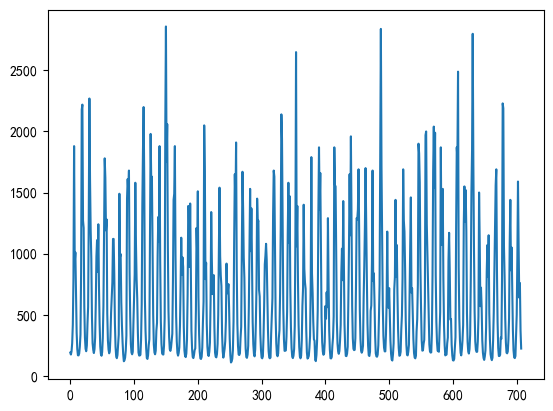

In [4]:
df['两河口月平均流量'].plot()#默认是kind="line"
# df['两河口月平均流量'].plot(kind="line")#默认是kind="line"
# df['锦屏月平均流量'].plot()

# df['官地月平均流量'].plot()
# df['二滩月平均流量'].plot()


# import matplotlib.pyplot as plt

# plt.plot(df1['时间'],df['两河口月平均流量'])
# plt.plot(df1['时间'],df['锦屏月平均流量'])
# plt.plot(df1['时间'],df['官地月平均流量'])
# plt.plot(df1['时间'],df['二滩月平均流量'])

In [5]:
# 此处进行全数据归一化
#注意sklearn归一化后，列名丢失了。

# MMScaler=MinMaxScaler()# 或者归一化到(-1,1)之间
# MMScaler1=MinMaxScaler((-1,1))
# StdScaler=StandardScaler()

# 整体归一化
# dfs=MMScaler.fit_transform(df)
# dfs1=StdScaler.fit_transform(df)

# X和y分开归一化
MMXScaler=MinMaxScaler()# 或者归一化到(-1,1)之间
MMy1Scaler=MinMaxScaler()# 或者归一化到(-1,1)之间
MMy2Scaler=MinMaxScaler()# 或者归一化到(-1,1)之间
MMy3Scaler=MinMaxScaler()# 或者归一化到(-1,1)之间
MMy4Scaler=MinMaxScaler()# 或者归一化到(-1,1)之间

# 分开归一化

df_X=df.iloc[:,:-4]# 执行此句后，type(df_X)输出pandas.core.frame.DataFrame
df_y1=df.iloc[:,-4]# 执行此句后，type(df_y1)输出pandas.core.series.Series
df_y2=df.iloc[:,-3]
#df_y1=df.iloc[:,-1:-3] # 执行此句后，type(df_X)输出pandas.core.frame.DataFrame,可以看到只要从原pandas的df中提取大于一列，那么就
#是frame.DataFrame；如果只提取一列，那么就默认是pandas.core.series.Series。

df_y3=df.iloc[:,-2]
df_y4=df.iloc[:,-1]

# df_y1.shape#(708,)

# type(df_y1) #输出pandas.core.series.Series
# type(df_X) #输出pandas.core.frame.DataFrame

#由于同df_y1=df.iloc[:,-1]得到的df_y1,df_y2,df_y3,df_y4都是单独一列一列提出来的，所以此处要把其转换回去，转换成pandas的DataFrame。
# 否则没法使用逆向函数MMXScaler.fit_transform()。
df_y1,df_y2,df_y3,df_y4=pd.DataFrame(df_y1),pd.DataFrame(df_y2),pd.DataFrame(df_y3),pd.DataFrame(df_y4)

dfM_X=MMXScaler.fit_transform(df_X)
dfM_y1=MMy1Scaler.fit_transform(df_y1)
dfM_y2=MMy2Scaler.fit_transform(df_y2)
dfM_y3=MMy3Scaler.fit_transform(df_y3)
dfM_y4=MMy4Scaler.fit_transform(df_y4)

print(dfM_X.shape,dfM_y1.shape,dfM_y2.shape,dfM_y3.shape,dfM_y4.shape)
print(type(dfM_X),type(dfM_y1),type(dfM_y2),type(dfM_y3),type(dfM_y4))

(708, 80) (708, 1) (708, 1) (708, 1) (708, 1)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [6]:
# dfM_X.values是制取X的值，不取其特征名。e.g. clf = xgb_model.fit(df.values, target)

# dfs=MMScaler.fit_transform(df.iloc[:,:-4])#把除了目标列外的所有变量列归一化
# dfs1=StdScaler.fit_transform(df.iloc[:,:-4])#把除了目标列外的所有变量列标准化

#把列名复制回来前需要先把，归一化/标准化后的数据转化成Pandas的DataFrame数据
# dfs=pd.DataFrame(dfs)
# dfs1=pd.DataFrame(dfs1)

dfM_X,dfM_y1,dfM_y2,dfM_y3,dfM_y4=pd.DataFrame(dfM_X),pd.DataFrame(dfM_y1),pd.DataFrame(dfM_y2),pd.DataFrame(dfM_y3),pd.DataFrame(dfM_y4)

#把列名复制回来
# dfs.columns=df.columns
# dfs1.columns=df.columns
dfM_X.columns=df_X.columns
dfM_y1.columns=df_y1.columns
dfM_y2.columns=df_y2.columns
dfM_y3.columns=df_y3.columns
dfM_y4.columns=df_y4.columns

dfM_X.head()

# dfs.columns=df.iloc[:,:-4].columns
# dfs1.columns=df.iloc[:,:-4].columns
# len(dfs.columns),len(df.columns)

# 另一种列名回来方法
# iris = load_iris()
# df = pd.DataFrame(iris.data,columns=iris.feature_names) #转化成DataFrame格式
# target = iris.target


# # 把归一化及标准化后的数据存下来,此处是为了查看下标准化后的数据的正负范围。
# with pd.ExcelWriter(r'..\data\标归化后的数据.xlsx') as writer:
#     dfs.to_excel(writer,sheet_name='归一化后的数据')
#     dfs1.to_excel(writer,sheet_name='标准化后的数据')

# # ExcelWriter也可用于追加到现有的Excel文件中:
# """
# # ExcelWriter也可用于追加到现有的Excel文件中:

# with pd.ExcelWriter(r'..\data\滞后一个月数据.xlsx',mode='a') as writer:
#     dfs.to_excel(writer,sheet_name='归一化后的数据')
#     dfs1.to_excel(writer,sheet_name='标准化后的数据')

# """

# dfs.head()

北半球副高面积指数  北非副高面积指数   北非-大西洋-北美副高面积指数  西太平洋副高面积指数  东太平洋副高面积指数  北美副高面积指数   \
0   0.000000        0.0              0.0    0.000000         0.0        0.0   
1   0.000000        0.0              0.0    0.000000         0.0        0.0   
2   0.031228        0.0              0.0    0.157934         0.0        0.0   
3   0.000000        0.0              0.0    0.000000         0.0        0.0   
4   0.009972        0.0              0.0    0.050435         0.0        0.0   

   北大西洋副高面积指数  北美大西洋副高面积指数  北太平洋副高面积指数  北半球副高强度指数   ...  极地-欧亚遥相关型指数  \
0         0.0          0.0    0.000000    0.000000  ...     0.597701   
1         0.0          0.0    0.000000    0.000000  ...     0.500000   
2         0.0          0.0    0.077863    0.012356  ...     0.739847   
3         0.0          0.0    0.000000    0.000000  ...     0.851341   
4         0.0          0.0    0.024865    0.003315  ...     0.462835   

   斯堪的纳维亚遥相关型指数  30hPa纬向风指数  50hPa纬向风指数  赤道中东太平洋200hPa纬向风指数  850hPa西太平洋信风指数  \
0      0.590538    0.552908    0.457455            0.527960        0.053075   
1      0.398586    0.458245    0.362921            0.538569        0.393664   
2      0.370310    0.444916    0.319195            0.509660        0.546329   
3      0.284394    0.532670    0.435855            0.340715        0.378681   
4      0.293094    0.653827    0.608220            0.197451        0.551547   

   850hPa中太平洋信风指数  850hPa东太平洋信风指数  北大西洋-欧洲环流W型指数  北大西洋-欧洲环流型C型指数  
0        0.745648        0.689052       0.888889        0.115385  
1        0.765436        0.685869       0.703704        0.307692  
2        0.648977        0.427053       0.407407        0.500000  
3        0.702160        0.467664       0.185185        0.846154  
4        0.646709        0.386951       0.962963        0.000000  

[5 rows x 80 columns]

In [7]:
dfM_y1.head()

两河口月平均流量
0  0.029433
1  0.023619
2  0.033067
3  0.057413
4  0.112282

In [8]:
MMy1Scaler.inverse_transform(dfM_y1)

array([[ 189.],
       [ 173.],
       [ 199.],
       [ 266.],
       [ 417.],
       [ 801.],
       [1880.],
       [ 926.],
       [1010.],
       [ 687.],
       [ 352.],
       [ 218.],
       [ 167.],
       [ 166.],
       [ 182.],
       [ 238.],
       [ 336.],
       [ 846.],
       [2180.],
       [2220.],
       [1270.],
       [1210.],
       [ 565.],
       [ 312.],
       [ 220.],
       [ 200.],
       [ 247.],
       [ 425.],
       [ 562.],
       [1300.],
       [2270.],
       [1600.],
       [1190.],
       [ 959.],
       [ 483.],
       [ 266.],
       [ 212.],
       [ 185.],
       [ 217.],
       [ 310.],
       [ 590.],
       [ 974.],
       [1110.],
       [ 849.],
       [1240.],
       [ 733.],
       [ 429.],
       [ 240.],
       [ 177.],
       [ 163.],
       [ 193.],
       [ 307.],
       [ 572.],
       [1180.],
       [1780.],
       [1620.],
       [1190.],
       [1280.],
       [ 510.],
       [ 290.],
       [ 214.],
       [ 183.],
       [

In [9]:
'''
lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': 30,
    'num_round': 360,
    'max_depth':8,
    'learning_rate': 0.01,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.8,
    'bagging_freq': 12
}
lgb_train = lgb.Dataset(train.drop(target, 1), train[target])
model = lgb.train(lgb_params, lgb_train)
# 部分参考链接：https://blog.csdn.net/m0_37477175/article/details/80567010
'''


rfr=RandomForestRegressor(random_state=34)

rfr.fit(dfM_X,dfM_y1)
rfr.score(dfM_X,dfM_y1)#打印出拟合优度

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9667861138198782

In [10]:
feature_importance=rfr.feature_importances_

features = pd.DataFrame(sorted(zip(feature_importance,df_X.columns),reverse=True))

features

0              1
0   0.423122    北半球极涡中心强度指数
1   0.253174      亚洲区极涡强度指数
2   0.047041      北半球极涡强度指数
3   0.029435        东亚槽强度指数
4   0.023833    印度副高脊线位置指数 
..       ...            ...
75  0.000788      太平洋副高强度指数
76  0.000718     北大西洋副高强度指数
77  0.000708     北大西洋副高面积指数
78  0.000653    北美大西洋副高面积指数
79  0.000507  北美-北大西洋副高强度指数

[80 rows x 2 columns]

In [11]:
# with pd.ExcelWriter(r'..\data\FeatureImportance.xlsx',mode='a') as writer:
#     features.to_excel(writer,sheet_name='RFImportance_lhk13')
    
# from matplotlib import pyplot
# # plot
# pyplot.bar(range(len(feature_importance)), feature_importance)
# pyplot.show()

## 计算滞后相关性、画图(在另一个ipynb)

## 模型训练和预测
### SVR预测
归一化的方法分别为：MMXScaler, MMy1Scaler, MMy2Scaler, MMy3Scaler, MMy4Scaler  
归一化后的X和y名称：dfM_X, dfM_y1, dfM_y2, dfM_y3, dfM_y4

In [12]:
# 归一化后的X和y名称：dfM_X.shape,dfM_y1.shape,dfM_y2.shape,dfM_y3.shape,dfM_y4.shape

from sklearn.svm import LinearSVR,SVR,NuSVR
from sklearn.model_selection import KFold,StratifiedKFold,GridSearchCV,train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# 或另一个例子：https://blog.csdn.net/qq_45856698/article/details/129895492

X1_train,X1_test,y1_train,y1_test=train_test_split(dfM_X,dfM_y1,test_size=0.1,random_state=34,shuffle=False)

X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape

((637, 80), (71, 80), (637, 1), (71, 1))

In [13]:
y1_train.head() # X_train.head() 

两河口月平均流量
0  0.029433
1  0.023619
2  0.033067
3  0.057413
4  0.112282

In [14]:

# 对划分后的训练集和测试集中的特征变量进行数据标准化
# 由于特征变量的取值范围不尽相同，使用sklearn的StandardScaler类，将训练集和测试集中的所有特征变量进行标准化（即，均值为0，标准差为1）。
# "values.reshape(-1,1)"是将数据中的所有元素按照一列的形式重新排列，其中，-1 表示自动计算行数，1 表示只有一列。
# scaler = StandardScaler()

# scaler.fit(data_train)
# data_train_s=scaler.fit_transform(data_train)#对训练集中的特征变量进行标准化
# data_test_s=scaler.fit_transform(data_test)#对测试集的特征变量进行标准化

# 进行支持向量回归
# 使用sklearn的SVR类分别进行径向核（rbf）、二次多项式核（poly，2）、三次多项式核（poly，3）、S型核进行支持向量回归。
# 使用 fit（）方法对SVR进行估计，在这里使用默认参数”epsilon=0.1“，即SVR的调节参数为0.1。使用score（）方法，计算测试集的拟合优度。

#使用多项式内核进行拟合、预测
svr_poly=SVR(kernel='poly',degree=6)#默认使用径向基函数作为内核kernel='rbf'。
svr_poly.fit(X1_train,y1_train)#模型拟合
print(svr_poly.score(X1_train,y1_train))#计算拟合优度，输出：0.9968546332080951。

svr_poly_y1_pred = svr_poly.predict(X1_test)
# model.score(X_test,y1_test) #如果在拟合训练集后，输出训练集的拟合优度可能很高；但是测试集的不会太高，因为并没有拟合测试集。

# 对多项式核函数模型评估
print("对多项式核函数的默认评估值(拟合优度)为：", svr_poly.score(X1_test, y1_test))
print("对多项式核函数的R_Squared值为：", r2_score(y1_test, svr_poly_y1_pred))
# print("对多项式核函数的均方误差为:", mean_squared_error(y1_test,poly_svr_y1_pred))
# print("对多项式核函数的平均绝对误差为:", mean_absolute_error(y1_test,poly_svr_y1_pred))

print("对多项式核函数的均方误差为逆向:", mean_squared_error(MMy1Scaler.inverse_transform(y1_test),
                                           MMy1Scaler.inverse_transform(svr_poly_y1_pred.reshape(-1,1))))
print("对多项式核函数的平均绝对误差为逆向:", mean_absolute_error(MMy1Scaler.inverse_transform(y1_test),
                                              MMy1Scaler.inverse_transform(svr_poly_y1_pred.reshape(-1,1))))


#使用径向基进行拟合、预测
svr_rbf=SVR(kernel='rbf')#默认使用径向基函数作为内核kernel='rbf'。
svr_rbf.fit(X1_train,y1_train)#模型拟合
print(svr_rbf.score(X1_train,y1_train))#计算拟合优度，输出：0.9968546332080951。
#预测
svr_rbf_y1_pred = svr_rbf.predict(X1_test)

# 对RBF核函数模型评估
print("对RBF核函数的默认评估值(拟合优度)为：", svr_rbf.score(X1_test, y1_test))
print("对RBF核函数的R_Squared值为：", r2_score(y1_test, svr_rbf_y1_pred))
# print("对多项式核函数的均方误差为:", mean_squared_error(y1_test,poly_svr_y1_pred))
# print("对多项式核函数的平均绝对误差为:", mean_absolute_error(y1_test,poly_svr_y1_pred))

print("对RBF核函数的均方误差为逆向:", mean_squared_error(MMy1Scaler.inverse_transform(y1_test),
                                           MMy1Scaler.inverse_transform(svr_rbf_y1_pred.reshape(-1,1))))
print("对RBF核函数的平均绝对误差为逆向:", mean_absolute_error(MMy1Scaler.inverse_transform(y1_test),
                                              MMy1Scaler.inverse_transform(svr_rbf_y1_pred.reshape(-1,1))))


#使用Linear线性函数进行拟合、预测
svr_lin=SVR(kernel='linear')#默认使用径向基函数作为内核kernel='rbf'。
svr_lin.fit(X1_train,y1_train)#模型拟合
print(svr_lin.score(X1_train,y1_train))#计算拟合优度，输出：0.9968546332080951。
#预测
svr_lin_y1_pred = svr_lin.predict(X1_test)

# 对Linear核函数模型评估
print("对Linear核函数的默认评估值(拟合优度)为：", svr_lin.score(X1_test, y1_test))
print("对Linear核函数的R_Squared值为：", r2_score(y1_test, svr_lin_y1_pred))
# print("对多项式核函数的均方误差为:", mean_squared_error(y1_test,poly_svr_y1_pred))
# print("对多项式核函数的平均绝对误差为:", mean_absolute_error(y1_test,poly_svr_y1_pred))

print("对Linear核函数的均方误差为逆向:", mean_squared_error(MMy1Scaler.inverse_transform(y1_test),
                                           MMy1Scaler.inverse_transform(svr_lin_y1_pred.reshape(-1,1))))
print("对Linear核函数的平均绝对误差为逆向:", mean_absolute_error(MMy1Scaler.inverse_transform(y1_test),
                                              MMy1Scaler.inverse_transform(svr_lin_y1_pred.reshape(-1,1))))



#使用sigmoid函数进行拟合、预测
svr_sigm=SVR(kernel='sigmoid')#默认使用径向基函数作为内核kernel='rbf'。
svr_sigm.fit(X1_train,y1_train)#模型拟合
print(svr_sigm.score(X1_train,y1_train))#计算拟合优度，输出：0.9968546332080951。
#预测
svr_sigm_y1_pred = svr_sigm.predict(X1_test)

# 对Linear核函数模型评估
print("对sigmoid核函数的默认评估值(拟合优度)为：", svr_sigm.score(X1_test, y1_test))
print("对sigmoid核函数的R_Squared值为：", r2_score(y1_test, svr_sigm_y1_pred))
# print("对多项式核函数的均方误差为:", mean_squared_error(y1_test,poly_svr_y1_pred))
# print("对多项式核函数的平均绝对误差为:", mean_absolute_error(y1_test,poly_svr_y1_pred))

print("对sigmoid核函数的均方误差为逆向:", mean_squared_error(MMy1Scaler.inverse_transform(y1_test),
                                           MMy1Scaler.inverse_transform(svr_sigm_y1_pred.reshape(-1,1))))
print("对sigmoid核函数的平均绝对误差为逆向:", mean_absolute_error(MMy1Scaler.inverse_transform(y1_test),
                                              MMy1Scaler.inverse_transform(svr_sigm_y1_pred.reshape(-1,1))))

# # 通过对比，我们发现采用S型核效果最好，测试集的拟合优度达到0.7219，故本文采取S型核。由于截至目前，超参数都是选用默认的设置，


C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

0.8840289792536147
对多项式核函数的默认评估值(拟合优度)为： 0.18898206168360376
对多项式核函数的R_Squared值为： 0.18898206168360376
对多项式核函数的均方误差为逆向: 202483.86682916924
对多项式核函数的平均绝对误差为逆向: 323.117421094289
0.8192794929131099
对RBF核函数的默认评估值(拟合优度)为： 0.6339165669639061
对RBF核函数的R_Squared值为： 0.6339165669639061
对RBF核函数的均方误差为逆向: 91398.70476493373
对RBF核函数的平均绝对误差为逆向: 220.5561560297546
0.7621108680086048
对Linear核函数的默认评估值(拟合优度)为： 0.5955288911898711
对Linear核函数的R_Squared值为： 0.5955288911898711
对Linear核函数的均方误差为逆向: 100982.81463733292
对Linear核函数的平均绝对误差为逆向: 245.57319547103467
-9.758523147997
对sigmoid核函数的默认评估值(拟合优度)为： -7.902263637884568
对sigmoid核函数的R_Squared值为： -7.902263637884568
对sigmoid核函数的均方误差为逆向: 2222595.4319500555
对sigmoid核函数的平均绝对误差为逆向: 1210.4616458099824


## 筛选后的数据
筛选后的各站点对应的自变量X数据

In [15]:
# dfM_y1.shape,dfM_y2.shape,dfM_y3.shape,dfM_y4.shape；# y1,y2,y3,y4分别对应两河口，锦屏，官地，二滩

rfx_lhk=pd.read_excel(r'..\data\标归化及筛选后后的数据85.xlsx',sheet_name='RF_LHK')
rfx_jp=pd.read_excel(r'..\data\标归化及筛选后后的数据85.xlsx',sheet_name='RF_JP')
rfx_gd=pd.read_excel(r'..\data\标归化及筛选后后的数据85.xlsx',sheet_name='RF_GD')
rfx_et=pd.read_excel(r'..\data\标归化及筛选后后的数据85.xlsx',sheet_name='RF_ET')



srax_lhk=pd.read_excel(r'..\data\标归化及筛选后后的数据85.xlsx',sheet_name='SRA_LHK')
srax_jp=pd.read_excel(r'..\data\标归化及筛选后后的数据85.xlsx',sheet_name='SRA_JP')
srax_gd=pd.read_excel(r'..\data\标归化及筛选后后的数据85.xlsx',sheet_name='SRA_GD')
srax_et=pd.read_excel(r'..\data\标归化及筛选后后的数据85.xlsx',sheet_name='SRA_ET')

# rfx_lhk.head()
rfx_lhk.shape,rfx_jp.shape,rfx_gd.shape,rfx_et.shape,srax_lhk.shape,srax_jp.shape,srax_gd.shape,srax_et.shape

((708, 16),
 (708, 11),
 (708, 10),
 (708, 11),
 (708, 18),
 (708, 15),
 (708, 15),
 (708, 15))

## 此处把所有自变量数据X进行归一化

In [16]:
# 此处进行全数据归一化
#注意sklearn归一化后，列名丢失了。

# MMScaler=MinMaxScaler()# 或者归一化到(-1,1)之间
# MMScaler1=MinMaxScaler((-1,1))
# StdScaler=StandardScaler()

# 整体归一化
# dfs=MMScaler.fit_transform(df)
# dfs1=StdScaler.fit_transform(df)

# X和y分开归一化C
MMrX1Scaler=MinMaxScaler()# 或者归一化到(-1,1)之间
MMrX2Scaler=MinMaxScaler()
MMrX3Scaler=MinMaxScaler()
MMrX4Scaler=MinMaxScaler()

MMsrX1Scaler=MinMaxScaler()
MMsrX2Scaler=MinMaxScaler()
MMsrX3Scaler=MinMaxScaler()
MMsrX4Scaler=MinMaxScaler()


# 分开归一化

# df_X=df.iloc[:,:-4]# 执行此句后，type(df_X)输出pandas.core.frame.DataFrame
# df_y1=df.iloc[:,-4]# 执行此句后，type(df_y1)输出pandas.core.series.Series
# df_y2=df.iloc[:,-3]
#df_y1=df.iloc[:,-1:-3] # 执行此句后，type(df_X)输出pandas.core.frame.DataFrame,可以看到只要从原pandas的df中提取大于一列，那么就
#是frame.DataFrame；如果只提取一列，那么就默认是pandas.core.series.Series。

# df_y3=df.iloc[:,-2]
# df_y4=df.iloc[:,-1]

# df_y1.shape#(708,)

# type(df_y1) #输出pandas.core.series.Series
# type(df_X) #输出pandas.core.frame.DataFrame

#由于同df_y1=df.iloc[:,-1]得到的df_y1,df_y2,df_y3,df_y4都是单独一列一列提出来的，所以此处要把其转换回去，转换成pandas的DataFrame。
# 否则没法使用逆向函数MMXScaler.fit_transform()。
# df_y1,df_y2,df_y3,df_y4=pd.DataFrame(df_y1),pd.DataFrame(df_y2),pd.DataFrame(df_y3),pd.DataFrame(df_y4)

MMrX1=MMrX1Scaler.fit_transform(rfx_lhk)
MMrX2=MMrX2Scaler.fit_transform(rfx_jp)
MMrX3=MMrX3Scaler.fit_transform(rfx_gd)
MMrX4=MMrX4Scaler.fit_transform(rfx_et)

MMsrX1=MMsrX1Scaler.fit_transform(srax_lhk)
MMsrX2=MMsrX2Scaler.fit_transform(srax_jp)
MMsrX3=MMsrX3Scaler.fit_transform(srax_gd)
MMsrX4=MMsrX4Scaler.fit_transform(srax_et)


# dfM_y1=MMy1Scaler.fit_transform(df_y1)
# dfM_y2=MMy2Scaler.fit_transform(df_y2)
# dfM_y3=MMy3Scaler.fit_transform(df_y3)
# dfM_y4=MMy4Scaler.fit_transform(df_y4)

print(MMrX1.shape,MMrX2.shape,MMrX3.shape,MMrX4.shape,MMsrX1.shape,MMsrX2.shape,MMsrX3.shape,MMsrX4.shape)
print(type(MMrX1),type(dfM_y1),type(dfM_y2),type(dfM_y3),type(dfM_y4))

(708, 16) (708, 11) (708, 10) (708, 11) (708, 18) (708, 15) (708, 15) (708, 15)
<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [17]:
type(MMrX1),type(dfM_y1),MMrX1.shape

(numpy.ndarray, pandas.core.frame.DataFrame, (708, 16))

In [18]:
df_y1.head()

两河口月平均流量
0       189
1       173
2       199
3       266
4       417

In [19]:
# MMrX1,MMsrX1,dfM_y1,顺序是两河口，锦屏，官地，二滩。MMrX1是指随机森林RF，MMsrX1是指逐步回归sr


# dfs=MMScaler.fit_transform(df.iloc[:,:-4])#把除了目标列外的所有变量列归一化
# dfs1=StdScaler.fit_transform(df.iloc[:,:-4])#把除了目标列外的所有变量列标准化

#把列名复制回来前需要先把，归一化/标准化后的数据转化成Pandas的DataFrame数据
# dfs=pd.DataFrame(dfs)
# dfs1=pd.DataFrame(dfs1)

MMrX1,MMrX2,MMrX3,MMrX4 = pd.DataFrame(MMrX1),pd.DataFrame(MMrX2),pd.DataFrame(MMrX3),pd.DataFrame(MMrX4)

MMsrX1,MMsrX2,MMsrX3,MMsrX4 = pd.DataFrame(MMsrX1),pd.DataFrame(MMsrX2),pd.DataFrame(MMsrX3),pd.DataFrame(MMsrX4)

# 如果上面没有对各个y进行归一化则不需要下面一行代码
# dfM_y1,dfM_y2,dfM_y3,dfM_y4 = pd.DataFrame(dfM_y1),pd.DataFrame(dfM_y2),pd.DataFrame(dfM_y3),pd.DataFrame(dfM_y4)

#把列名复制回来
# dfs.columns=df.columns
# dfs1.columns=df.columns

MMrX1.columns,MMrX2.columns,MMrX3.columns,MMrX4.columns = rfx_lhk.columns,rfx_jp.columns,rfx_gd.columns,rfx_et.columns

MMsrX1.columns,MMsrX2.columns,MMsrX3.columns,MMsrX4.columns = srax_lhk.columns,srax_jp.columns,srax_gd.columns,srax_et.columns

# # 如果上面没有对各个y进行归一化则不需要下面一块代码
# dfM_y1.columns=df_y1.columns
# dfM_y2.columns=df_y2.columns
# dfM_y3.columns=df_y3.columns
# dfM_y4.columns=df_y4.columns

MMrX1.head(),MMsrX1.head()

# dfs.columns=df.iloc[:,:-4].columns
# dfs1.columns=df.iloc[:,:-4].columns
# len(dfs.columns),len(df.columns)

# 另一种列名回来方法
# iris = load_iris()
# df = pd.DataFrame(iris.data,columns=iris.feature_names) #转化成DataFrame格式
# target = iris.target


# # 把归一化及标准化后的数据存下来,此处是为了查看下标准化后的数据的正负范围。
# with pd.ExcelWriter(r'..\data\标归化后的数据.xlsx') as writer:
#     dfs.to_excel(writer,sheet_name='归一化后的数据')
#     dfs1.to_excel(writer,sheet_name='标准化后的数据')

# # ExcelWriter也可用于追加到现有的Excel文件中:
# """
# # ExcelWriter也可用于追加到现有的Excel文件中:

# with pd.ExcelWriter(r'..\data\滞后一个月数据.xlsx',mode='a') as writer:
#     dfs.to_excel(writer,sheet_name='归一化后的数据')
#     dfs1.to_excel(writer,sheet_name='标准化后的数据')

# """

# dfs.head()

(   北半球极涡中心强度指数  亚洲区极涡强度指数  北半球极涡强度指数   东亚槽强度指数  印度副高脊线位置指数  北美区极涡强度指数  \
 0     0.356286   0.845284   0.745537  0.123353    0.339911   0.382096   
 1     0.225774   0.627801   0.672803  0.138701    0.332250   0.593298   
 2     0.174001   0.728564   0.829997  0.085332    0.387634   0.681356   
 3     0.085716   0.739471   0.688358  0.332829    0.487433   0.519924   
 4     0.492442   0.279346   0.232285  0.361230    0.420231   0.091076   
 
    北大西洋涛动指数  北太平洋遥相关型指数  太平洋-北美遥相关型指数  亚洲纬向环流指数  东大西洋-西俄罗斯遥相关型指数  太平洋区极涡强度指数  \
 0  0.444092    0.000000      0.543772  0.545979         0.352856    0.892267   
 1  0.455591    0.809795      0.532766  0.356916         0.471442    0.641286   
 2  0.568993    0.738231      0.630315  0.332640         0.436108    0.866762   
 3  0.654243    0.671406      0.398699  0.594219         0.711520    0.665748   
 4  0.318398    0.826698      0.668334  0.183864         0.218296    0.376613   
 
    亚洲经向环流指数    南极涛动指数  北大西洋-欧洲区极涡强度指数  赤道中东太平洋200hPa纬向风指数  
 0  0

In [20]:
MMsrX1

北半球极涡中心强度指数  东大西洋-西俄罗斯遥相关型指数  北美副高面积指数    印缅槽强度指数  西太平洋遥相关型指数  \
0       0.356286         0.352856   0.000000  0.604532    0.550514   
1       0.225774         0.471442   0.000000  0.435512    0.353596   
2       0.174001         0.436108   0.000000  0.577067    0.710188   
3       0.085716         0.711520   0.000000  0.679610    0.531678   
4       0.492442         0.218296   0.000000  0.660321    0.346318   
..           ...              ...        ...       ...         ...   
703     0.990304         0.388674   0.743414  0.434894    0.474743   
704     0.945260         0.570668   0.731957  0.506842    0.477740   
705     0.590572         0.330106   0.581083  0.577439    0.612586   
706     0.454134         0.491772   0.023522  0.734216    0.684932   
707     0.367547         0.753630   0.000000  0.710433    0.639983   

     东大西洋遥相关型指数  北半球极涡面积指数  北半球极涡强度指数  西太平洋副高面积指数  亚洲区极涡面积指数  亚洲纬向环流指数  \
0      0.390760   0.805224   0.745537    0.000000   0.890821  0.545979   
1      0.271415   0.719708   0.672803    0.000000   0.885024  0.356916   
2      0.284408   0.807598   0.829997    0.157934   0.900676  0.332640   
3      0.734841   0.683526   0.688358    0.000000   0.905700  0.594219   
4      0.576997   0.453699   0.232285    0.050435   0.524928  0.183864   
..          ...        ...        ...         ...        ...       ...   
703    0.612608   0.149550   0.037345    0.171134   0.250242  0.293029   
704    0.721367   0.292014   0.103102    0.400715   0.545121  0.443988   
705    0.791627   0.461388   0.357446    0.492420   0.754203  0.444664   
706    0.529355   0.670900   0.592860    0.381232   0.823188  0.737173   
707    0.574591   0.688765   0.722156    0.230330   0.941836  0.709622   

      东亚槽强度指数  西藏高原-2 指数  北大西洋副高强度指数  北非副高强度指数   太平洋-北美遥相关型指数    北极涛动指数  \
0    0.123353   0.330983    0.000000   0.000000      0.543772  0.278064   
1    0.138701   0.182414    0.000000   0.000000      0.532766  0.281640   
2    0.085332   0.379102    0.000000   0.000000      0.630315  0.495609   
3    0.332829   0.423151    0.000000   0.000000      0.398699  0.613520   
4    0.361230   0.506125    0.000000   0.000000      0.668334  0.245755   
..        ...        ...         ...        ...           ...       ...   
703  0.940786   0.892799    0.686327   0.608800      0.418709  0.456777   
704  0.945744   0.947565    0.612884   0.666026      0.913957  0.367313   
705  0.754252   0.851172    0.378293   0.348561      0.413707  0.510926   
706  0.590942   0.717763    0.000000   0.028766      0.598799  0.535867   
707  0.394611   0.559538    0.000000   0.000000      0.360680  0.651568   

     北半球副高强度指数   
0      0.000000  
1      0.000000  
2      0.012356  
3      0.000000  
4      0.003315  
..          ...  
703    0.522387  
704    0.591943  
705    0.382587  
706    0.062992  
707    0.025867  

[708 rows x 18 columns]

# 以下为两河口的SVR和MLP预测结果等
## 1.SRA-SVR预测

fitting model right now


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7370368045857186 {'C': 1000, 'epsilon': 100, 'gamma': 'scale', 'kernel': 'rbf'}
训练集mse: 59806.64872876991,训练集r2_score: 0.8073964330211681
训练集mae: 146.5154972388646,训练集mape: 0.23522147461114679
训练集msle: 0.0756469945989945
测试集mse: 78808.01331559116,测试集r2_score: 0.7164080283657713
测试集mae: 185.7390989216802,测试集mape: 0.2723217208320616
测试集msle: 0.09843353098539634


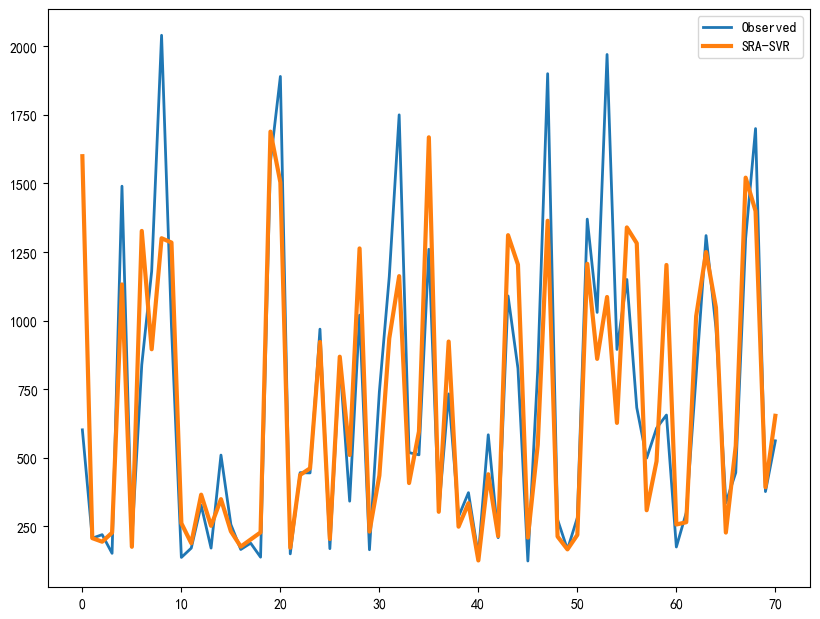

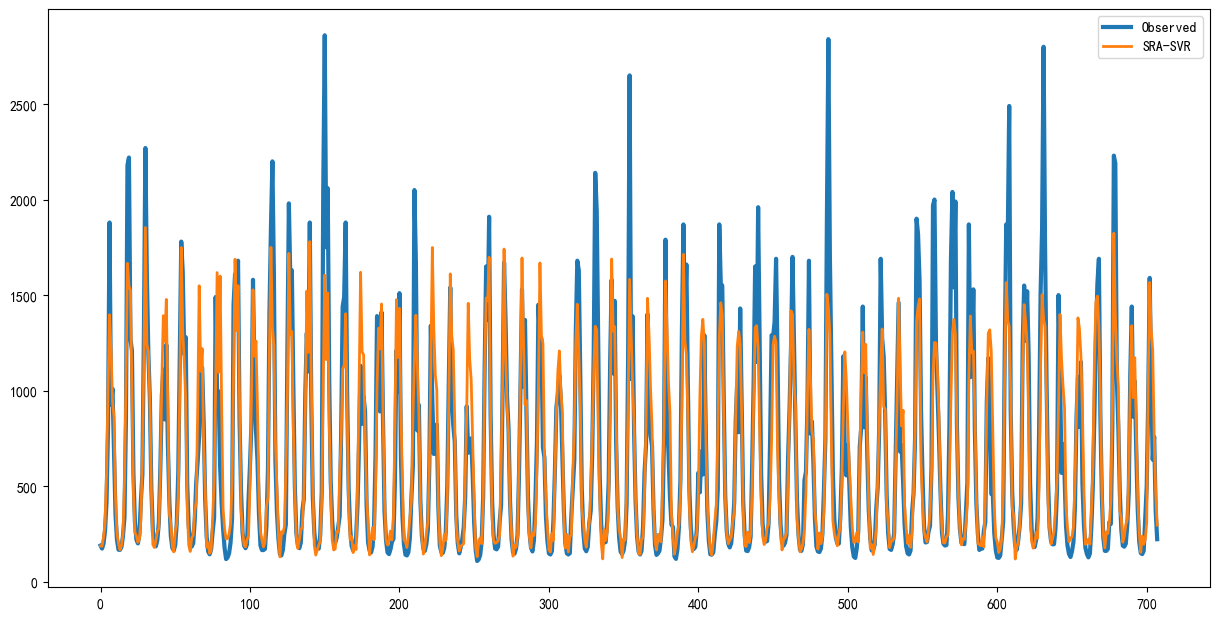

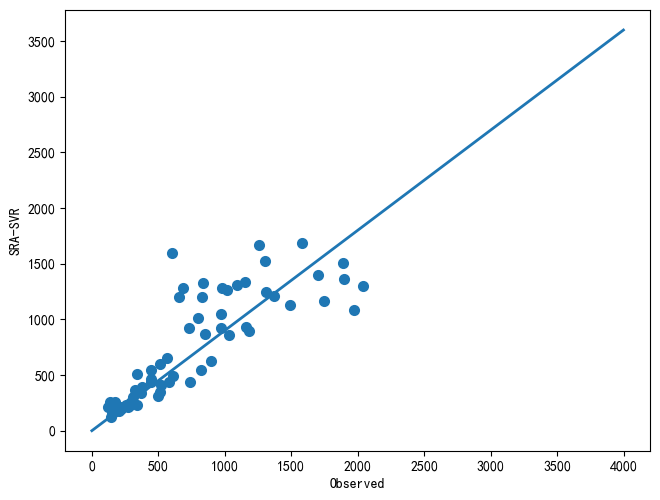

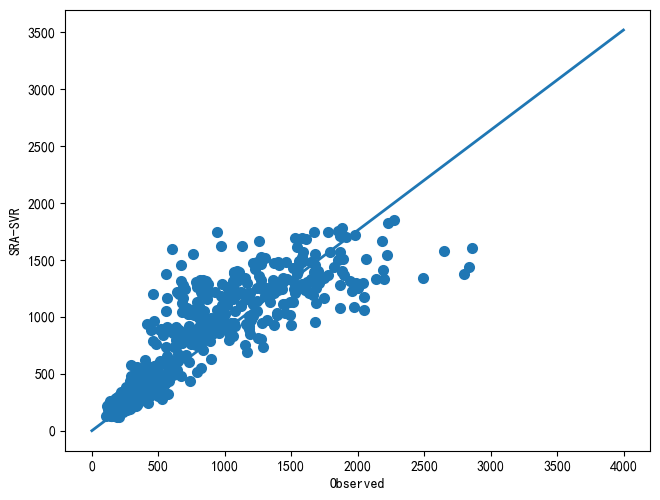

In [21]:
# dfM_y1.shape,dfM_y2.shape,dfM_y3.shape,dfM_y4.shape；# y1,y2,y3,y4分别对应两河口，锦屏，官地，二滩
# # MMsrX1,MMsrX1,dfM_y1,顺序是两河口，锦屏，官地，二滩。

## SVR预测
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

# 划分训练集和测试集
X1_train,X1_test,y1_train,y1_test=train_test_split(MMsrX1,df_y1,test_size=0.1,random_state=34,shuffle=True)
# X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape

# scorer = make_scorer(rmsle, greater_is_better=False, size=10)
# scorer = make_scorer(mean_squared_error, greater_is_better=False)
# grid = GridSearchCV(est, param_grid, scoring=scorer)

# grid_param1=[
#     {'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100,160], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
#     {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 160],'epsilon':[0.01,0.1,1,10]},#linear内核不接受“gamma”作为参数；
#     {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 160],'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
#     {'kernel': ['sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 160], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
# ]
grid_param1=[
#     {'C':[0.1,0.5,1,5,10],'kernel': ['linear'], 'epsilon':[0.05,0.1,1,10]},#linear内核不接受“gamma”作为参数；
# #     {'C':[0.01,0.005,0.1,1,10,50],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
#     {'C':[0.1,0.5,1,5,10],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.05,0.1,1,10],'gamma':['auto','scale']}#默认gamma值为scale。
#     {'C':[1170,1176,1178,1179,1180,1182,1185,1190,1200,1210],'kernel':['poly','rbf','sigmoid'],'epsilon':[90,101,102,103,104,105,106,107,108,109,110,112,115,120,125,150],'gamma':['auto','scale']},#默认gamma值为scale。
#     {'C':[1179,1180,1190,1200],'kernel':['poly','rbf','sigmoid'],'epsilon':[106,107,108,109,110],'gamma':['auto','scale']},#默认gamma值为scale。
    {'C':[1000],'kernel':['poly','rbf','sigmoid'],'epsilon':[100],'gamma':['auto','scale']},#默认gamma值为scale。
#     {'C':[15,20,25],'kernel':['linear'], 'epsilon':[10,13,15]}#linear内核不接受“gamma”作为参数；
    ]

#上面一句代码可以用下一句代替，但是需注意，linear不接接受“gamma"作为内核，所以下面的kernel中不要用linear，用的话也没问题，但是恐怕中间出错
# param_grid={'C':[0.01,0.005,0.1,1,10,50],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}#定义参数网格

kfold=KFold(n_splits=12,shuffle=True,random_state=34)#定义10折随机分组
# grid_svr1=GridSearchCV(SVR(), grid_param1,cv=kfold,return_train_score=True,scoring = "neg_mean_squared_error",n_jobs=-1)
# grid_svr1=GridSearchCV(SVR(), grid_param1,cv=kfold,return_train_score=True,scoring = scorer)
grid_svr1=GridSearchCV(SVR(), grid_param1,cv=kfold,return_train_score=True,scoring = "r2",n_jobs=5)

print ("fitting model right now")
grid_svr1.fit(X1_train,y1_train)
print(grid_svr1.best_score_, grid_svr1.best_params_)#0.15时 0.774166100134361 {'C': 160, 'epsilon': 5, 'gamma': 1, 'kernel': 'poly'}
svr_pred1_train=grid_svr1.predict(X1_train)
svr_pred1_test=grid_svr1.predict(X1_test)
print(f'训练集mse: {mean_squared_error(y1_train,svr_pred1_train)},训练集r2_score: {r2_score(y1_train,svr_pred1_train)}')
print(f'训练集mae: {mean_absolute_error(y1_train,svr_pred1_train)},训练集mape: {mean_absolute_percentage_error(y1_train,svr_pred1_train)}')
print(f'训练集msle: {msle(y1_train,svr_pred1_train)}')
      
print(f'测试集mse: {mean_squared_error(y1_test,svr_pred1_test)},测试集r2_score: {r2_score(y1_test,svr_pred1_test)}')
print(f'测试集mae: {mean_absolute_error(y1_test,svr_pred1_test)},测试集mape: {mean_absolute_percentage_error(y1_test,svr_pred1_test)}')
print(f'测试集msle: {msle(y1_test,svr_pred1_test)}')
#合并训练集和测试集的预测，方便后续和真实的所有数据画图。
# svr_pred1=np.concatenate([svr_pred1_train,svr_pred1_test],axis=0)#注意，此处合并后和原数据的index并不对应，因为此处是shuffle打乱后的。

#正确的不应该是上面一句，而应该是用训练后的模型对所有的数据重新预测一次
svr_pred1=grid_svr1.predict(MMsrX1)

# print(svr_pred1.shape,svr_pred1)
# print(type(svr_pred1))#<class 'numpy.ndarray'>
# print(svr_pred1)
np.savetxt('sra_svr_pred1_y1.csv', svr_pred1, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
np.savetxt('sra_svr_pred1_y11.csv', svr_pred1, delimiter=',')#默认使用科学计数法。

#测试集画图
import matplotlib.pyplot as plt
xx10=range(0,len(y1_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx10,y1_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx10,svr_pred1_test,color="orange",label="SRA-SVR",linewidth=2)
plt.plot(xx10,y1_test,label="Observed",linewidth=2) 
plt.plot(xx10,svr_pred1_test,label="SRA-SVR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_SVR_y10test.tif', dpi=200,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx11=range(0,len(df_y1))
plt.figure(figsize=(12,6))
# plt.scatter(xx11,df_y1,color="red",label="Observed",linewidth=3) 
# plt.plot(xx11,svr_pred1,color="orange",label="SRA-MLP",linewidth=2)
plt.plot(xx11,df_y1,label="Observed",linewidth=3) 
plt.plot(xx11,svr_pred1,label="SRA-SVR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_SVR_y10full.tif', dpi=200,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a10=np.arange(4000)
a11=a10*0.9
# plt.scatter(y1_test,svr_pred1_test,label="Observed",linewidth=2) 
plt.scatter(y1_test,svr_pred1_test,linewidth=2) 
plt.plot(a10,a11,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_SVR_y1_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a12=np.arange(4000)
# a13=[(n *1.6) for n in np.arange(4000)]
a13=a12*0.88
# plt.scatter(y1_test,svr_pred1,label="Observed",linewidth=2) 
plt.scatter(df_y1,svr_pred1,linewidth=2) 
plt.plot(a12,a13,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_SVR_y1_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

fitting model right now


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.776837713756017 {'C': 1000, 'epsilon': 100, 'gamma': 'scale', 'kernel': 'rbf'}
训练集mse: 191667.173991066,训练集r2_score: 0.8247096477472055
训练集mae: 238.75428338680717,训练集mape: 0.1797081520636171
训练集msle: 0.05193959786711209
测试集mse: 321744.27476237534,测试集r2_score: 0.680245298866758
测试集mae: 341.353114547744,测试集mape: 0.23518984317229327
测试集msle: 0.07666048824329984


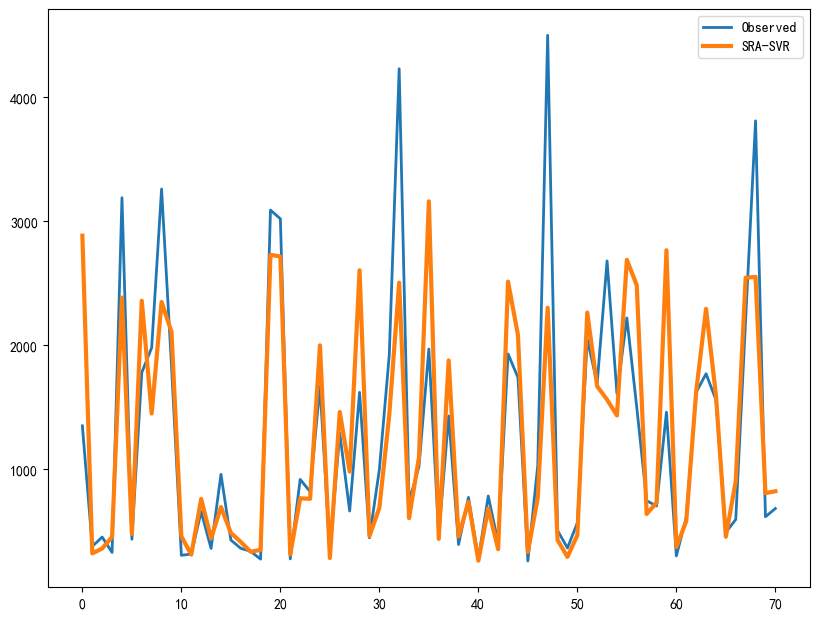

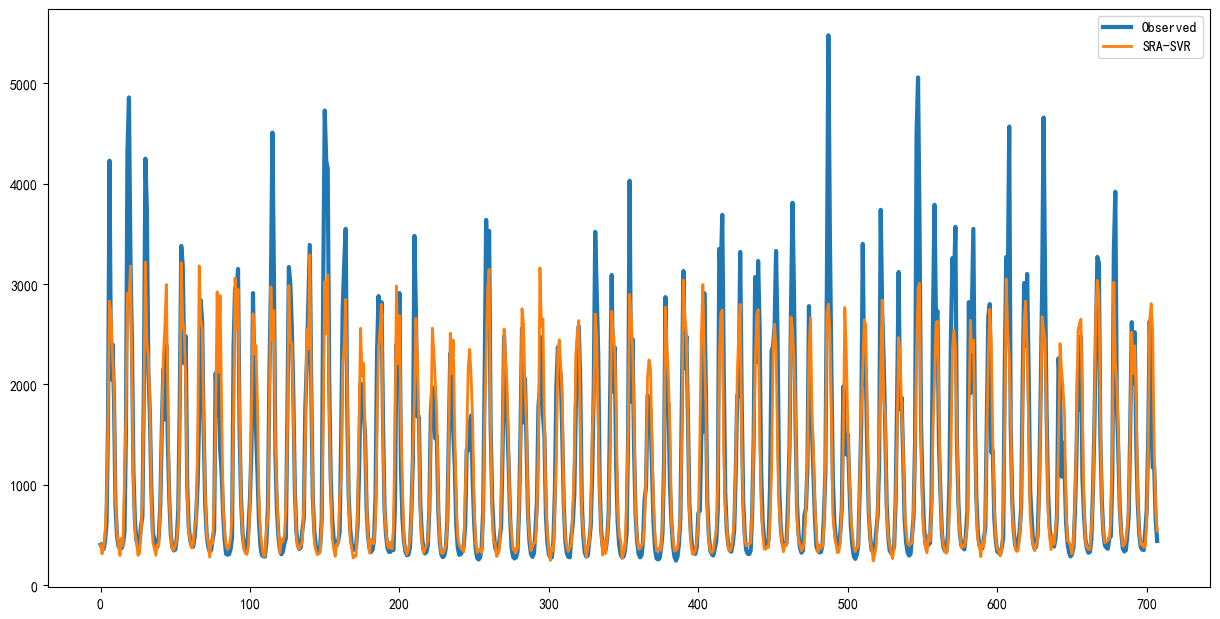

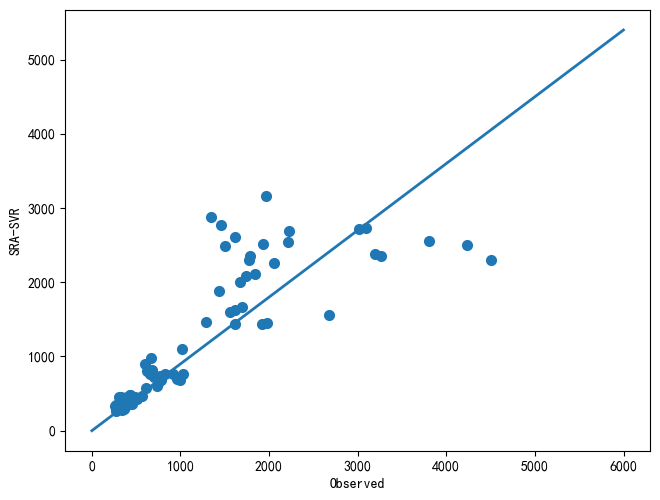

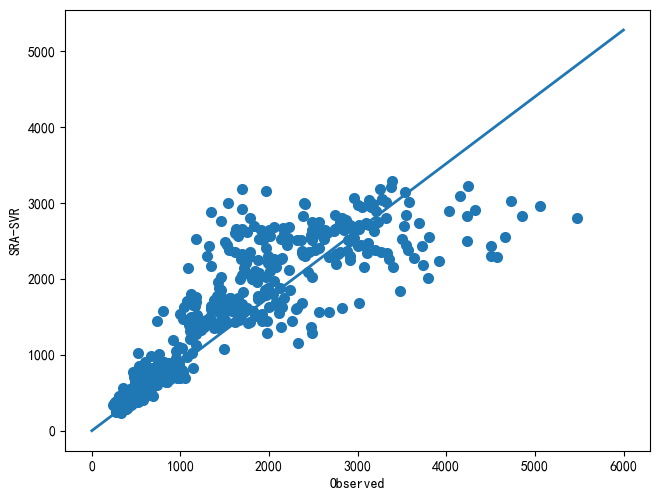

In [22]:
# dfM_y1.shape,dfM_y2.shape,dfM_y3.shape,dfM_y4.shape；# y1,y2,y3,y4分别对应两河口，锦屏，官地，二滩
# # MMsrX2,MMsrX2,dfM_y1,顺序是两河口，锦屏，官地，二滩。

## SVR预测
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

# 划分训练集和测试集
X2_train,X2_test,y2_train,y2_test=train_test_split(MMsrX2,df_y2,test_size=0.1,random_state=34,shuffle=True)
# X2_train.shape,X2_test.shape,y2_train.shape,y2_test.shape

# scorer = make_scorer(rmsle, greater_is_better=False, size=10)
# scorer = make_scorer(mean_squared_error, greater_is_better=False)
# grid = GridSearchCV(est, param_grid, scoring=scorer)

# grid_param1=[
#     {'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100,160], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
#     {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 160],'epsilon':[0.01,0.1,1,10]},#linear内核不接受“gamma”作为参数；
#     {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 160],'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
#     {'kernel': ['sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 160], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
# ]
grid_param1=[
#     {'C':[0.1,0.5,1,5,10],'kernel': ['linear'], 'epsilon':[0.05,0.1,1,10]},#linear内核不接受“gamma”作为参数；
# #     {'C':[0.01,0.005,0.1,1,10,50],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
#     {'C':[0.1,0.5,1,5,10],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.05,0.1,1,10],'gamma':['auto','scale']}#默认gamma值为scale。
#     {'C':[1170,1176,1178,1179,1180,1182,1185,1190,1200,1210],'kernel':['poly','rbf','sigmoid'],'epsilon':[90,101,102,103,104,105,106,107,108,109,110,112,115,120,125,150],'gamma':['auto','scale']},#默认gamma值为scale。
#     {'C':[1179,1180,1190,1200],'kernel':['poly','rbf','sigmoid'],'epsilon':[106,107,108,109,110],'gamma':['auto','scale']},#默认gamma值为scale。
    {'C':[1000],'kernel':['poly','rbf','sigmoid'],'epsilon':[100],'gamma':['auto','scale']},#默认gamma值为scale。
#     {'C':[15,20,25],'kernel':['linear'], 'epsilon':[10,13,15]}#linear内核不接受“gamma”作为参数；
    ]

#上面一句代码可以用下一句代替，但是需注意，linear不接接受“gamma"作为内核，所以下面的kernel中不要用linear，用的话也没问题，但是恐怕中间出错
# param_grid={'C':[0.01,0.005,0.1,1,10,50],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}#定义参数网格

kfold=KFold(n_splits=12,shuffle=True,random_state=34)#定义10折随机分组
# grid_svr2=GridSearchCV(SVR(), grid_param1,cv=kfold,return_train_score=True,scoring = "neg_mean_squared_error",n_jobs=-1)
# grid_svr2=GridSearchCV(SVR(), grid_param1,cv=kfold,return_train_score=True,scoring = scorer)
grid_svr2=GridSearchCV(SVR(), grid_param1,cv=kfold,return_train_score=True,scoring = "r2",n_jobs=5)

print ("fitting model right now")
grid_svr2.fit(X2_train,y2_train)
print(grid_svr2.best_score_, grid_svr2.best_params_)#0.15时 0.774166100134361 {'C': 160, 'epsilon': 5, 'gamma': 1, 'kernel': 'poly'}
svr_pred2_train=grid_svr2.predict(X2_train)
svr_pred2_test=grid_svr2.predict(X2_test)
print(f'训练集mse: {mean_squared_error(y2_train,svr_pred2_train)},训练集r2_score: {r2_score(y2_train,svr_pred2_train)}')
print(f'训练集mae: {mean_absolute_error(y2_train,svr_pred2_train)},训练集mape: {mean_absolute_percentage_error(y2_train,svr_pred2_train)}')
print(f'训练集msle: {msle(y2_train,svr_pred2_train)}')
      
print(f'测试集mse: {mean_squared_error(y2_test,svr_pred2_test)},测试集r2_score: {r2_score(y2_test,svr_pred2_test)}')
print(f'测试集mae: {mean_absolute_error(y2_test,svr_pred2_test)},测试集mape: {mean_absolute_percentage_error(y2_test,svr_pred2_test)}')
print(f'测试集msle: {msle(y2_test,svr_pred2_test)}')
#合并训练集和测试集的预测，方便后续和真实的所有数据画图。
# svr_pred2=np.concatenate([svr_pred2_train,svr_pred2_test],axis=0)#注意，此处合并后和原数据的index并不对应，因为此处是shuffle打乱后的。

#正确的不应该是上面一句，而应该是用训练后的模型对所有的数据重新预测一次
svr_pred2=grid_svr2.predict(MMsrX2)

# print(svr_pred2.shape,svr_pred2)
# print(type(svr_pred2))#<class 'numpy.ndarray'>
# print(svr_pred2)
np.savetxt('sra_svr_pred2_y2.csv', svr_pred2, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
np.savetxt('sra_svr_pred2_y21.csv', svr_pred2, delimiter=',')#默认使用科学计数法。

#测试集画图
import matplotlib.pyplot as plt
xx20=range(0,len(y2_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx20,y2_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx20,svr_pred2_test,color="orange",label="SRA-SVR",linewidth=2)
plt.plot(xx20,y2_test,label="Observed",linewidth=2) 
plt.plot(xx20,svr_pred2_test,label="SRA-SVR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_SVR_y20test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx21=range(0,len(df_y2))
plt.figure(figsize=(12,6))
# plt.scatter(xx21,df_y2,color="red",label="Observed",linewidth=3) 
# plt.plot(xx21,svr_pred2,color="orange",label="SRA-MLP",linewidth=2)
plt.plot(xx21,df_y2,label="Observed",linewidth=3) 
plt.plot(xx21,svr_pred2,label="SRA-SVR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_SVR_y20full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a20=np.arange(6000)
a21=a20*0.9
# plt.scatter(y2_test,svr_pred2_test,label="Observed",linewidth=2) 
plt.scatter(y2_test,svr_pred2_test,linewidth=2) 
plt.plot(a20,a21,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_SVR_y2_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a22=np.arange(6000)
# a23=[(n *1.6) for n in np.arange(4000)]
a23=a22*0.88
# plt.scatter(y2_test,svr_pred2,label="Observed",linewidth=2) 
plt.scatter(df_y2,svr_pred2,linewidth=2) 
plt.plot(a22,a23,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_SVR_y2_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

fitting model right now


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7904559582751962 {'C': 1000, 'epsilon': 100, 'gamma': 'scale', 'kernel': 'rbf'}
训练集mse: 231218.59896984487,训练集r2_score: 0.839668431653427
训练集mae: 265.4682739850848,训练集mape: 0.16865205329083688
训练集msle: 0.04670151361450817
测试集mse: 349300.51493084145,测试集r2_score: 0.7383391905918364
测试集mae: 356.5493730584266,测试集mape: 0.2200414964147735
测试集msle: 0.06759461973836765


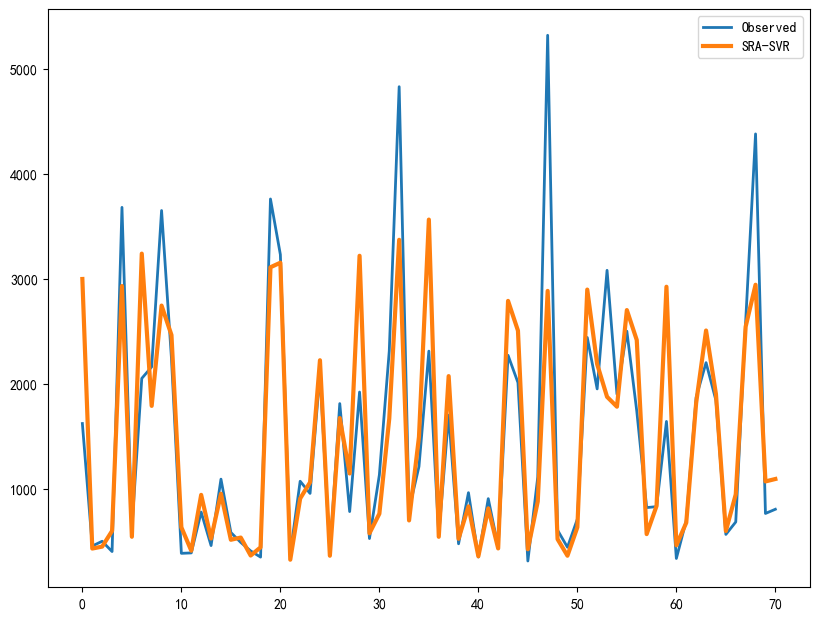

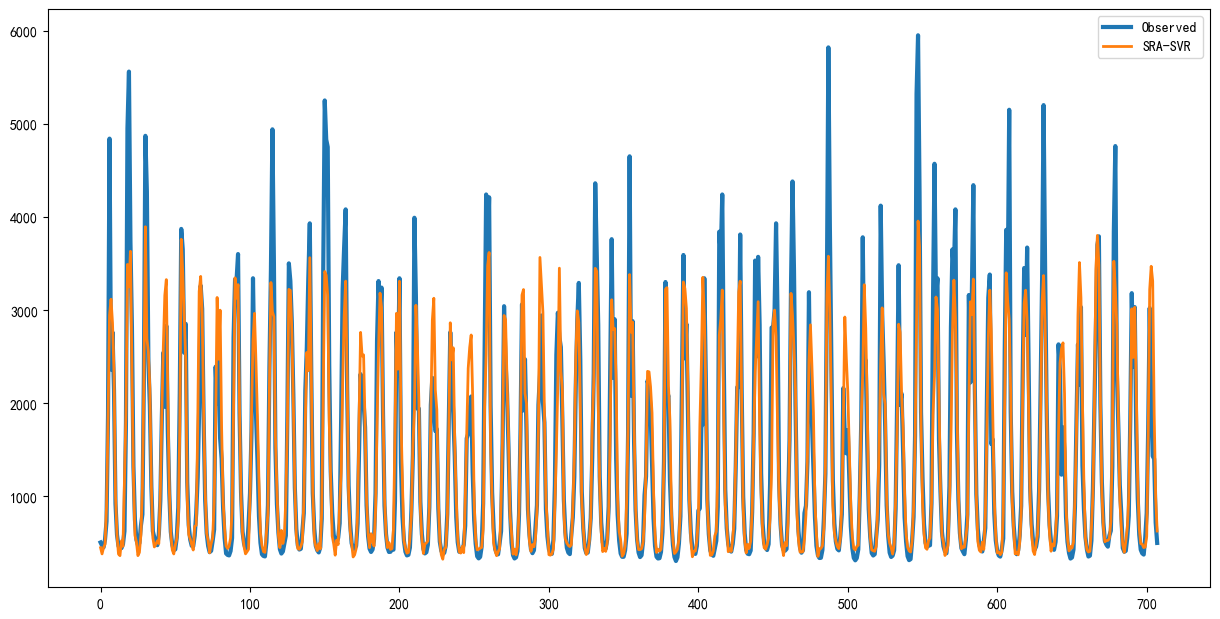

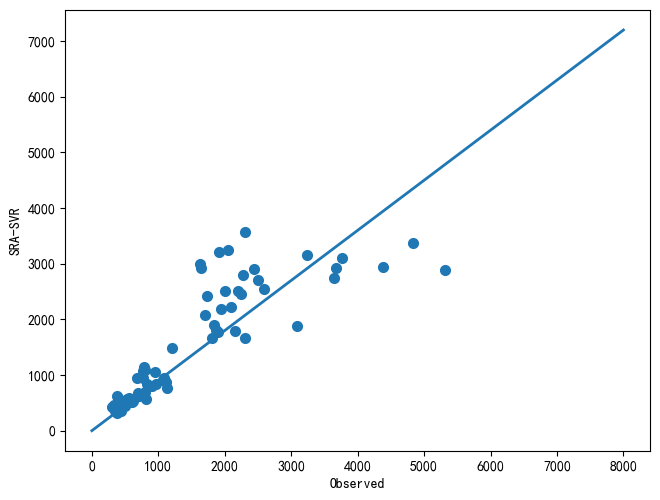

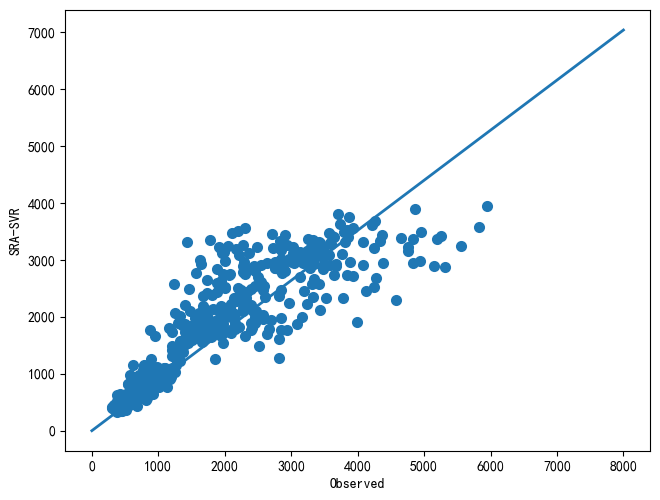

In [23]:
# dfM_y1.shape,dfM_y2.shape,dfM_y3.shape,dfM_y4.shape；# y1,y2,y3,y4分别对应两河口，锦屏，官地，二滩
# # MMsrX3,MMsrX3,dfM_y1,顺序是两河口，锦屏，官地，二滩。

## SVR预测
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

# 划分训练集和测试集
X3_train,X3_test,y3_train,y3_test=train_test_split(MMsrX3,df_y3,test_size=0.1,random_state=34,shuffle=True)
# X3_train.shape,X3_test.shape,y3_train.shape,y3_test.shape

# scorer = make_scorer(rmsle, greater_is_better=False, size=10)
# scorer = make_scorer(mean_squared_error, greater_is_better=False)
# grid = GridSearchCV(est, param_grid, scoring=scorer)

# grid_param1=[
#     {'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100,160], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
#     {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 160],'epsilon':[0.01,0.1,1,10]},#linear内核不接受“gamma”作为参数；
#     {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 160],'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
#     {'kernel': ['sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 160], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
# ]
grid_param1=[
#     {'C':[0.1,0.5,1,5,10],'kernel': ['linear'], 'epsilon':[0.05,0.1,1,10]},#linear内核不接受“gamma”作为参数；
# #     {'C':[0.01,0.005,0.1,1,10,50],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
#     {'C':[0.1,0.5,1,5,10],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.05,0.1,1,10],'gamma':['auto','scale']}#默认gamma值为scale。
#     {'C':[1170,1176,1178,1179,1180,1182,1185,1190,1200,1210],'kernel':['poly','rbf','sigmoid'],'epsilon':[90,101,102,103,104,105,106,107,108,109,110,112,115,120,125,150],'gamma':['auto','scale']},#默认gamma值为scale。
#     {'C':[1179,1180,1190,1200],'kernel':['poly','rbf','sigmoid'],'epsilon':[106,107,108,109,110],'gamma':['auto','scale']},#默认gamma值为scale。
    {'C':[1000],'kernel':['poly','rbf','sigmoid'],'epsilon':[100],'gamma':['auto','scale']},#默认gamma值为scale。
#     {'C':[15,20,25],'kernel':['linear'], 'epsilon':[10,13,15]}#linear内核不接受“gamma”作为参数；
    ]

#上面一句代码可以用下一句代替，但是需注意，linear不接接受“gamma"作为内核，所以下面的kernel中不要用linear，用的话也没问题，但是恐怕中间出错
# param_grid={'C':[0.01,0.005,0.1,1,10,50],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}#定义参数网格

kfold=KFold(n_splits=12,shuffle=True,random_state=34)#定义10折随机分组
# grid_svr3=GridSearchCV(SVR(), grid_param1,cv=kfold,return_train_score=True,scoring = "neg_mean_squared_error",n_jobs=-1)
# grid_svr3=GridSearchCV(SVR(), grid_param1,cv=kfold,return_train_score=True,scoring = scorer)
grid_svr3=GridSearchCV(SVR(), grid_param1,cv=kfold,return_train_score=True,scoring = "r2",n_jobs=5)

print ("fitting model right now")
grid_svr3.fit(X3_train,y3_train)
print(grid_svr3.best_score_, grid_svr3.best_params_)#0.15时 0.774166100134361 {'C': 160, 'epsilon': 5, 'gamma': 1, 'kernel': 'poly'}
svr_pred3_train=grid_svr3.predict(X3_train)
svr_pred3_test=grid_svr3.predict(X3_test)
print(f'训练集mse: {mean_squared_error(y3_train,svr_pred3_train)},训练集r2_score: {r2_score(y3_train,svr_pred3_train)}')
print(f'训练集mae: {mean_absolute_error(y3_train,svr_pred3_train)},训练集mape: {mean_absolute_percentage_error(y3_train,svr_pred3_train)}')
print(f'训练集msle: {msle(y3_train,svr_pred3_train)}')
      
print(f'测试集mse: {mean_squared_error(y3_test,svr_pred3_test)},测试集r2_score: {r2_score(y3_test,svr_pred3_test)}')
print(f'测试集mae: {mean_absolute_error(y3_test,svr_pred3_test)},测试集mape: {mean_absolute_percentage_error(y3_test,svr_pred3_test)}')
print(f'测试集msle: {msle(y3_test,svr_pred3_test)}')
#合并训练集和测试集的预测，方便后续和真实的所有数据画图。
# svr_pred3=np.concatenate([svr_pred3_train,svr_pred3_test],axis=0)#注意，此处合并后和原数据的index并不对应，因为此处是shuffle打乱后的。

#正确的不应该是上面一句，而应该是用训练后的模型对所有的数据重新预测一次
svr_pred3=grid_svr3.predict(MMsrX3)

# print(svr_pred3.shape,svr_pred3)
# print(type(svr_pred3))#<class 'numpy.ndarray'>
# print(svr_pred3)
np.savetxt('sra_svr_pred3_y3.csv', svr_pred3, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
np.savetxt('sra_svr_pred3_y31.csv', svr_pred3, delimiter=',')#默认使用科学计数法。

#测试集画图
import matplotlib.pyplot as plt
xx30=range(0,len(y3_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx30,y3_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx30,svr_pred3_test,color="orange",label="SRA-SVR",linewidth=2)
plt.plot(xx30,y3_test,label="Observed",linewidth=2) 
plt.plot(xx30,svr_pred3_test,label="SRA-SVR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_SVR_y30test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx31=range(0,len(df_y3))
plt.figure(figsize=(12,6))
# plt.scatter(xx31,df_y3,color="red",label="Observed",linewidth=3) 
# plt.plot(xx31,svr_pred3,color="orange",label="SRA-MLP",linewidth=2)
plt.plot(xx31,df_y3,label="Observed",linewidth=3) 
plt.plot(xx31,svr_pred3,label="SRA-SVR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_SVR_y30full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a30=np.arange(8000)
a31=a30*0.9
# plt.scatter(y3_test,svr_pred3_test,label="Observed",linewidth=2) 
plt.scatter(y3_test,svr_pred3_test,linewidth=2) 
plt.plot(a30,a31,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_SVR_y3_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a32=np.arange(8000)
# a33=[(n *1.6) for n in np.arange(4000)]
a33=a32*0.88
# plt.scatter(y3_test,svr_pred3,label="Observed",linewidth=2) 
plt.scatter(df_y3,svr_pred3,linewidth=2) 
plt.plot(a32,a33,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_SVR_y3_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

fitting model right now


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7908169921880296 {'C': 1000, 'epsilon': 110, 'gamma': 'scale', 'kernel': 'rbf'}
训练集mse: 334640.20024266705,训练集r2_score: 0.8306017414189864
训练集mae: 315.3785891447866,训练集mape: 0.1738679862581431
训练集msle: 0.04837971753330285
测试集mse: 559239.4040219906,测试集r2_score: 0.6865274755033168
测试集mae: 438.8509254646619,测试集mape: 0.21990082901415173
测试集msle: 0.07287249515002708


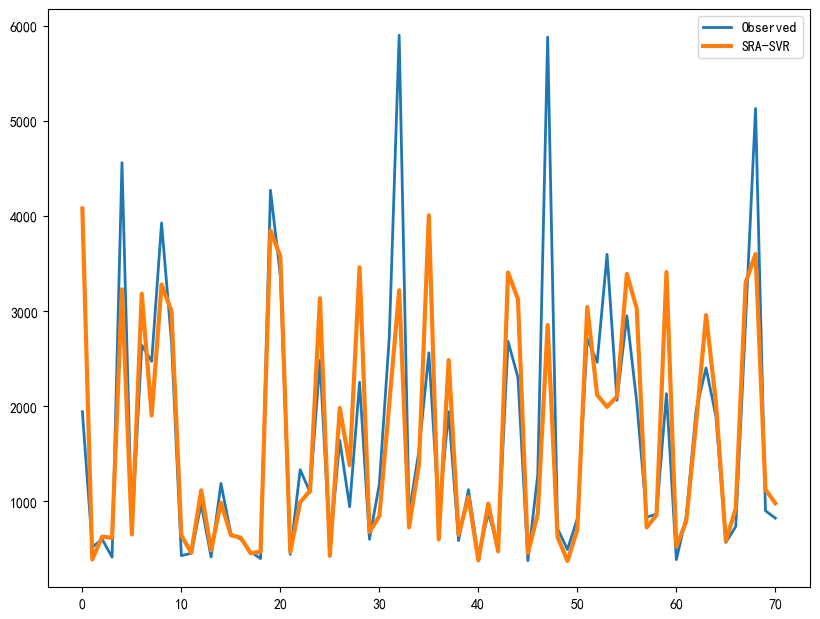

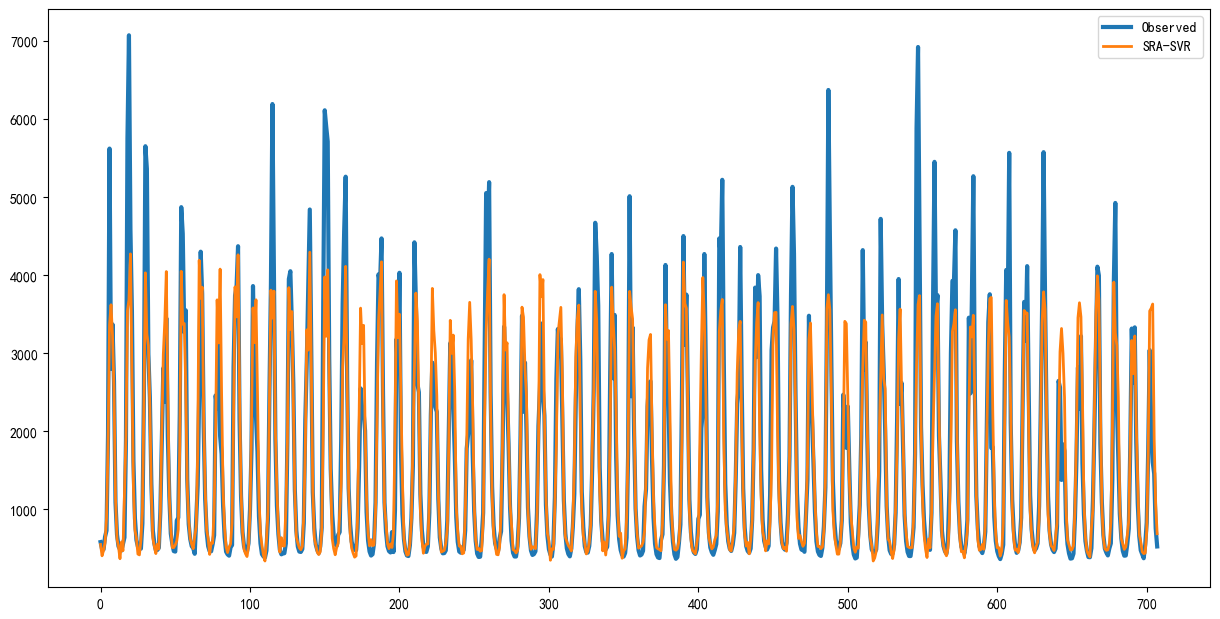

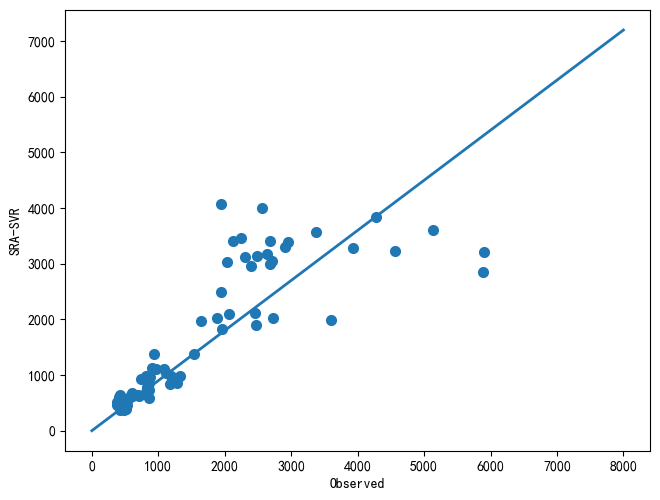

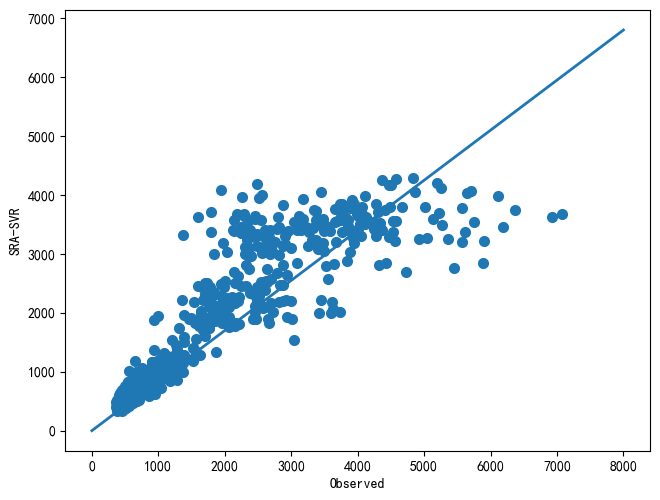

In [21]:
# dfM_y1.shape,dfM_y2.shape,dfM_y3.shape,dfM_y4.shape；# y1,y2,y3,y4分别对应两河口，锦屏，官地，二滩
# # MMsrX4,MMsrX4,dfM_y1,顺序是两河口，锦屏，官地，二滩。

## SVR预测
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

# 划分训练集和测试集
X4_train,X4_test,y4_train,y4_test=train_test_split(MMsrX4,df_y4,test_size=0.1,random_state=34,shuffle=True)
# X4_train.shape,X4_test.shape,y4_train.shape,y4_test.shape

# scorer = make_scorer(rmsle, greater_is_better=False, size=10)
# scorer = make_scorer(mean_squared_error, greater_is_better=False)
# grid = GridSearchCV(est, param_grid, scoring=scorer)

# grid_param1=[
#     {'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100,160], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
#     {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 160],'epsilon':[0.01,0.1,1,10]},#linear内核不接受“gamma”作为参数；
#     {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 160],'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
#     {'kernel': ['sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 160], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],'epsilon':[0.01,0.1,1,5]},
# ]
grid_param1=[
#     {'C':[0.1,0.5,1,5,10],'kernel': ['linear'], 'epsilon':[0.05,0.1,1,10]},#linear内核不接受“gamma”作为参数；
# #     {'C':[0.01,0.005,0.1,1,10,50],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
#     {'C':[0.1,0.5,1,5,10],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.05,0.1,1,10],'gamma':['auto','scale']}#默认gamma值为scale。
#     {'C':[1170,1176,1178,1179,1180,1182,1185,1190,1200,1210],'kernel':['poly','rbf','sigmoid'],'epsilon':[90,101,102,103,104,105,106,107,108,109,110,112,115,120,125,150],'gamma':['auto','scale']},#默认gamma值为scale。
#     {'C':[1179,1180,1190,1200],'kernel':['poly','rbf','sigmoid'],'epsilon':[106,107,108,109,110],'gamma':['auto','scale']},#默认gamma值为scale。
    {'C':[1000],'kernel':['poly','rbf','sigmoid'],'epsilon':[100,106,107,108,109,110],'gamma':['auto','scale']},#默认gamma值为scale。
#     {'C':[15,20,25],'kernel':['linear'], 'epsilon':[10,13,15]}#linear内核不接受“gamma”作为参数；
    ]

#上面一句代码可以用下一句代替，但是需注意，linear不接接受“gamma"作为内核，所以下面的kernel中不要用linear，用的话也没问题，但是恐怕中间出错
# param_grid={'C':[0.01,0.005,0.1,1,10,50],'kernel':['poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}#定义参数网格

kfold=KFold(n_splits=12,shuffle=True,random_state=34)#定义10折随机分组
# grid_svr4=GridSearchCV(SVR(), grid_param1,cv=kfold,return_train_score=True,scoring = "neg_mean_squared_error",n_jobs=-1)
# grid_svr4=GridSearchCV(SVR(), grid_param1,cv=kfold,return_train_score=True,scoring = scorer)
grid_svr4=GridSearchCV(SVR(), grid_param1,cv=kfold,return_train_score=True,scoring = "r2",n_jobs=5)

print ("fitting model right now")
grid_svr4.fit(X4_train,y4_train)
print(grid_svr4.best_score_, grid_svr4.best_params_)#0.15时 0.774166100134361 {'C': 160, 'epsilon': 5, 'gamma': 1, 'kernel': 'poly'}
svr_pred4_train=grid_svr4.predict(X4_train)
svr_pred4_test=grid_svr4.predict(X4_test)
print(f'训练集mse: {mean_squared_error(y4_train,svr_pred4_train)},训练集r2_score: {r2_score(y4_train,svr_pred4_train)}')
print(f'训练集mae: {mean_absolute_error(y4_train,svr_pred4_train)},训练集mape: {mean_absolute_percentage_error(y4_train,svr_pred4_train)}')
print(f'训练集msle: {msle(y4_train,svr_pred4_train)}')
      
print(f'测试集mse: {mean_squared_error(y4_test,svr_pred4_test)},测试集r2_score: {r2_score(y4_test,svr_pred4_test)}')
print(f'测试集mae: {mean_absolute_error(y4_test,svr_pred4_test)},测试集mape: {mean_absolute_percentage_error(y4_test,svr_pred4_test)}')
print(f'测试集msle: {msle(y4_test,svr_pred4_test)}')
#合并训练集和测试集的预测，方便后续和真实的所有数据画图。
# svr_pred4=np.concatenate([svr_pred4_train,svr_pred4_test],axis=0)#注意，此处合并后和原数据的index并不对应，因为此处是shuffle打乱后的。

#正确的不应该是上面一句，而应该是用训练后的模型对所有的数据重新预测一次
svr_pred4=grid_svr4.predict(MMsrX4)

# print(svr_pred4.shape,svr_pred4)
# print(type(svr_pred4))#<class 'numpy.ndarray'>
# print(svr_pred4)
np.savetxt('sra_svr_pred4_y4.csv', svr_pred4, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
np.savetxt('sra_svr_pred4_y41.csv', svr_pred4, delimiter=',')#默认使用科学计数法。

#测试集画图
import matplotlib.pyplot as plt
xx40=range(0,len(y4_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx40,y4_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx40,svr_pred4_test,color="orange",label="SRA-SVR",linewidth=2)
plt.plot(xx40,y4_test,label="Observed",linewidth=2) 
plt.plot(xx40,svr_pred4_test,label="SRA-SVR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_SVR_y40test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx41=range(0,len(df_y4))
plt.figure(figsize=(12,6))
# plt.scatter(xx41,df_y4,color="red",label="Observed",linewidth=3) 
# plt.plot(xx41,svr_pred4,color="orange",label="SRA-MLP",linewidth=2)
plt.plot(xx41,df_y4,label="Observed",linewidth=3) 
plt.plot(xx41,svr_pred4,label="SRA-SVR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_SVR_y40full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a40=np.arange(8000)
a41=a40*0.9
# plt.scatter(y4_test,svr_pred4_test,label="Observed",linewidth=2) 
plt.scatter(y4_test,svr_pred4_test,linewidth=2) 
plt.plot(a40,a41,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_SVR_y4_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a42=np.arange(8000)
# a43=[(n *1.6) for n in np.arange(4000)]
a43=a42*0.85
# plt.scatter(y4_test,svr_pred4,label="Observed",linewidth=2) 
plt.scatter(df_y4,svr_pred4,linewidth=2) 
plt.plot(a42,a43,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-SVR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_SVR_y4_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

In [ ]:
print(grid2.best_score_, grid2.best_params_)#0.7781210475911909 {'C': 50, 'epsilon': 0.01, 'gamma': 1, 'kernel': 'poly'}

In [ ]:
print(grid2.cv_results_)

In [ ]:
from sklearn.metrics import r2_score
y1_pred=grid2.predict(X1_test)

In [ ]:
print(f'MAE:{mean_absolute_error(y1_test,y1_pred)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y1_test,y1_pred))}')
print(f'r2_score:{r2_score(y1_test,y1_pred)}')

# MAE:433.1033137740764
# RMSE:710.7950637451326
# r2_score:0.5900517506099203

In [ ]:
y1_test

In [ ]:
y1_pred

## 2.以下为MLP预测部分

Training in progress:


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


-190130.90060029775 {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': (32, 64, 32, 16, 8, 1), 'solver': 'lbfgs'}
训练集mse: 47061.296790236775,训练集r2_score: 0.8484420407912149
训练集mae: 134.08155100340596,训练集mape: 0.2143332102793343
训练集msle: 0.06727148041748472
测试集mse: 66743.88188741419,测试集r2_score: 0.7598210097851914
测试集mae: 168.7936275373362,测试集mape: 0.22896830562138185
测试集msle: 0.07576510983478627


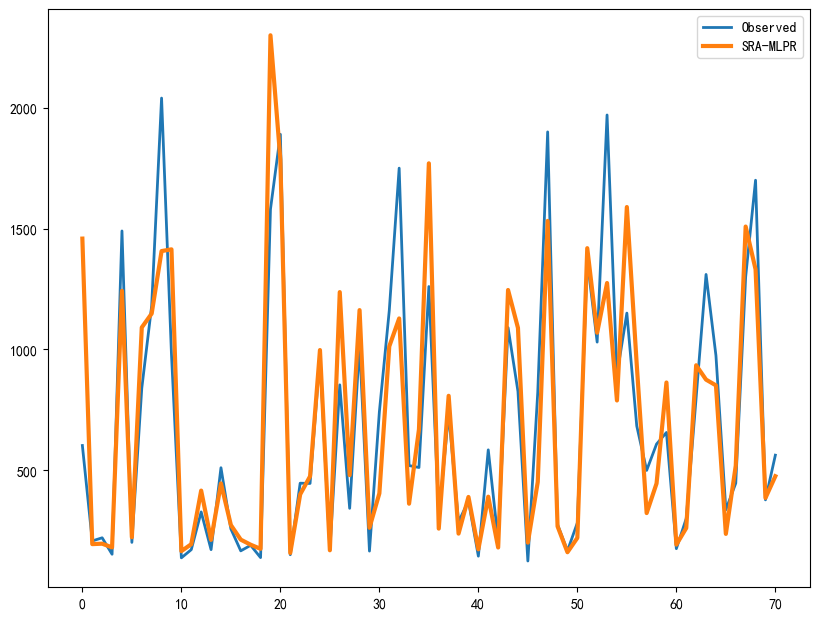

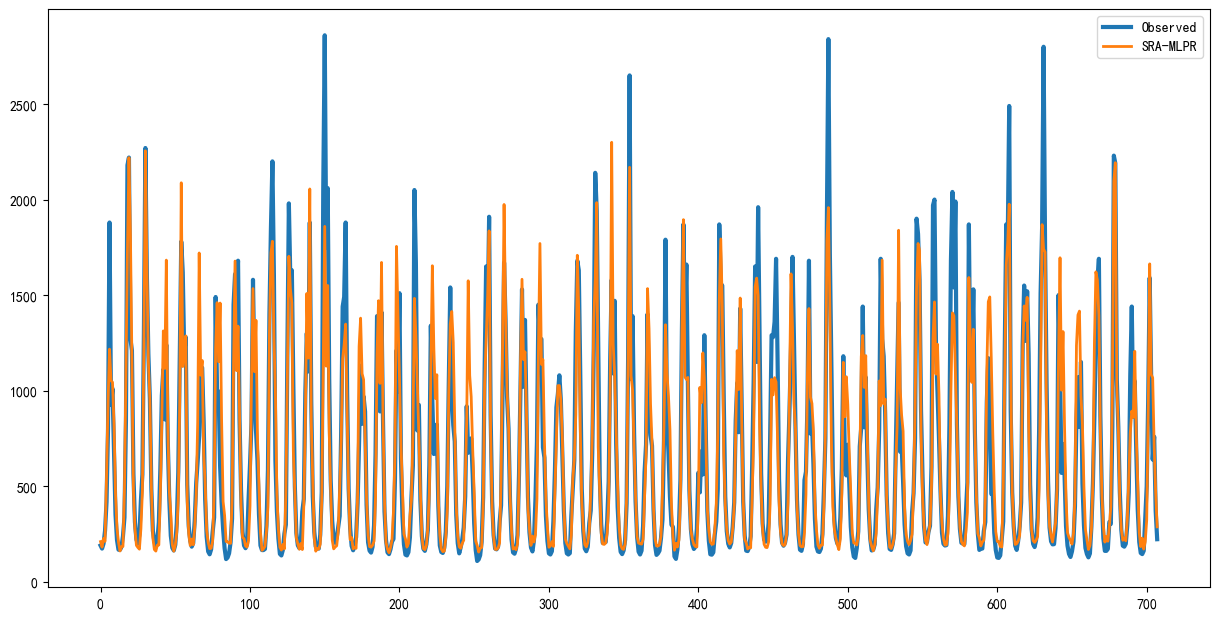

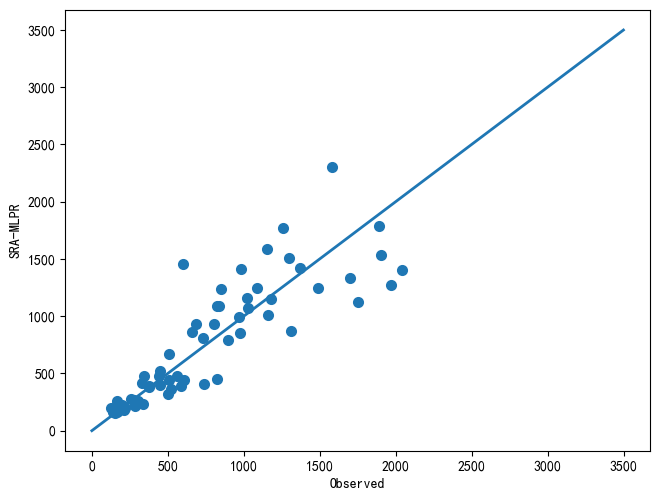

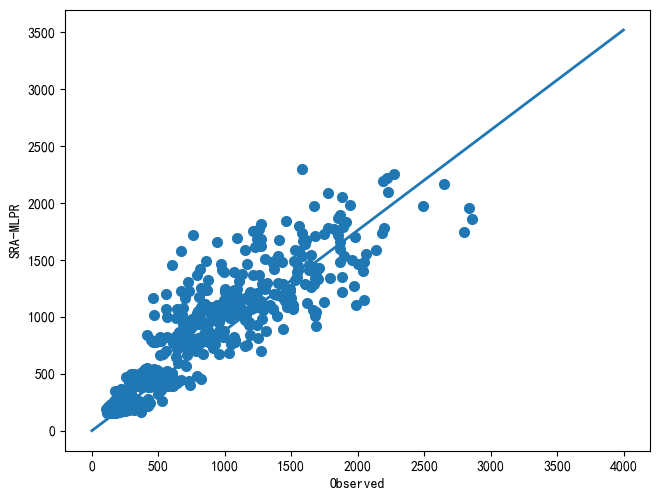

In [42]:
## MLP5预测
# 上一代码块已经划分好了训练集和测试集，此处就不重复划分了
'''模型构建'''
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

MLP5=MLPRegressor()#early_stopping=True

# MLP5param_grid=[
#     {'hidden_layer_sizes': [(64,128,64,32,8,1),(128,64,32,16,8,1),(128,64,32,16,1),(64,128,256,128,64,32,8,1)], 
#      'activation': ['logistic', 'tanh', 'relu'], 'solver': ['adam','lbfgs','sgd'], "alpha": [0.0001,0.0005]}
# ]

MLP5param_grid=[
    {'hidden_layer_sizes': [(64,128,64,32,16,8,1),(128,64,32,16,8,1),(64,32,16,8,1),(32,64,32,16,8,1)], 'activation': ['tanh', 'relu'],
     'solver': ['sgd','adam','lbfgs'], "alpha": [0.0001,0.00025,0.0005]}]
# ,(256,128,32,16,1)

# MLP5 = MLP5Regressor(
#     hidden_layer_sizes=(100,50), activation='relu',solver='adam',#第一个隐藏层有100个节点，第二层有50个，激活函数用relu，梯度下降方法用adam
#     alpha=0.01,max_iter=200) # '''惩罚系数为0.01，最大迭代次数为200'''

X5_train,X5_test,y5_train,y5_test=train_test_split(MMsrX1,df_y1,test_size=0.1,random_state=34,shuffle=True)

# kfold=KFold(n_splits=12,shuffle=False,random_state=34)#定义12折随机分组
kfold=KFold(n_splits=12,random_state=34,shuffle=True)#定义12折随机分组

# crv_MLP5=cross_validate(estimator=MLP5, X1_train,y5_train,scoring=('r2', 'neg_mean_squared_error'), cv=kfold, n_jobs=-1,
#                        return_train_score=True)

# scoring = {'abs_error': 'neg_mean_absolute_error','squared_error': 'neg_mean_squared_error','r2':'r2'}
# scores = cross_validate(best_mlp, X, Y, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)

grid_MLP5=GridSearchCV(estimator=MLP5, param_grid=MLP5param_grid,cv=kfold,return_train_score=True,scoring = "neg_mean_squared_error",n_jobs=5)

print ("Training in progress:")
grid_MLP5.fit(X5_train,y5_train)
print(grid_MLP5.best_score_, grid_MLP5.best_params_)
# grid_MLP5.score(X5_train,y5_train),grid_MLP5.score(X5_test,y5_test)
mlp_pred5_train = grid_MLP5.predict(X5_train)
mlp_pred5_test = grid_MLP5.predict(X5_test)

print(f'训练集mse: {mean_squared_error(y5_train,mlp_pred5_train)},训练集r2_score: {r2_score(y5_train,mlp_pred5_train)}')
print(f'训练集mae: {mean_absolute_error(y5_train,mlp_pred5_train)},训练集mape: {mean_absolute_percentage_error(y5_train,mlp_pred5_train)}')
print(f'训练集msle: {msle(y5_train,mlp_pred5_train)}')
      
print(f'测试集mse: {mean_squared_error(y5_test,mlp_pred5_test)},测试集r2_score: {r2_score(y5_test,mlp_pred5_test)}')
print(f'测试集mae: {mean_absolute_error(y5_test,mlp_pred5_test)},测试集mape: {mean_absolute_percentage_error(y5_test,mlp_pred5_test)}')
print(f'测试集msle: {msle(y5_test,mlp_pred5_test)}')
#合并训练集和测试集的预测，方便后续和真实的所有数据画图。
# mlp_pred5=np.concatenate([mlp_pred5_train,mlp_pred5_test],axis=0)#注意，此处合并后和原数据的index并不对应，因为此处是shuffle打乱后的。

#正确的不应该是上面一句，而应该是用训练后的模型对所有的数据重新预测一次
mlp_pred5=grid_MLP5.predict(MMsrX1)

# print(mlp_pred5.shape,mlp_pred5)
# print(type(mlp_pred5))#<class 'numpy.ndarray'>
# print(mlp_pred5)
np.savetxt('sra_mlp_pred5_y1.csv', mlp_pred5, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
np.savetxt('sra_mlp_pred5_y11.csv', mlp_pred5, delimiter=',')#默认使用科学计数法。


'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx50=range(0,len(y5_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx50,y5_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx50,mlp_pred5_test,color="orange",label="SRA-MLPR",linewidth=2)
plt.plot(xx50,y5_test,label="Observed",linewidth=2) 
plt.plot(xx50,mlp_pred5_test,label="SRA-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y11_1test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx51=range(0,len(df_y1))
plt.figure(figsize=(12,6))
# plt.scatter(xx51,df_y1,color="red",label="Observed",linewidth=3) 
# plt.plot(xx51,mlp_pred5,color="orange",label="SRA-MLPR",linewidth=2)
plt.plot(xx51,df_y1,label="Observed",linewidth=3) 
plt.plot(xx51,mlp_pred5,label="SRA-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y11_1full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a50=np.arange(3500)
a51=a50
# plt.scatter(y1_test,mlp_pred5_test,label="Observed",linewidth=2) 
plt.scatter(y5_test,mlp_pred5_test,linewidth=2) 
plt.plot(a50,a51,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y1_1test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a52=np.arange(4000)
# a53=[(n *1.6) for n in np.arange(4000)]
a53=a52*0.88
# plt.scatter(y1_test,svr_pred1,label="Observed",linewidth=2) 
plt.scatter(df_y1,mlp_pred5,linewidth=2) 
plt.plot(a52,a53,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y1_1full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

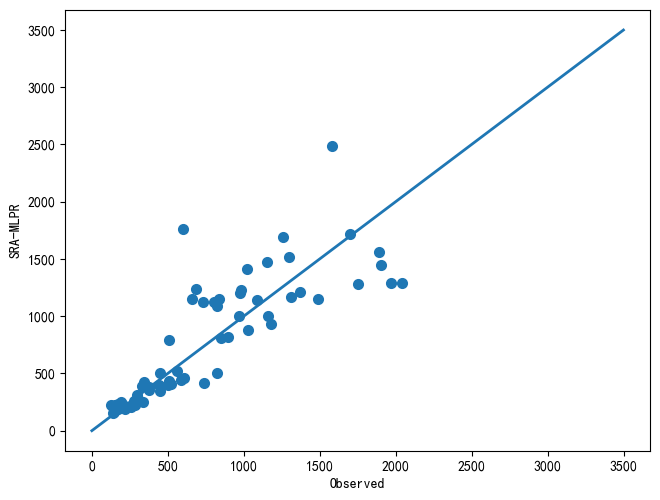

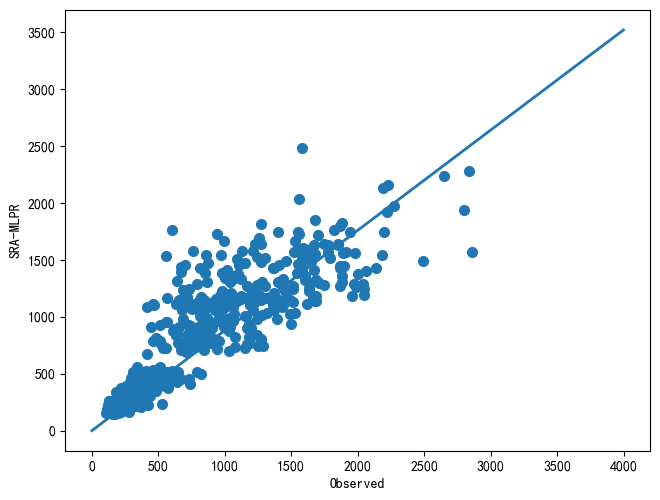

In [29]:
#测试集数据画回归图
a50=np.arange(3500)
a51=a50
# plt.scatter(y1_test,mlp_pred5_test,label="Observed",linewidth=2) 
plt.scatter(y5_test,mlp_pred5_test,linewidth=2) 
plt.plot(a50,a51,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y1_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a52=np.arange(4000)
# a53=[(n *1.6) for n in np.arange(4000)]
a53=a52*0.88
# plt.scatter(y1_test,svr_pred1,label="Observed",linewidth=2) 
plt.scatter(df_y1,mlp_pred5,linewidth=2) 
plt.plot(a52,a53,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y1_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

In [ ]:
pred5=np.concatenate([pred5_train,pred5_test],axis=0)
# print(pred5.shape,pred5)
print(pred5)
np.savetxt('pred5_y1.csv', pred5, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
# np.savetxt('pred5_y11.csv', pred5, delimiter=',')#默认使用科学计数法。
# print(type(pred5))#<class 'numpy.ndarray'>

Training in progress:


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 1152.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", lin

0.43724828537395255 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 32, 16, 8, 1), 'solver': 'lbfgs'}
训练集mse: 182216.31144753454,训练集r2_score: 0.8333529902134829
训练集mae: 260.4166666635276,训练集mape: 0.20244917302214907
训练集msle: 0.06053359819937851
测试集mse: 292445.60596463643,测试集r2_score: 0.709362793162319
测试集mae: 348.5220081081139,测试集mape: 0.2466972941258595
测试集msle: 0.07718818878038759


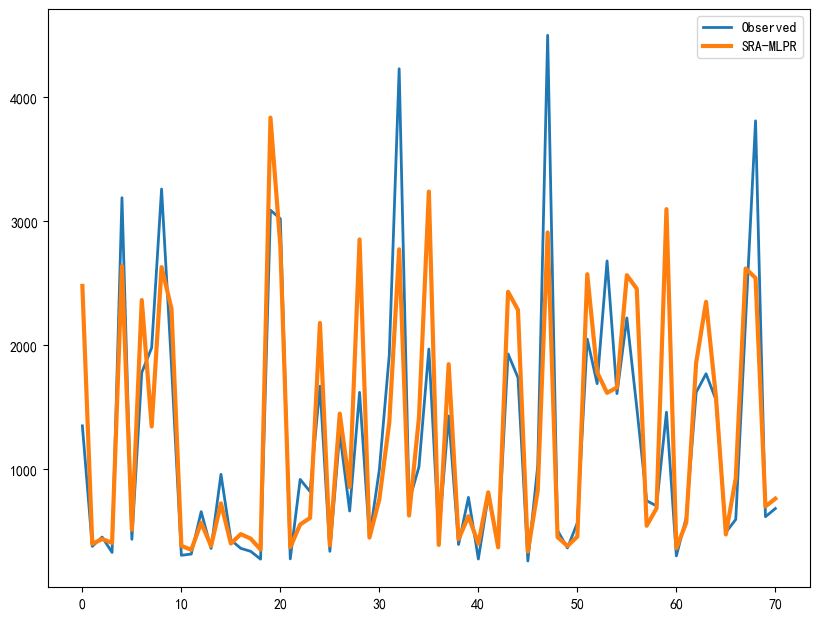

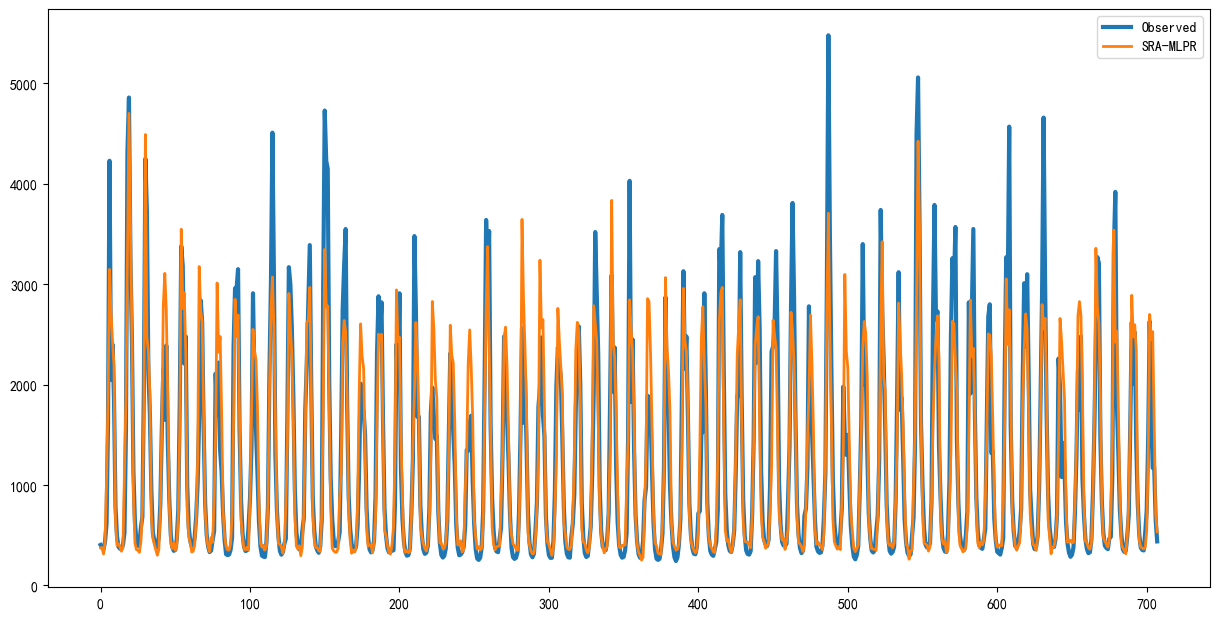

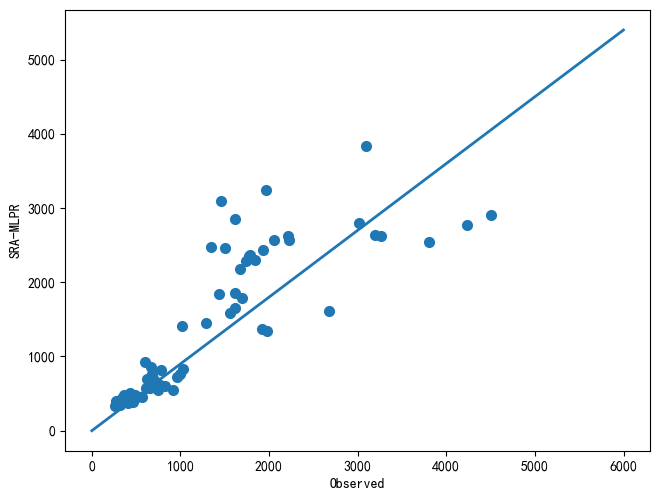

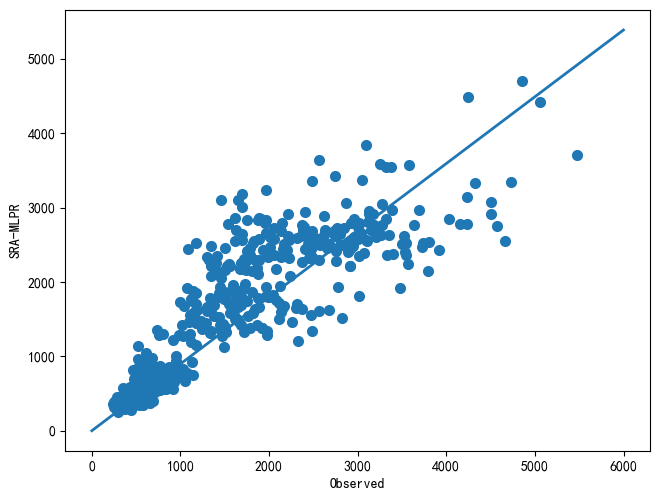

In [23]:
## MLP6预测
# 上一代码块已经划分好了训练集和测试集，此处就不重复划分了
'''模型构建'''
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

MLP6=MLPRegressor()#early_stopping=True

# MLP6param_grid=[
#     {'hidden_layer_sizes': [(64,128,64,32,16,8,1),(128,64,32,16,8,1),(128,64,32,16,8,4,1),(256,128,32,16,1)], 'activation': ['tanh', 'relu'],
#      'solver': ['lbfgs','sgd','adam'], "alpha": [0.0001,0.0005,0.001]}
# ]

MLP6param_grid=[
    {'hidden_layer_sizes': [(64,128,64,32,16,8,1),(128,64,32,16,8,1),(64,32,16,8,1),(32,64,32,16,8,1)], 'activation': ['tanh', 'relu'],
     'solver': ['sgd','adam','lbfgs'], "alpha": [0.0001,0.00025,0.0005,0.001]}
]#(256,128,32,16,1)


# MLP6 = MLP6Regressor(
#     hidden_layer_sizes=(100,50), activation='relu',solver='adam',#第一个隐藏层有100个节点，第二层有50个，激活函数用relu，梯度下降方法用adam
#     alpha=0.01,max_iter=200) # '''惩罚系数为0.01，最大迭代次数为200'''

X6_train,X6_test,y6_train,y6_test=train_test_split(MMsrX2,df_y2,test_size=0.1,random_state=34,shuffle=True)

# kfold=KFold(n_splits=10,shuffle=False,random_state=34)#定义10折随机分组
kfold=KFold(n_splits=12,random_state=34,shuffle=True)#定义10折随机分组

# crv_MLP6=cross_validate(estimator=MLP6, X1_train,y6_train,scoring=('r2', 'neg_mean_squared_error'), cv=kfold, n_jobs=-1,
#                        return_train_score=True)

# scoring = {'abs_error': 'neg_mean_absolute_error','squared_error': 'neg_mean_squared_error','r2':'r2'}
# scores = cross_validate(best_mlp, X, Y, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)

grid_MLP6=GridSearchCV(estimator=MLP6, param_grid=MLP6param_grid, cv=kfold, return_train_score=True, scoring = "r2",n_jobs=5)

print ("Training in progress:")
grid_MLP6.fit(X6_train,y6_train)
print(grid_MLP6.best_score_, grid_MLP6.best_params_)
# grid_MLP6.score(X6_train,y6_train),grid_MLP6.score(X6_test,y6_test)
mlp_pred6_train = grid_MLP6.predict(X6_train)
mlp_pred6_test = grid_MLP6.predict(X6_test)

print(f'训练集mse: {mean_squared_error(y6_train,mlp_pred6_train)},训练集r2_score: {r2_score(y6_train,mlp_pred6_train)}')
print(f'训练集mae: {mean_absolute_error(y6_train,mlp_pred6_train)},训练集mape: {mean_absolute_percentage_error(y6_train,mlp_pred6_train)}')
print(f'训练集msle: {msle(y6_train,mlp_pred6_train)}')
      
print(f'测试集mse: {mean_squared_error(y6_test,mlp_pred6_test)},测试集r2_score: {r2_score(y6_test,mlp_pred6_test)}')
print(f'测试集mae: {mean_absolute_error(y6_test,mlp_pred6_test)},测试集mape: {mean_absolute_percentage_error(y6_test,mlp_pred6_test)}')
print(f'测试集msle: {msle(y6_test,mlp_pred6_test)}')
#合并训练集和测试集的预测，方便后续和真实的所有数据画图。
# mlp_pred6=np.concatenate([mlp_pred6_train,mlp_pred6_test],axis=0)#注意，此处合并后和原数据的index并不对应，因为此处是shuffle打乱后的。

#正确的不应该是上面一句，而应该是用训练后的模型对所有的数据重新预测一次
mlp_pred6=grid_MLP6.predict(MMsrX2)

# print(mlp_pred6.shape,mlp_pred6)
# print(type(mlp_pred6))#<class 'numpy.ndarray'>
# print(mlp_pred6)
np.savetxt('sra_mlp_pred6_y2_1.csv', mlp_pred6, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
np.savetxt('sra_mlp_pred6_y21_1.csv', mlp_pred6, delimiter=',')#默认使用科学计数法。

'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx60=range(0,len(y6_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx60,y6_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx60,mlp_pred6_test,color="orange",label="SRA-MLPR",linewidth=2)
plt.plot(xx60,y6_test,label="Observed",linewidth=2) 
plt.plot(xx60,mlp_pred6_test,label="SRA-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y21_1test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx61=range(0,len(df_y2))
plt.figure(figsize=(12,6))
# plt.scatter(xx61,df_y2,color="red",label="Observed",linewidth=3) 
# plt.plot(xx61,mlp_pred6,color="orange",label="SRA-MLPR",linewidth=2)
plt.plot(xx61,df_y2,label="Observed",linewidth=3) 
plt.plot(xx61,mlp_pred6,label="SRA-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y21_1full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a60=np.arange(6000)
a61=a60*0.9
# plt.scatter(y2_test,mlp_pred6_test,label="Observed",linewidth=2) 
plt.scatter(y6_test,mlp_pred6_test,linewidth=2) 
plt.plot(a60,a61,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y2_1test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a62=np.arange(6000)
# a63=[(n *1.6) for n in np.arange(4000)]
a63=a62*0.898
# plt.scatter(y2_test,mlp_pred6,label="Observed",linewidth=2) 
plt.scatter(df_y2,mlp_pred6,linewidth=2) 
plt.plot(a62,a63,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y2_1full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

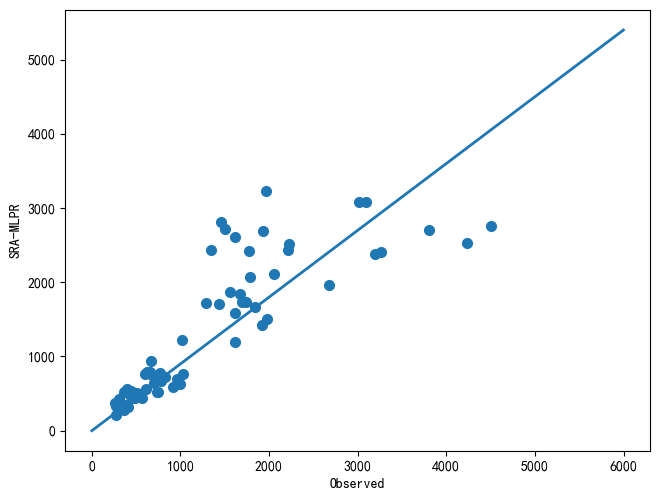

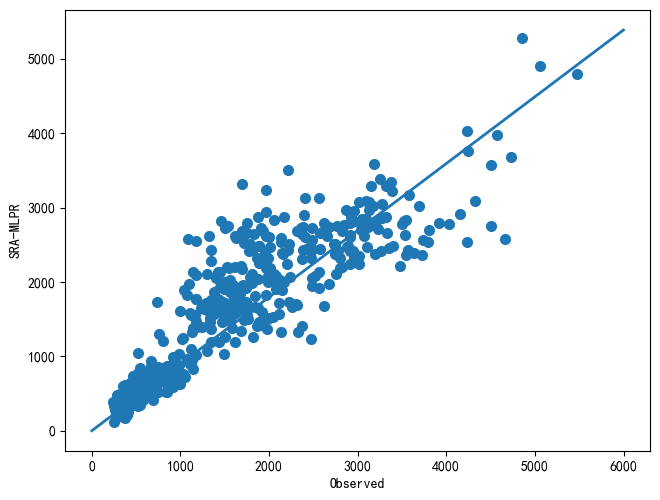

In [25]:
#测试集数据画回归图
a60=np.arange(6000)
a61=a60*0.9
# plt.scatter(y2_test,mlp_pred6_test,label="Observed",linewidth=2) 
plt.scatter(y6_test,mlp_pred6_test,linewidth=2) 
plt.plot(a60,a61,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y2_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a62=np.arange(6000)
# a63=[(n *1.6) for n in np.arange(4000)]
a63=a62*0.898
# plt.scatter(y2_test,mlp_pred6,label="Observed",linewidth=2) 
plt.scatter(df_y2,mlp_pred6,linewidth=2) 
plt.plot(a62,a63,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y2_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

Training in progress:


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line

0.2927029386018137 {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': (64, 128, 64, 32, 16, 8, 1), 'solver': 'lbfgs'}
训练集mse: 212209.72278513695,训练集r2_score: 0.8528495639013458
训练集mae: 275.6703426866544,训练集mape: 0.18326048187969188
训练集msle: 0.051266914910087426
测试集mse: 309899.00239353324,测试集r2_score: 0.7678548403596566
测试集mae: 345.325003167367,测试集mape: 0.2084426781288929
测试集msle: 0.06238222559063155


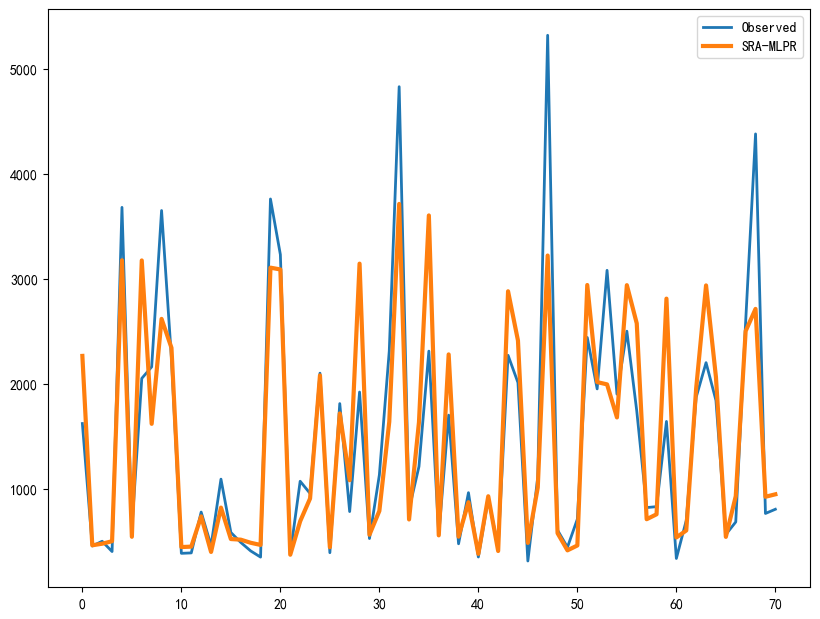

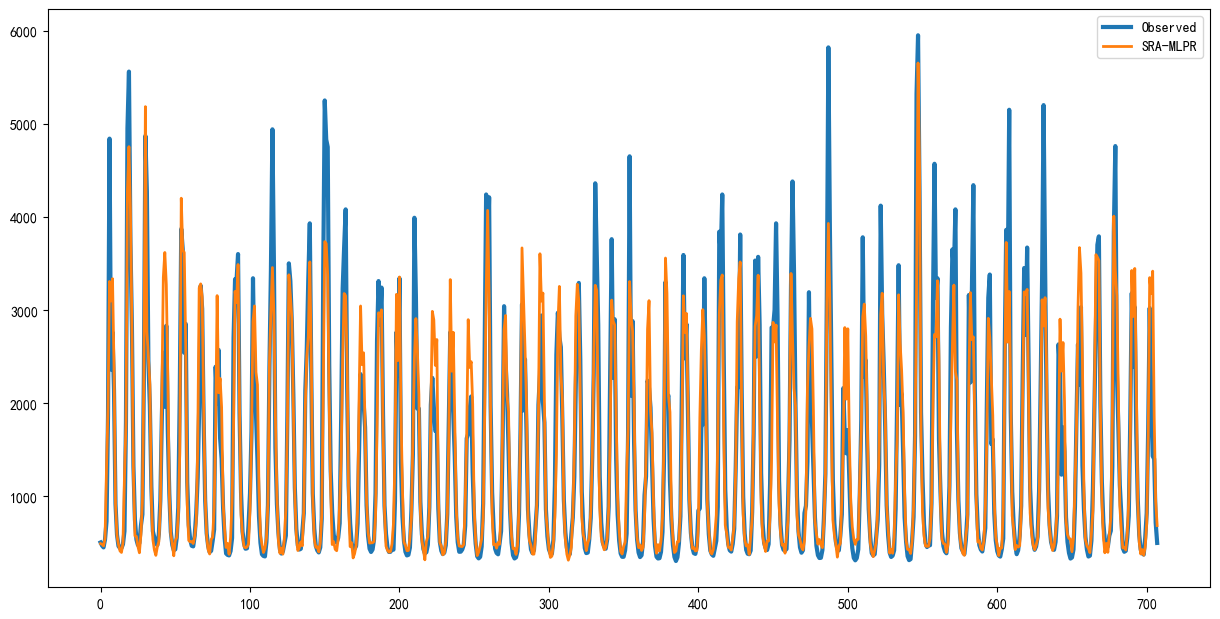

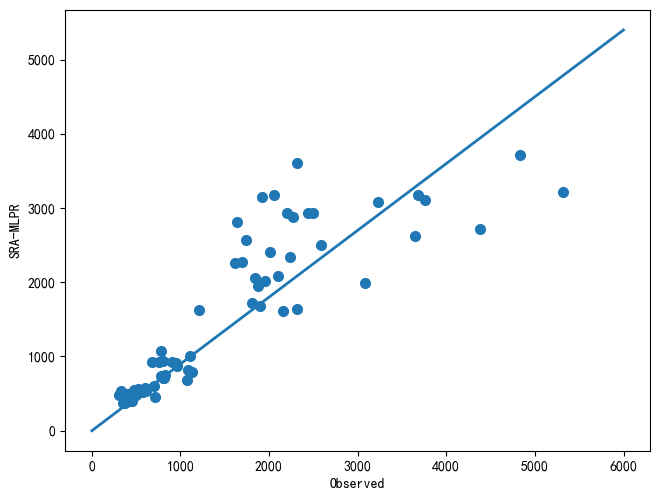

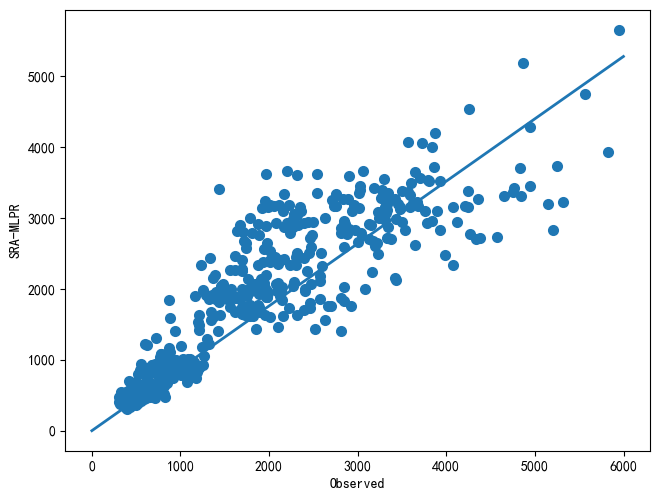

In [29]:
## MLP7预测
# 上一代码块已经划分好了训练集和测试集，此处就不重复划分了
'''模型构建'''
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

MLP7=MLPRegressor()#early_stopping=True

# MLP7param_grid=[
#     {'hidden_layer_sizes': [(64,128,64,32,8,1),(128,64,32,16,8,1),(128,64,32,16,1),(64,128,256,128,64,32,8,1c)], 
#      'activation': ['logistic', 'tanh', 'relu'], 'solver': ['adam','lbfgs','sgd'], "alpha": [0.0001,0.0005]}
# ]

MLP7param_grid=[
    {'hidden_layer_sizes': [(64,128,64,32,16,8,1),(128,64,32,16,8,1),(256,128,32,16,1)], 'activation': ['tanh', 'relu'],
     'solver': ['lbfgs','sgd','adam'], "alpha": [0.0001,0.0005,0.001]}
]

# MLP7 = MLP7Regressor(
#     hidden_layer_sizes=(100,50), activation='relu',solver='adam',#第一个隐藏层有100个节点，第二层有50个，激活函数用relu，梯度下降方法用adam
#     alpha=0.01,max_iter=200) # '''惩罚系数为0.01，最大迭代次数为200'''

X7_train,X7_test,y7_train,y7_test=train_test_split(MMsrX3,df_y3,test_size=0.1,random_state=34,shuffle=True)

# kfold=KFold(n_splits=10,shuffle=False,random_state=34)#定义10折随机分组
kfold=KFold(n_splits=12,random_state=34,shuffle=True)#定义10折随机分组

# crv_MLP7=cross_validate(estimator=MLP7, X1_train,y7_train,scoring=('r2', 'neg_mean_squared_error'), cv=kfold, n_jobs=-1,
#                        return_train_score=True)

# scoring = {'abs_error': 'neg_mean_absolute_error','squared_error': 'neg_mean_squared_error','r2':'r2'}
# scores = cross_validate(best_mlp, X, Y, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)

grid_MLP7=GridSearchCV(estimator=MLP7, param_grid=MLP7param_grid,cv=kfold,return_train_score=True,scoring = "r2",n_jobs=5)

print ("Training in progress:")
grid_MLP7.fit(X7_train,y7_train)
# grid_MLP7.score(X7_train,y7_train),grid_MLP7.score(X7_test,y7_test)
print(grid_MLP7.best_score_, grid_MLP7.best_params_)
mlp_pred7_train = grid_MLP7.predict(X7_train)
mlp_pred7_test = grid_MLP7.predict(X7_test)

print(f'训练集mse: {mean_squared_error(y7_train,mlp_pred7_train)},训练集r2_score: {r2_score(y7_train,mlp_pred7_train)}')
print(f'训练集mae: {mean_absolute_error(y7_train,mlp_pred7_train)},训练集mape: {mean_absolute_percentage_error(y7_train,mlp_pred7_train)}')
print(f'训练集msle: {msle(y7_train,mlp_pred7_train)}')
      
print(f'测试集mse: {mean_squared_error(y7_test,mlp_pred7_test)},测试集r2_score: {r2_score(y7_test,mlp_pred7_test)}')
print(f'测试集mae: {mean_absolute_error(y7_test,mlp_pred7_test)},测试集mape: {mean_absolute_percentage_error(y7_test,mlp_pred7_test)}')
print(f'测试集msle: {msle(y7_test,mlp_pred7_test)}')
#合并训练集和测试集的预测，方便后续和真实的所有数据画图。
# mlp_pred7=np.concatenate([mlp_pred7_train,mlp_pred7_test],axis=0)#注意，此处合并后和原数据的index并不对应，因为此处是shuffle打乱后的。

#正确的不应该是上面一句，而应该是用训练后的模型对所有的数据重新预测一次
mlp_pred7=grid_MLP7.predict(MMsrX3)

# print(mlp_pred7.shape,mlp_pred7)
# print(type(mlp_pred7))#<class 'numpy.ndarray'>
# print(mlp_pred7)
np.savetxt('sra_mlp_pred7_y3.csv', mlp_pred7, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
np.savetxt('sra_mlp_pred7_y31.csv', mlp_pred7, delimiter=',')#默认使用科学计数法。

'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx70=range(0,len(y7_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx70,y7_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx70,mlp_pred7_test,color="orange",label="SRA-MLPR",linewidth=2)
plt.plot(xx70,y7_test,label="Observed",linewidth=2) 
plt.plot(xx70,mlp_pred7_test,label="SRA-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y31test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx71=range(0,len(df_y3))
plt.figure(figsize=(12,6))
# plt.scatter(xx71,df_y3,color="red",label="Observed",linewidth=3) 
# plt.plot(xx71,mlp_pred7,color="orange",label="SRA-MLPR",linewidth=2)
plt.plot(xx71,df_y3,label="Observed",linewidth=3) 
plt.plot(xx71,mlp_pred7,label="SRA-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y31full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a70=np.arange(6000)
a71=a70*0.9
# plt.scatter(y3_test,mlp_pred7_test,label="Observed",linewidth=2) 
plt.scatter(y3_test,mlp_pred7_test,linewidth=2) 
plt.plot(a70,a71,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y3_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a72=np.arange(6000)
# a73=[(n *1.6) for n in np.arange(4000)]
a73=a72*0.88
# plt.scatter(y3_test,mlp_pred7,label="Observed",linewidth=2) 
plt.scatter(df_y3,mlp_pred7,linewidth=2) 
plt.plot(a72,a73,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y3_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

Training in progress:


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line

0.31993680752820275 {'activation': 'relu', 'alpha': 0.00025, 'hidden_layer_sizes': (32, 64, 32, 16, 8, 1), 'solver': 'lbfgs'}
训练集mse: 295469.0376950105,训练集r2_score: 0.8504305806240641
训练集mae: 325.81073819247626,训练集mape: 0.18022631918601933
训练集msle: 0.04859338815054565
测试集mse: 633429.0256442927,测试集r2_score: 0.6449416934319192
测试集mae: 471.02021995570556,测试集mape: 0.2340085529920347
测试集msle: 0.0792944538016616


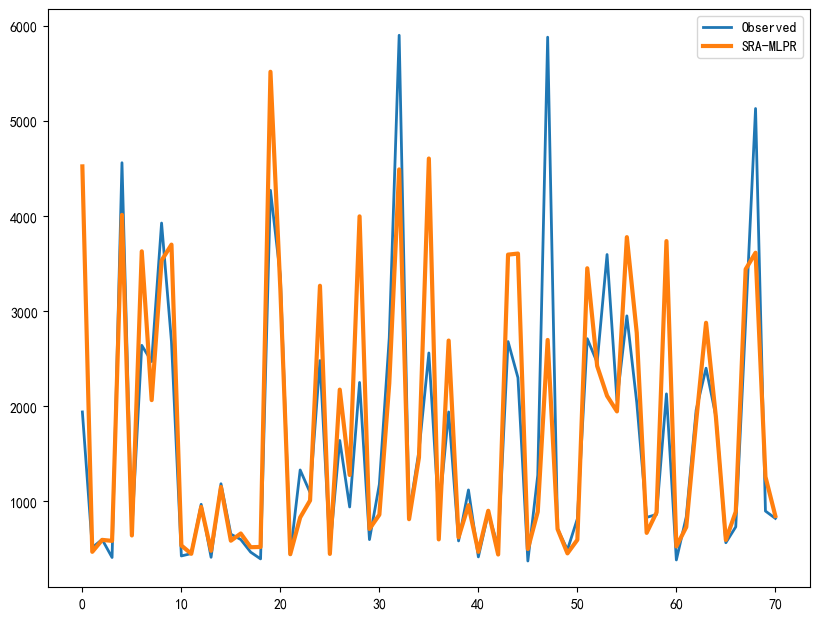

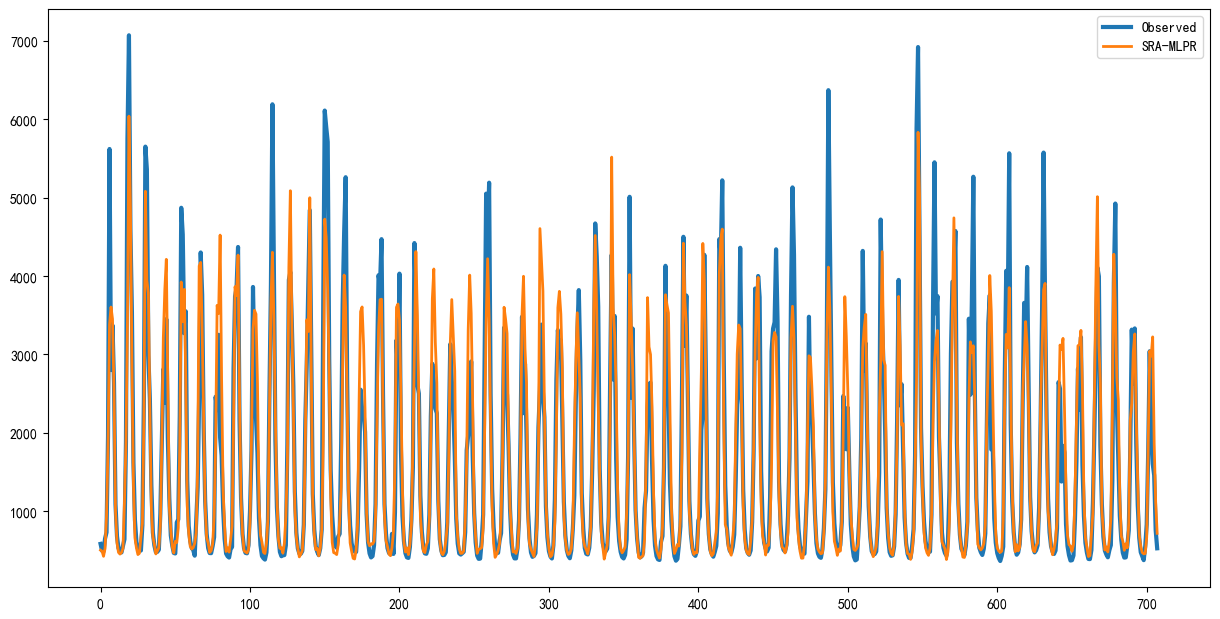

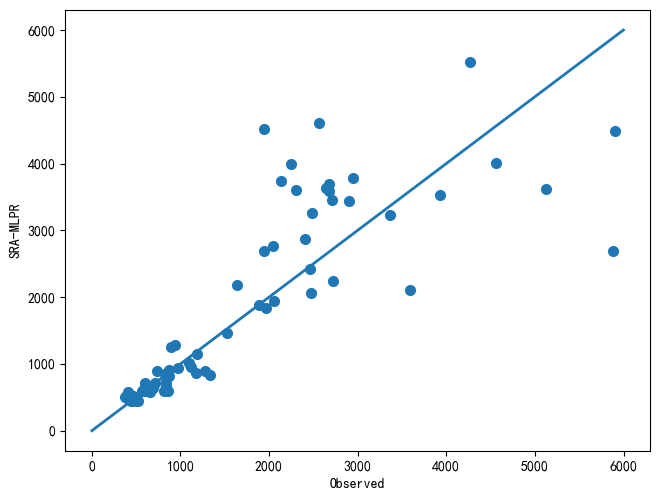

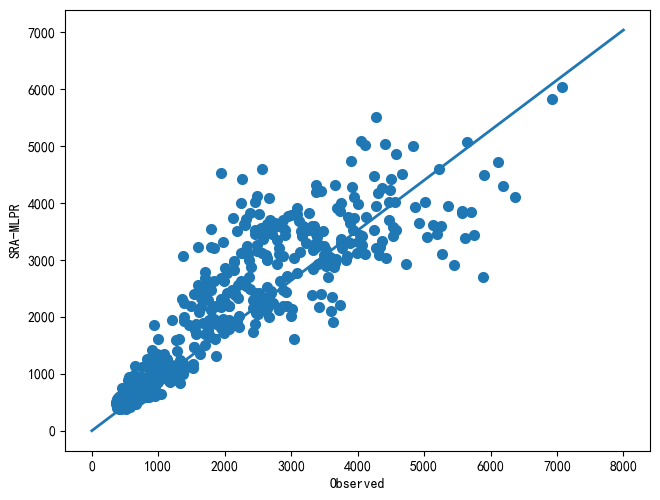

In [22]:
## MLP8预测
# 上一代码块已经划分好了训练集和测试集，此处就不重复划分了
'''模型构建'''
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

MLP8=MLPRegressor()#early_stopping=True

# MLP8param_grid=[
#     {'hidden_layer_sizes': [(64,128,64,32,8,1),(128,64,32,16,8,1),(128,64,32,16,1),(64,128,256,128,64,32,8,1)], 
#      'activation': ['logistic', 'tanh', 'relu'], 'solver': ['adam','lbfgs','sgd'], "alpha": [0.0001,0.0005]}
# ]

# MLP8param_grid=[
#     {'hidden_layer_sizes': [(64,128,64,32,16,8,1),(128,64,32,16,8,1),(128,64,32,8,1),(256,128,32,16,1)], 'activation': ['logistic', 'tanh', 'relu'],
#      'solver': ['sgd','adam','lbfgs'], "alpha": [0.0001,0.0005,0.001]}
# ]

MLP8param_grid=[
    {'hidden_layer_sizes': [(64,128,64,32,16,8,1),(128,64,32,16,8,1),(32,64,32,16,8,1)], 'activation': ['tanh', 'relu'],
     'solver': ['sgd','adam','lbfgs'], "alpha": [0.0001,0.00025,0.0005,0.0007]}
]#(256,128,32,16,1),(256,128,64,32,16,8,1),0.0007,0.001

# MLP8 = MLP8Regressor(
#     hidden_layer_sizes=(100,50), activation='relu',solver='adam',#第一个隐藏层有100个节点，第二层有50个，激活函数用relu，梯度下降方法用adam
#     alpha=0.01,max_iter=200) # '''惩罚系数为0.01，最大迭代次数为200'''

X8_train,X8_test,y8_train,y8_test=train_test_split(MMsrX4,df_y4,test_size=0.1,random_state=34,shuffle=True)

# kfold=KFold(n_splits=10,shuffle=False,random_state=34)#定义10折随机分组
kfold=KFold(n_splits=12,random_state=34,shuffle=True)#定义10折随机分组

# crv_MLP8=cross_validate(estimator=MLP8, X1_train,y8_train,scoring=('r2', 'neg_mean_squared_error'), cv=kfold, n_jobs=-1,
#                        return_train_score=True)

# scoring = {'abs_error': 'neg_mean_absolute_error','squared_error': 'neg_mean_squared_error','r2':'r2'}
# scores = cross_validate(best_mlp, X, Y, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)

grid_MLP8=GridSearchCV(estimator=MLP8, param_grid=MLP8param_grid,cv=kfold,return_train_score=True,scoring = "r2",n_jobs=5)

print ("Training in progress:")
grid_MLP8.fit(X8_train,y8_train)
print(grid_MLP8.best_score_, grid_MLP8.best_params_)
# grid_MLP8.score(X8_train,y8_train),grid_MLP8.score(X8_test,y8_test)
mlp_pred8_train = grid_MLP8.predict(X8_train)
mlp_pred8_test = grid_MLP8.predict(X8_test)

print(f'训练集mse: {mean_squared_error(y8_train,mlp_pred8_train)},训练集r2_score: {r2_score(y8_train,mlp_pred8_train)}')
print(f'训练集mae: {mean_absolute_error(y8_train,mlp_pred8_train)},训练集mape: {mean_absolute_percentage_error(y8_train,mlp_pred8_train)}')
print(f'训练集msle: {msle(y8_train,mlp_pred8_train)}')
      
print(f'测试集mse: {mean_squared_error(y8_test,mlp_pred8_test)},测试集r2_score: {r2_score(y8_test,mlp_pred8_test)}')
print(f'测试集mae: {mean_absolute_error(y8_test,mlp_pred8_test)},测试集mape: {mean_absolute_percentage_error(y8_test,mlp_pred8_test)}')
print(f'测试集msle: {msle(y8_test,mlp_pred8_test)}')
#合并训练集和测试集的预测，方便后续和真实的所有数据画图。
# mlp_pred8=np.concatenate([mlp_pred8_train,mlp_pred8_test],axis=0)#注意，此处合并后和原数据的index并不对应，因为此处是shuffle打乱后的。

#正确的不应该是上面一句，而应该是用训练后的模型对所有的数据重新预测一次
mlp_pred8=grid_MLP8.predict(MMsrX4)

# print(mlp_pred8.shape,mlp_pred8)
# print(type(mlp_pred8))#<class 'numpy.ndarray'>
# print(mlp_pred8)
np.savetxt('sra_mlp_pred8_y4.csv', mlp_pred8, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
np.savetxt('sra_mlp_pred8_y41.csv', mlp_pred8, delimiter=',')#默认使用科学计数法。

'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx80=range(0,len(y8_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx80,y8_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx80,mlp_pred8_test,color="orange",label="SRA-MLPR",linewidth=2)
plt.plot(xx80,y8_test,label="Observed",linewidth=2) 
plt.plot(xx80,mlp_pred8_test,label="SRA-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y41test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx81=range(0,len(df_y4))
plt.figure(figsize=(12,6))
# plt.scatter(xx81,df_y4,color="red",label="Observed",linewidth=3) 
# plt.plot(xx81,mlp_pred8,color="orange",label="SRA-MLPR",linewidth=2)
plt.plot(xx81,df_y4,label="Observed",linewidth=3) 
plt.plot(xx81,mlp_pred8,label="SRA-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y41full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a80=np.arange(8000)
a81=a80
# plt.scatter(y4_test,mlp_pred8_test,label="Observed",linewidth=2) 
plt.scatter(y8_test,mlp_pred8_test,linewidth=2) 
plt.plot(a80,a81,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y4_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a82=np.arange(8000)
# a83=[(n *1.6) for n in np.arange(4000)]
a83=a82*0.88
# plt.scatter(y8_test,mlp_pred8,label="Observed",linewidth=2) 
plt.scatter(df_y4,mlp_pred8,linewidth=2)
plt.plot(a82,a83,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y4_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

Training in progress:


C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\LiJintao\.conda\envs\dlt1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line

0.3224130271584032 {'activation': 'relu', 'alpha': 0.0003, 'hidden_layer_sizes': (32, 64, 32, 16, 8, 1), 'solver': 'lbfgs'}
训练集mse: 316379.0328942848,训练集r2_score: 0.8398457292788706
训练集mae: 333.98707224375875,训练集mape: 0.18985926851647245
训练集msle: 0.054103841069191486
测试集mse: 610090.7112001214,测试集r2_score: 0.6580236048524959
测试集mae: 482.2986053736078,测试集mape: 0.2499968681630468
测试集msle: 0.08695517962956383


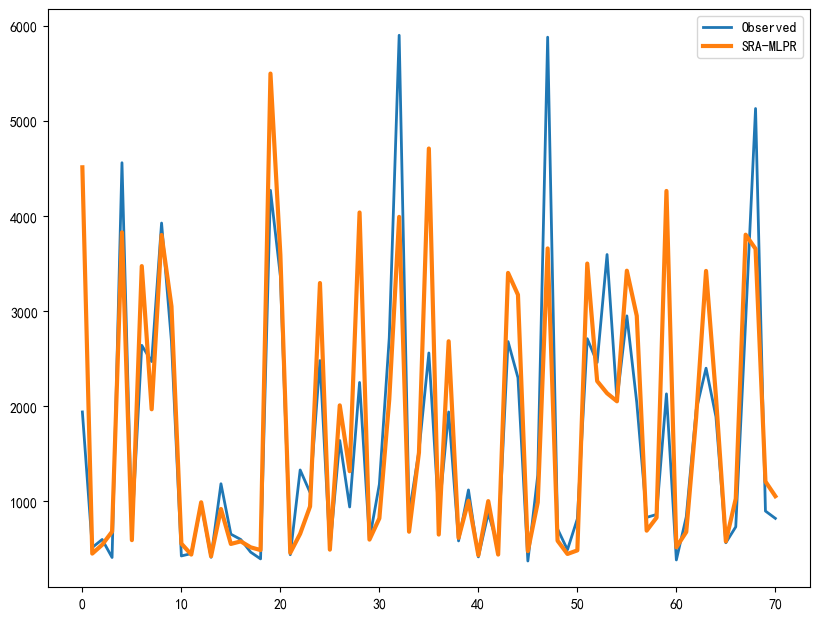

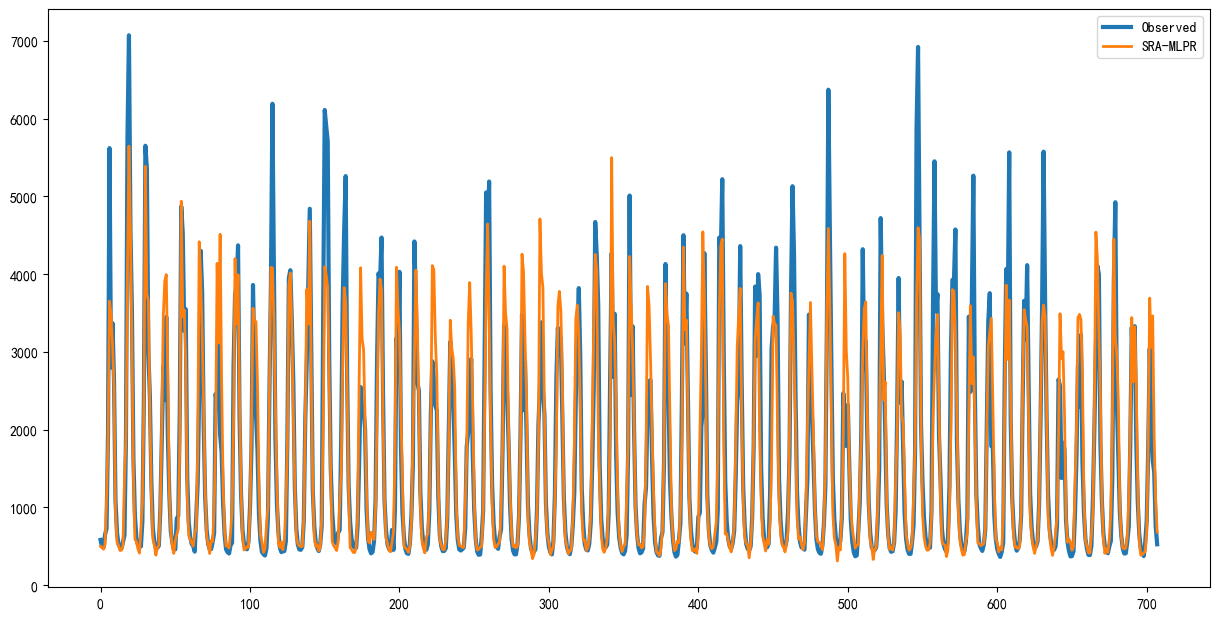

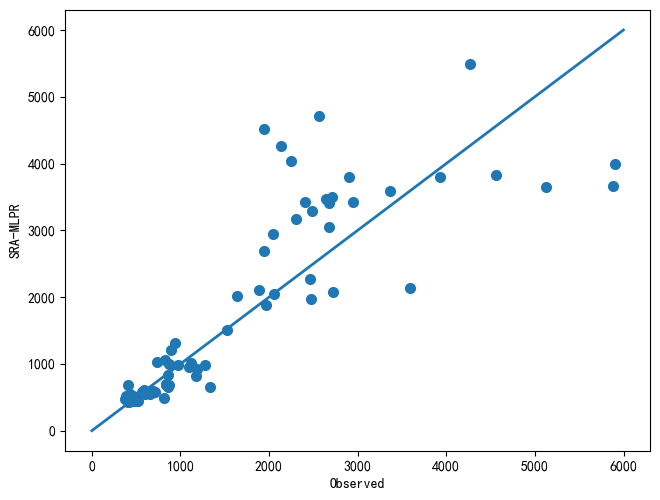

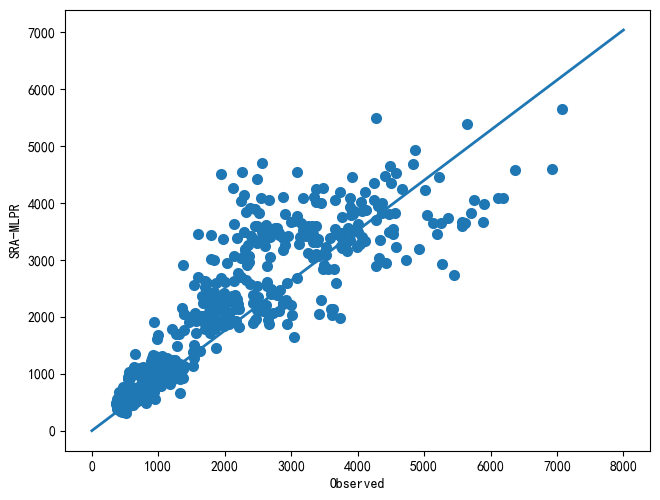

In [21]:
## MLP8预测
# 上一代码块已经划分好了训练集和测试集，此处就不重复划分了
'''模型构建'''
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

MLP8=MLPRegressor()#early_stopping=True

# MLP8param_grid=[
#     {'hidden_layer_sizes': [(64,128,64,32,8,1),(128,64,32,16,8,1),(128,64,32,16,1),(64,128,256,128,64,32,8,1)], 
#      'activation': ['logistic', 'tanh', 'relu'], 'solver': ['adam','lbfgs','sgd'], "alpha": [0.0001,0.0005]}
# ]

# MLP8param_grid=[
#     {'hidden_layer_sizes': [(64,128,64,32,16,8,1),(128,64,32,16,8,1),(128,64,32,8,1),(256,128,32,16,1)], 'activation': ['logistic', 'tanh', 'relu'],
#      'solver': ['sgd','adam','lbfgs'], "alpha": [0.0001,0.0005,0.001]}
# ]

MLP8param_grid=[
    {'hidden_layer_sizes': [(64,128,64,32,16,8,1),(128,64,32,16,8,1),(32,64,32,16,8,1)], 'activation': ['tanh', 'relu'],
     'solver': ['sgd','adam','lbfgs'], "alpha": [0.0001,0.00025,0.0003]}
]#(256,128,32,16,1),(256,128,64,32,16,8,1),0.0007,0.001

# MLP8 = MLP8Regressor(
#     hidden_layer_sizes=(100,50), activation='relu',solver='adam',#第一个隐藏层有100个节点，第二层有50个，激活函数用relu，梯度下降方法用adam
#     alpha=0.01,max_iter=200) # '''惩罚系数为0.01，最大迭代次数为200'''

X8_train,X8_test,y8_train,y8_test=train_test_split(MMsrX4,df_y4,test_size=0.1,random_state=34,shuffle=True)

# kfold=KFold(n_splits=10,shuffle=False,random_state=34)#定义10折随机分组
kfold=KFold(n_splits=12,random_state=34,shuffle=True)#定义10折随机分组

# crv_MLP8=cross_validate(estimator=MLP8, X1_train,y8_train,scoring=('r2', 'neg_mean_squared_error'), cv=kfold, n_jobs=-1,
#                        return_train_score=True)

# scoring = {'abs_error': 'neg_mean_absolute_error','squared_error': 'neg_mean_squared_error','r2':'r2'}
# scores = cross_validate(best_mlp, X, Y, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)

grid_MLP8=GridSearchCV(estimator=MLP8, param_grid=MLP8param_grid,cv=kfold,return_train_score=True,scoring = "r2",n_jobs=5)

print ("Training in progress:")
grid_MLP8.fit(X8_train,y8_train)
print(grid_MLP8.best_score_, grid_MLP8.best_params_)
# grid_MLP8.score(X8_train,y8_train),grid_MLP8.score(X8_test,y8_test)
mlp_pred8_train = grid_MLP8.predict(X8_train)
mlp_pred8_test = grid_MLP8.predict(X8_test)

print(f'训练集mse: {mean_squared_error(y8_train,mlp_pred8_train)},训练集r2_score: {r2_score(y8_train,mlp_pred8_train)}')
print(f'训练集mae: {mean_absolute_error(y8_train,mlp_pred8_train)},训练集mape: {mean_absolute_percentage_error(y8_train,mlp_pred8_train)}')
print(f'训练集msle: {msle(y8_train,mlp_pred8_train)}')
      
print(f'测试集mse: {mean_squared_error(y8_test,mlp_pred8_test)},测试集r2_score: {r2_score(y8_test,mlp_pred8_test)}')
print(f'测试集mae: {mean_absolute_error(y8_test,mlp_pred8_test)},测试集mape: {mean_absolute_percentage_error(y8_test,mlp_pred8_test)}')
print(f'测试集msle: {msle(y8_test,mlp_pred8_test)}')
#合并训练集和测试集的预测，方便后续和真实的所有数据画图。
# mlp_pred8=np.concatenate([mlp_pred8_train,mlp_pred8_test],axis=0)#注意，此处合并后和原数据的index并不对应，因为此处是shuffle打乱后的。

#正确的不应该是上面一句，而应该是用训练后的模型对所有的数据重新预测一次
mlp_pred8=grid_MLP8.predict(MMsrX4)

# print(mlp_pred8.shape,mlp_pred8)
# print(type(mlp_pred8))#<class 'numpy.ndarray'>
# print(mlp_pred8)
np.savetxt('sra_mlp_pred8_y4.csv', mlp_pred8, delimiter=',', fmt='%f')#默认输出的格式是使用科学计数法；加上fmt='%f'则不使用，而是保留4位小数点。
np.savetxt('sra_mlp_pred8_y41.csv', mlp_pred8, delimiter=',')#默认使用科学计数法。

'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx80=range(0,len(y8_test))
plt.figure(figsize=(8,6))
# plt.scatter(xx80,y8_test,color="red",label="Observed",linewidth=3) 
# plt.plot(xx80,mlp_pred8_test,color="orange",label="SRA-MLPR",linewidth=2)
plt.plot(xx80,y8_test,label="Observed",linewidth=2) 
plt.plot(xx80,mlp_pred8_test,label="SRA-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y42test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx81=range(0,len(df_y4))
plt.figure(figsize=(12,6))
# plt.scatter(xx81,df_y4,color="red",label="Observed",linewidth=3) 
# plt.plot(xx81,mlp_pred8,color="orange",label="SRA-MLPR",linewidth=2)
plt.plot(xx81,df_y4,label="Observed",linewidth=3) 
plt.plot(xx81,mlp_pred8,label="SRA-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y42full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a80=np.arange(8000)
a81=a80
# plt.scatter(y4_test,mlp_pred8_test,label="Observed",linewidth=2) 
plt.scatter(y8_test,mlp_pred8_test,linewidth=2) 
plt.plot(a80,a81,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y42_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a82=np.arange(8000)
# a83=[(n *1.6) for n in np.arange(4000)]
a83=a82*0.88
# plt.scatter(y8_test,mlp_pred8,label="Observed",linewidth=2) 
plt.scatter(df_y4,mlp_pred8,linewidth=2)
plt.plot(a82,a83,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y42_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

638
训练集mse: 391930.5920152315,训练集r2_score: 0.8067875731096215
训练集mae: 376.2688139629468,训练集mape: 0.22585435266776058
训练集msle: 0.0665350641339516
测试集mse: 353371.7742825401,测试集r2_score: 0.7146046855583219
测试集mae: 407.82144346237885,测试集mape: 0.3051196809435992
测试集msle: 0.09392987245395777


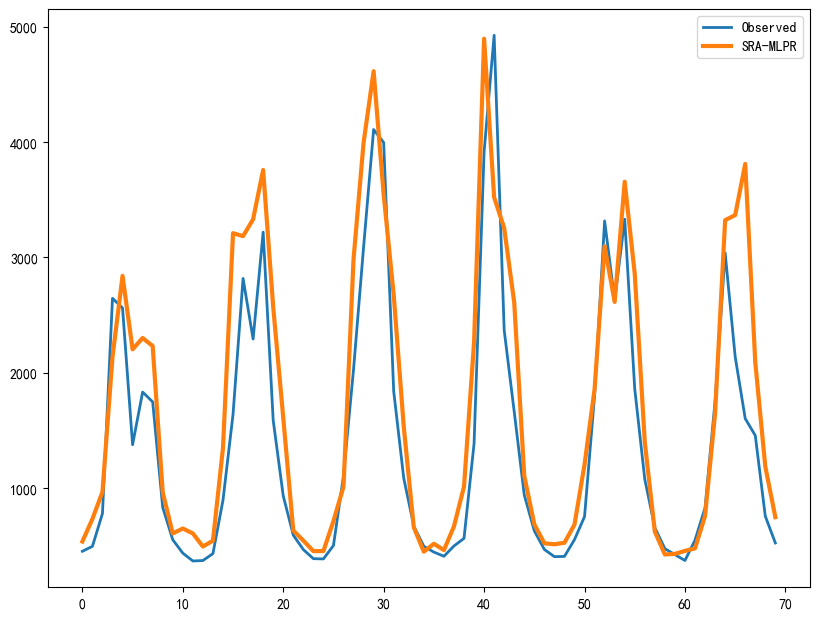

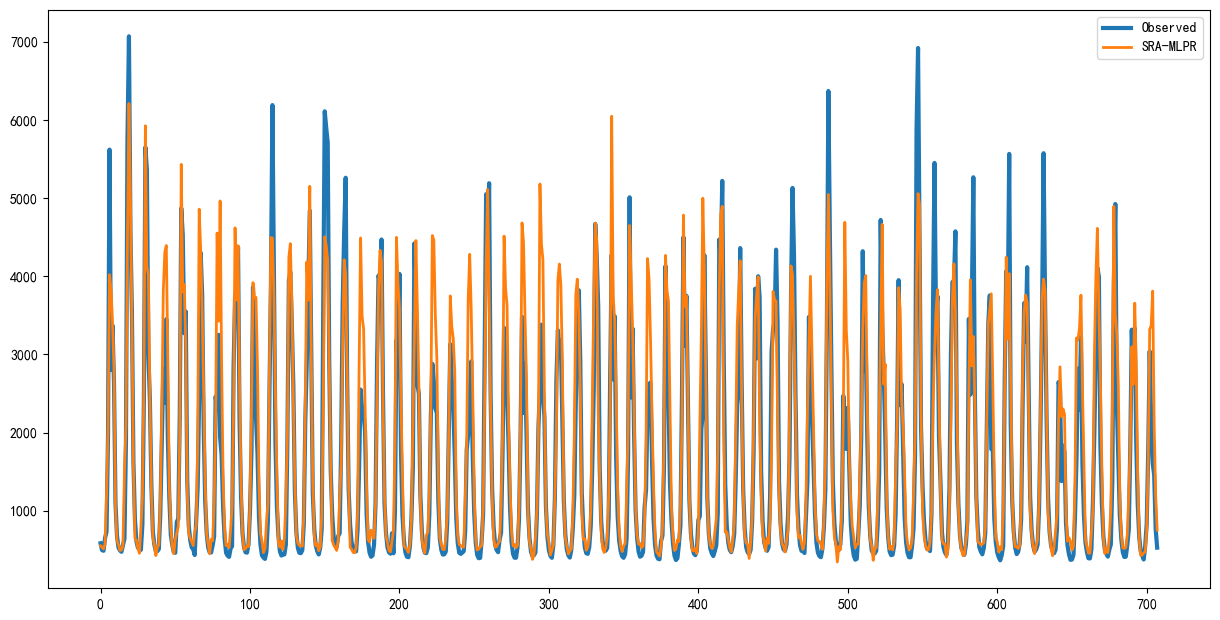

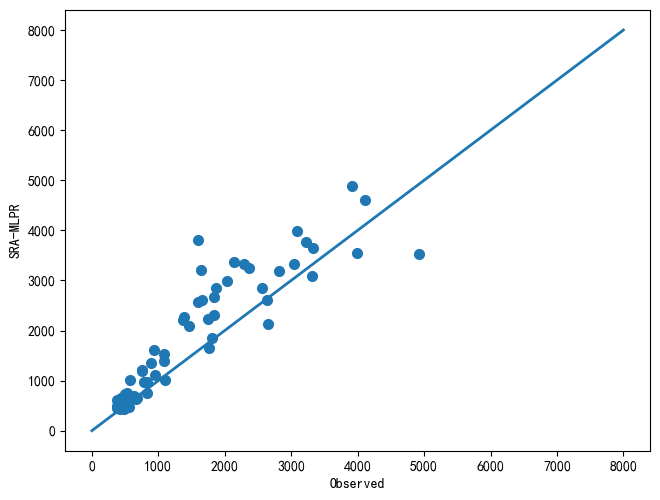

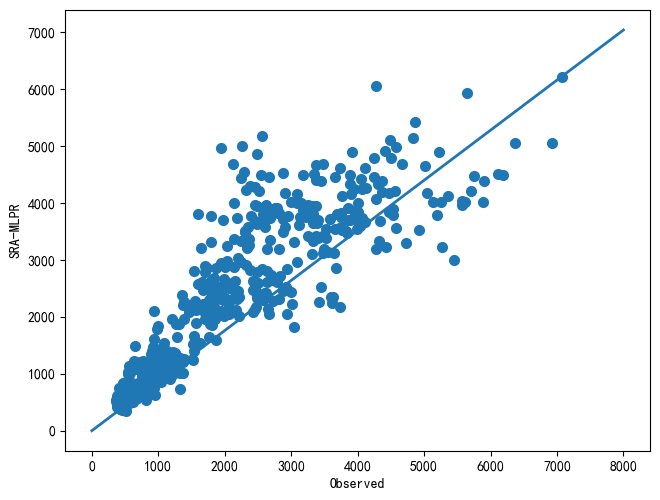

In [40]:
import pandas as pd

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

df_y401=pd.read_excel(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR和MLP预测数据\SRA_MLP_Y4.xlsx',header=None)
# df_y401.head()
df_t=df_y401.iloc[:,0]
df_p=df_y401.iloc[:,2]

# df_t.head()
# df_p.head()

df_tx=df_t.iloc[:638]
df_tc=df_t.iloc[638:]

df_px=df_p.iloc[:638]
df_pc=df_p.iloc[638:]

print(len(df_tx))

print(f'训练集mse: {mean_squared_error(df_tx,df_px)},训练集r2_score: {r2_score(df_tx,df_px)}')
print(f'训练集mae: {mean_absolute_error(df_tx,df_px)},训练集mape: {mean_absolute_percentage_error(df_tx,df_px)}')
print(f'训练集msle: {msle(df_tx,df_px)}')

print(f'测试集mse: {mean_squared_error(df_tc,df_pc)},测试集r2_score: {r2_score(df_tc,df_pc)}')
print(f'测试集mae: {mean_absolute_error(df_tc,df_pc)},测试集mape: {mean_absolute_percentage_error(df_tc,df_pc)}')
print(f'测试集msle: {msle(df_tc,df_pc)}')

# print(f'测试集mse: {mean_squared_error(df_t,df_p)},测试集r2_score: {r2_score(df_t,df_p)}')
# print(f'测试集mae: {mean_absolute_error(df_t,df_p)},测试集mape: {mean_absolute_percentage_error(df_t,df_p)}')
# print(f'测试集msle: {msle(df_t,df_p)}')

'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx80=range(0,len(df_tc))
plt.figure(figsize=(8,6))
# plt.scatter(xx80,df_tc,color="red",label="Observed",linewidth=3) 
# plt.plot(xx80,df_pc,color="orange",label="SRA-MLPR",linewidth=2)
plt.plot(xx80,df_tc,label="Observed",linewidth=2) 
plt.plot(xx80,df_pc,label="SRA-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y43test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx81=range(0,len(df_t))
plt.figure(figsize=(12,6))
# plt.scatter(xx81,df_t,color="red",label="Observed",linewidth=3) 
# plt.plot(xx81,df_p,color="orange",label="SRA-MLPR",linewidth=2)
plt.plot(xx81,df_t,label="Observed",linewidth=3) 
plt.plot(xx81,df_p,label="SRA-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y43full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a80=np.arange(8000)
a81=a80
# plt.scatter(y4_test,df_pc,label="Observed",linewidth=2) 
plt.scatter(df_tc,df_pc,linewidth=2) 
plt.plot(a80,a81,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y43_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a82=np.arange(8000)
# a83=[(n *1.6) for n in np.arange(4000)]
a83=a82*0.88
# plt.scatter(df_tc,df_p,label="Observed",linewidth=2) 
plt.scatter(df_t,df_p,linewidth=2)
plt.plot(a82,a83,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y43_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

638
训练集mse: 391930.5920152315,训练集r2_score: 0.8067875731096215
训练集mae: 376.2688139629468,训练集mape: 0.22585435266776058
训练集msle: 0.0665350641339516
测试集mse: 353371.7742825401,测试集r2_score: 0.7146046855583219
测试集mae: 407.82144346237885,测试集mape: 0.3051196809435992
测试集msle: 0.09392987245395777


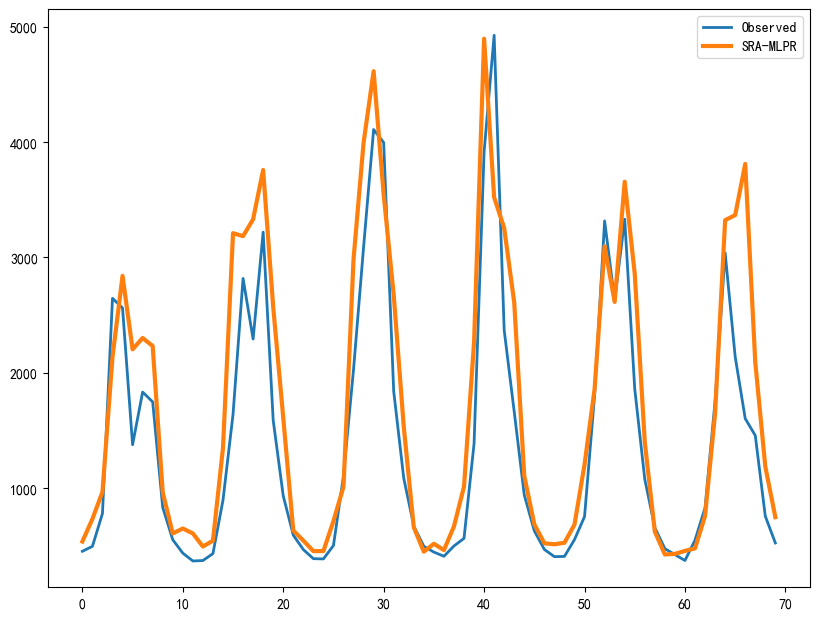

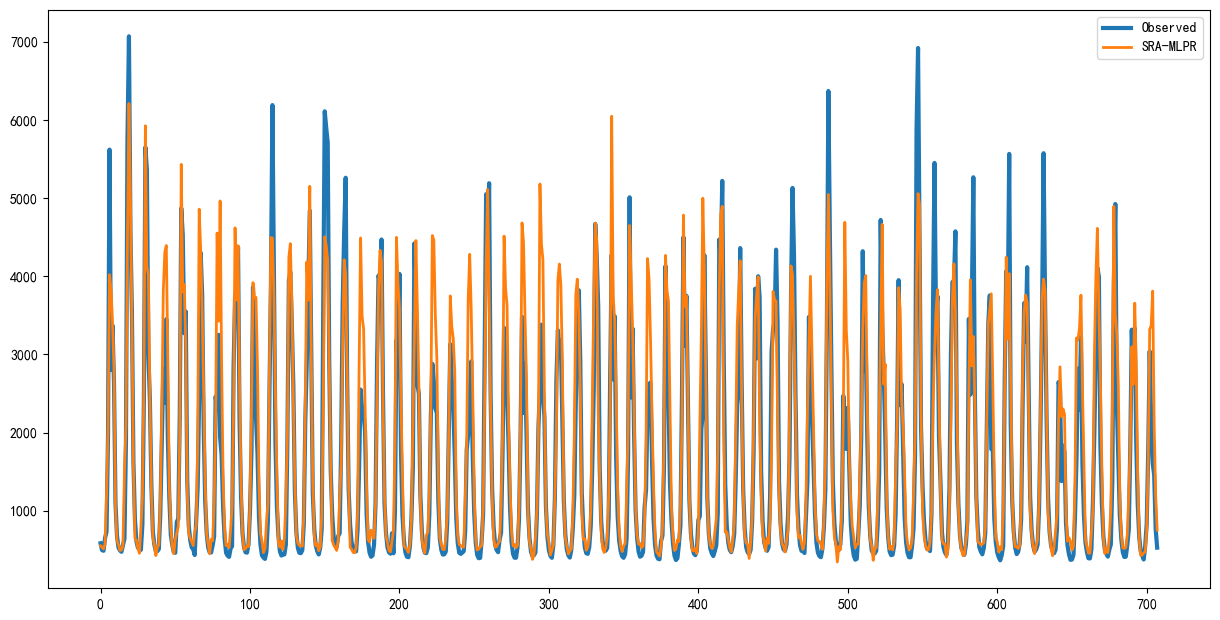

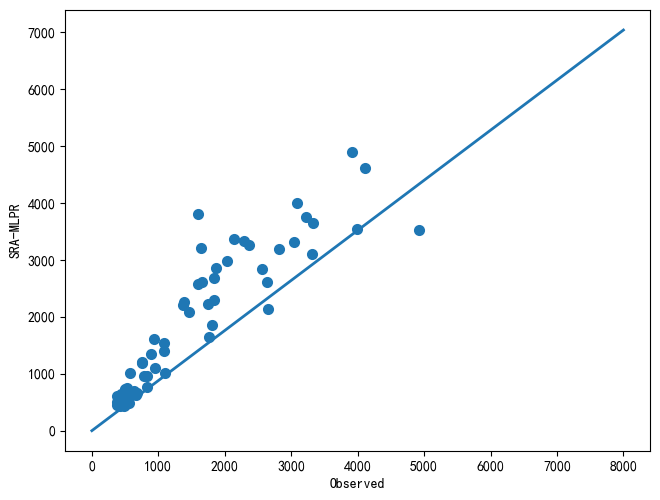

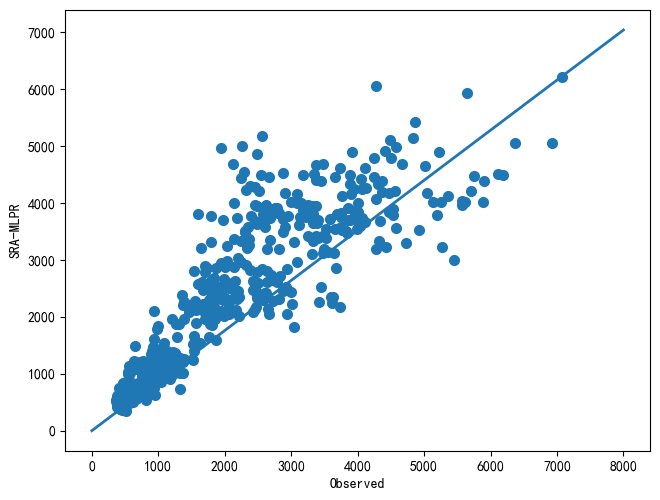

In [41]:
import pandas as pd

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import make_scorer,mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

df_y401=pd.read_excel(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR和MLP预测数据\SRA_MLP_Y4.xlsx',header=None)
# df_y401.head()
df_t=df_y401.iloc[:,0]
df_p=df_y401.iloc[:,2]

# df_t.head()
# df_p.head()

df_tx=df_t.iloc[:638]
df_tc=df_t.iloc[638:]

df_px=df_p.iloc[:638]
df_pc=df_p.iloc[638:]

print(len(df_tx))

print(f'训练集mse: {mean_squared_error(df_tx,df_px)},训练集r2_score: {r2_score(df_tx,df_px)}')
print(f'训练集mae: {mean_absolute_error(df_tx,df_px)},训练集mape: {mean_absolute_percentage_error(df_tx,df_px)}')
print(f'训练集msle: {msle(df_tx,df_px)}')

print(f'测试集mse: {mean_squared_error(df_tc,df_pc)},测试集r2_score: {r2_score(df_tc,df_pc)}')
print(f'测试集mae: {mean_absolute_error(df_tc,df_pc)},测试集mape: {mean_absolute_percentage_error(df_tc,df_pc)}')
print(f'测试集msle: {msle(df_tc,df_pc)}')

# print(f'测试集mse: {mean_squared_error(df_t,df_p)},测试集r2_score: {r2_score(df_t,df_p)}')
# print(f'测试集mae: {mean_absolute_error(df_t,df_p)},测试集mape: {mean_absolute_percentage_error(df_t,df_p)}')
# print(f'测试集msle: {msle(df_t,df_p)}')

'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx80=range(0,len(df_tc))
plt.figure(figsize=(8,6))
# plt.scatter(xx80,df_tc,color="red",label="Observed",linewidth=3) 
# plt.plot(xx80,df_pc,color="orange",label="SRA-MLPR",linewidth=2)
plt.plot(xx80,df_tc,label="Observed",linewidth=2) 
plt.plot(xx80,df_pc,label="SRA-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y43test.tif', dpi=300,transparent=True)#transparent=True来指定透明度。

#全部数据画图
xx81=range(0,len(df_t))
plt.figure(figsize=(12,6))
# plt.scatter(xx81,df_t,color="red",label="Observed",linewidth=3) 
# plt.plot(xx81,df_p,color="orange",label="SRA-MLPR",linewidth=2)
plt.plot(xx81,df_t,label="Observed",linewidth=3) 
plt.plot(xx81,df_p,label="SRA-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y43full.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#测试集数据画回归图
a80=np.arange(8000)
a81=a80*0.88
# plt.scatter(y4_test,df_pc,label="Observed",linewidth=2) 
plt.scatter(df_tc,df_pc,linewidth=2) 
plt.plot(a80,a81,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y43_test_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

#所有数据画回归图
a82=np.arange(8000)
# a83=[(n *1.6) for n in np.arange(4000)]
a83=a82*0.88
# plt.scatter(df_tc,df_p,label="Observed",linewidth=2) 
plt.scatter(df_t,df_p,linewidth=2)
plt.plot(a82,a83,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('SRA-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SRA_MLP_y43_full_Regre.tif', dpi=300,transparent=True)#transparent=True来指定透明度。
plt.show()

## MLPRegressor

In [182]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.metrics import make_scorer

from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize']=(15.0,8.0)
plt.rcParams['font.sans-serif'] = ['SimHei'] #解决中文显示
# plt.rcParams['font.family']='simhei'
# plt.rcParams['font.family']=['sans-serif']
plt.rcParams['axes.unicode_minus'] = False   #解决符号无法显示

# from matplotlib.font_manager import FontProperties
# fonts = FontProperties(fname = "/Library/Fonts/华文细黑.ttf",size=14)

# get_ipython().run_line_magic('matplotlib', 'inline')
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'
# import warnings

# df=pd.read_excel(r'..\data\雅砻江MinMax归一化后.xlsx')
# df1=pd.read_excel(r'..\data\雅砻江原始值.xlsx')
# df1=pd.read_excel(r'..\data\雅砻江数据去除缺失值.xlsx')
# df1=pd.read_excel(r'..\data\88项环流指数.xlsx')


df_y10=pd.read_csv(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR和MLP预测数据\mlp_pred1_y10.csv',header=None)
df_y20=pd.read_csv(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR和MLP预测数据\mlp_pred2_y20.csv',header=None)
df_y30=pd.read_csv(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR和MLP预测数据\mlp_pred3_y30.csv',header=None)
df_y40=pd.read_csv(r'E:\BaiduSyncdisk\投稿计科-水文\论文试验记录及用图\第一图\SVR和MLP预测数据\mlp_pred4_y40.csv',header=None)

In [172]:
df_y40.head()

0           1
0  583.0  593.030014
1  495.0  483.588097
2  487.0  445.318270
3  650.0  633.275322
4  730.0  822.195064

In [174]:
df_y40.iloc[:,1]

0       593.030014
1       483.588097
2       445.318270
3       633.275322
4       822.195064
          ...     
703    2942.626544
704    2813.075367
705    1755.683190
706     928.843341
707     621.161132
Name: 1, Length: 708, dtype: float64

In [183]:
print(f'测试集mse: {mean_squared_error(df_y10.iloc[:,0],df_y10.iloc[:,1])},测试集r2_score: {r2_score(df_y10.iloc[:,0],df_y10.iloc[:,1])}')
print(f'测试集mae: {mean_absolute_error(df_y10.iloc[:,0],df_y10.iloc[:,1])},测试集mape: {mean_absolute_percentage_error(df_y10.iloc[:,0],df_y10.iloc[:,1])}')
print(f'测试集msle: {msle(df_y10.iloc[:,0],df_y10.iloc[:,1])}')

测试集mse: 14051.908932703876,测试集r2_score: 0.954281539938775
测试集mae: 72.60255503474576,测试集mape: 0.12541096707278465
测试集msle: 0.02214212234333777


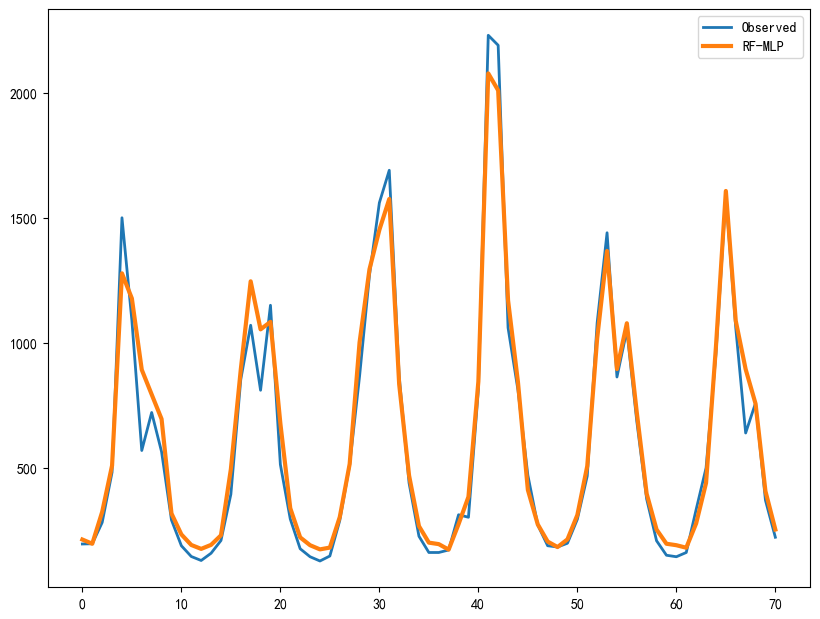

In [192]:
'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx90=range(0,71)
plt.figure(figsize=(8,6))
# plt.scatter(xx90,df_y10.iloc[-71:,0],color="red",label="Observed",linewidth=3) 
# plt.plot(xx90,df_y10.iloc[-71:,1],color="orange",label="RF-MLP",linewidth=2)
plt.plot(xx90,df_y10.iloc[-71:,0],label="Observed",linewidth=2) 
plt.plot(xx90,df_y10.iloc[-71:,1],label="RF-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y91test.tif', dpi=200,transparent=True)#transparent=True来指定透明度。

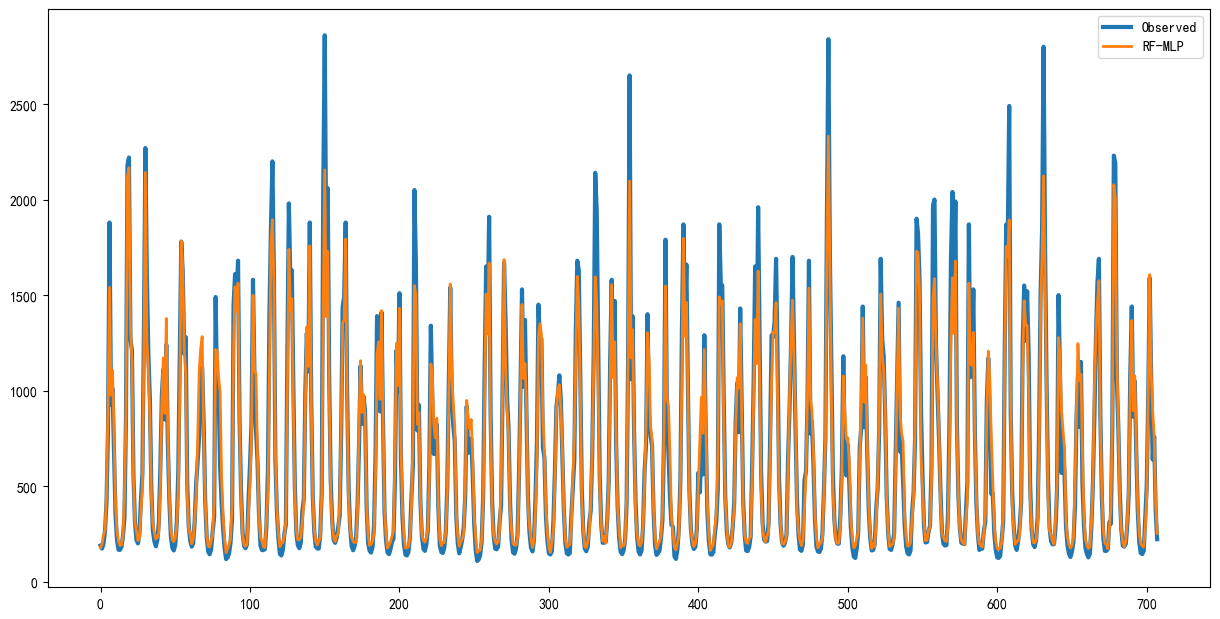

In [193]:
#全部数据画图
xx91=range(0,len(df_y10.iloc[:,0]))
plt.figure(figsize=(12,6))
# plt.scatter(xx91,df_y10.iloc[:,0],color="red",label="Observed",linewidth=3) 
# plt.plot(xx91,df_y10.iloc[:,1],color="orange",label="RF-MLP",linewidth=2)
plt.plot(xx91,df_y10.iloc[:,0],label="Observed",linewidth=3) 
plt.plot(xx91,df_y10.iloc[:,1],label="RF-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y91full.tif', dpi=200,transparent=True)#transparent=True来指定透明度。
plt.show()

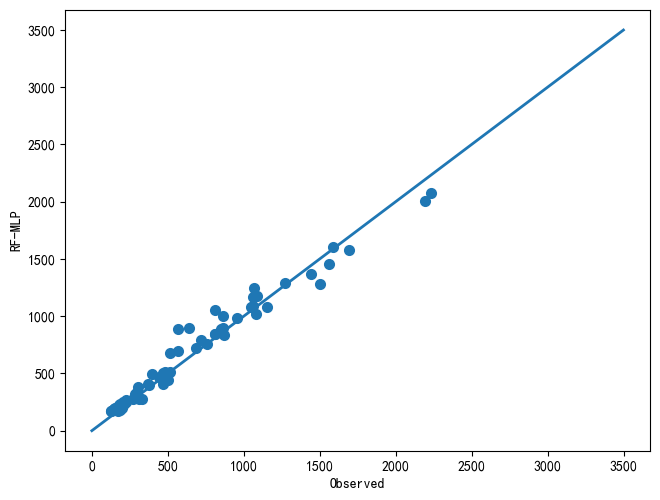

In [204]:
#测试集数据画回归图
a90=np.arange(3500)
a91=a90
# plt.scatter(df_y10.iloc[-71:,0],df_y10.iloc[-71:,1],label="Observed",linewidth=2) 
plt.scatter(df_y10.iloc[-71:,0],df_y10.iloc[-71:,1],linewidth=2) 
plt.plot(a90,a91,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y9_test_Regre.tif', dpi=200,transparent=True)#transparent=True来指定透明度。
plt.show()

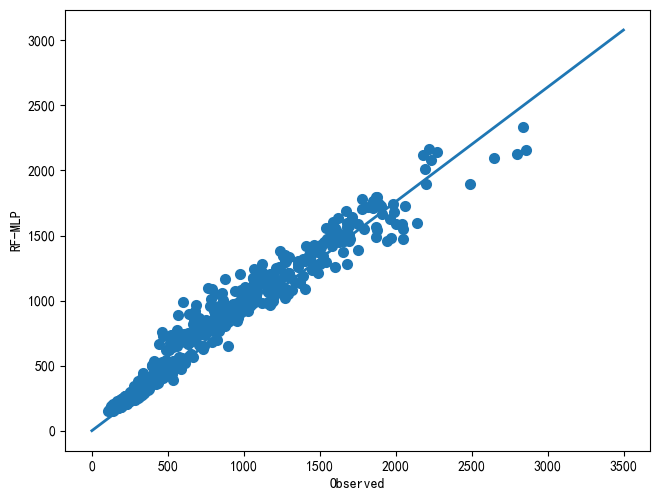

In [210]:
#所有数据画回归图
a92=np.arange(3500)
a93=a92*0.88
# plt.scatter(df_y10.iloc[:,0],df_y10.iloc[:,1],label="Observed",linewidth=2) 
plt.scatter(df_y10.iloc[:,0],df_y10.iloc[:,1],linewidth=2) 
plt.plot(a92,a93,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y9_full_Regre.tif', dpi=200,transparent=True)#transparent=True来指定透明度。
plt.show()

In [184]:
print(f'测试集mse: {mean_squared_error(df_y20.iloc[:,0],df_y20.iloc[:,1])},测试集r2_score: {r2_score(df_y20.iloc[:,0],df_y20.iloc[:,1])}')
print(f'测试集mae: {mean_absolute_error(df_y20.iloc[:,0],df_y20.iloc[:,1])},测试集mape: {mean_absolute_percentage_error(df_y20.iloc[:,0],df_y20.iloc[:,1])}')
print(f'测试集msle: {msle(df_y20.iloc[:,0],df_y20.iloc[:,1])}')

测试集mse: 45089.9068241539,测试集r2_score: 0.958433166418312
测试集mae: 129.9934928918079,测试集mape: 0.11589618929642834
测试集msle: 0.01914558147151406


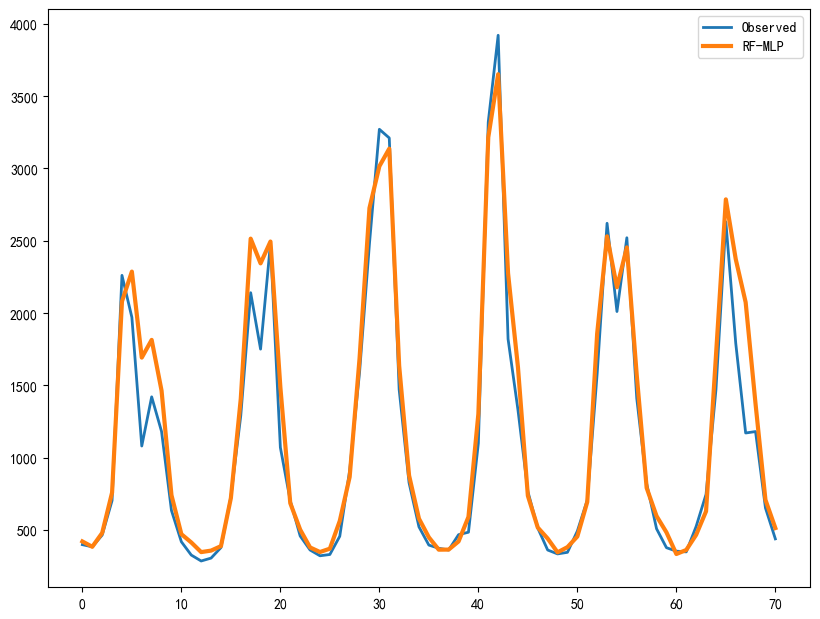

In [194]:
'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx100=range(0,71)
plt.figure(figsize=(8,6))
# plt.scatter(xx100,df_y20.iloc[-71:,0],color="red",label="Observed",linewidth=3) 
# plt.plot(xx100,df_y20.iloc[-71:,1],color="orange",label="RF-MLP",linewidth=2)
plt.plot(xx100,df_y20.iloc[-71:,0],label="Observed",linewidth=2) 
plt.plot(xx100,df_y20.iloc[-71:,1],label="RF-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y101test.tif', dpi=200,transparent=True)#transparent=True来指定透明度。

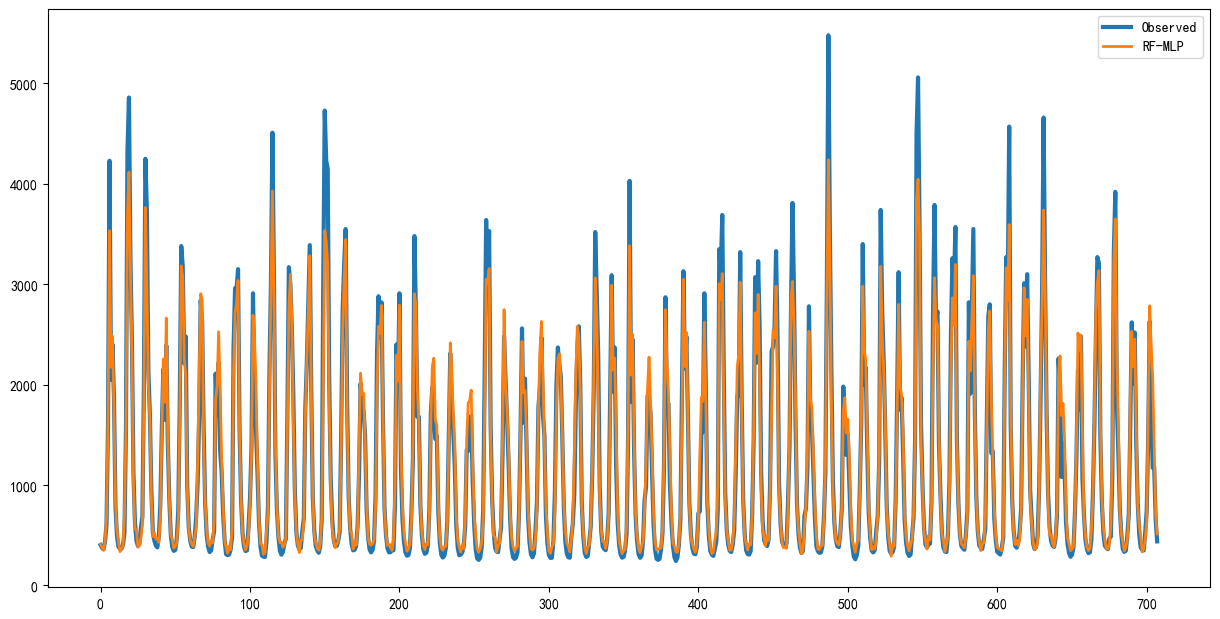

In [195]:
#全部数据画图
xx101=range(0,len(df_y20.iloc[:,0]))
plt.figure(figsize=(12,6))
# plt.scatter(xx101,df_y20.iloc[:,0],color="red",label="Observed",linewidth=3) 
# plt.plot(xx101,df_y20.iloc[:,1],color="orange",label="RF-MLP",linewidth=2)
plt.plot(xx101,df_y20.iloc[:,0],label="Observed",linewidth=3) 
plt.plot(xx101,df_y20.iloc[:,1],label="RF-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y101full.tif', dpi=200,transparent=True)#transparent=True来指定透明度。
plt.show()

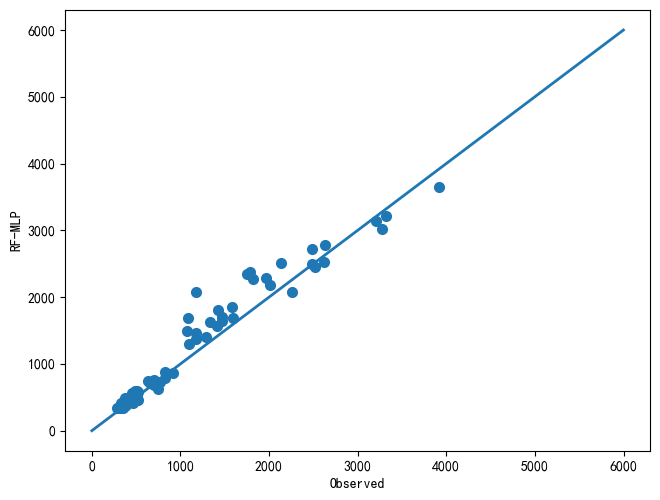

In [253]:
#测试集数据画回归图
a100=np.arange(6000)
a101=a100
# plt.scatter(df_y20.iloc[-71:,0],df_y20.iloc[-71:,1],label="Observed",linewidth=2) 
plt.scatter(df_y20.iloc[-71:,0],df_y20.iloc[-71:,1],linewidth=2) 
plt.plot(a100,a101,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y10_test_Regre.tif', dpi=200,transparent=True)#transparent=True来指定透明度。
plt.show()

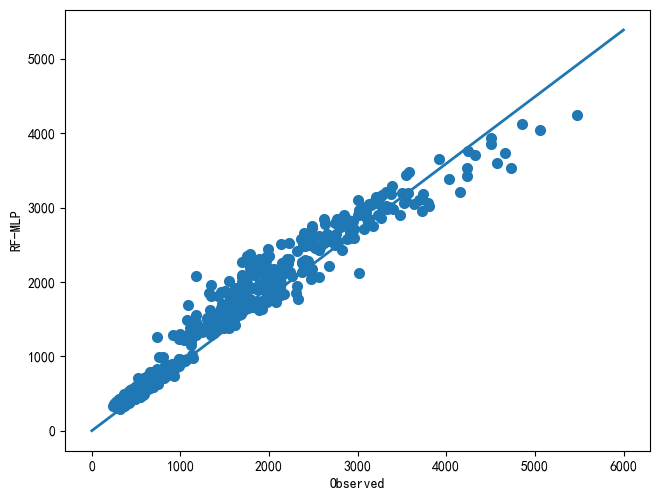

In [255]:
#所有数据画回归图
a102=np.arange(6000)
a103=a102*0.898
# plt.scatter(df_y20.iloc[:,0],df_y20.iloc[:,1],label="Observed",linewidth=2) 
plt.scatter(df_y20.iloc[:,0],df_y20.iloc[:,1],linewidth=2) 
plt.plot(a102,a103,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y10_full_Regre.tif', dpi=200,transparent=True)#transparent=True来指定透明度。
plt.show()

In [179]:
print(f'测试集mse: {mean_squared_error(df_y30.iloc[:,0],df_y30.iloc[:,1])},测试集r2_score: {r2_score(df_y30.iloc[:,0],df_y30.iloc[:,1])}')
print(f'测试集mae: {mean_absolute_error(df_y30.iloc[:,0],df_y30.iloc[:,1])},测试集mape: {mean_absolute_percentage_error(df_y30.iloc[:,0],df_y30.iloc[:,1])}')
print(f'测试集msle: {msle(df_y30.iloc[:,0],df_y30.iloc[:,1])}')

测试集mse: 63879.57601499165,测试集r2_score: 0.9553754267422426
测试集mae: 154.2457219838983,测试集mape: 0.11450634430373233
测试集msle: 0.018858677883482534


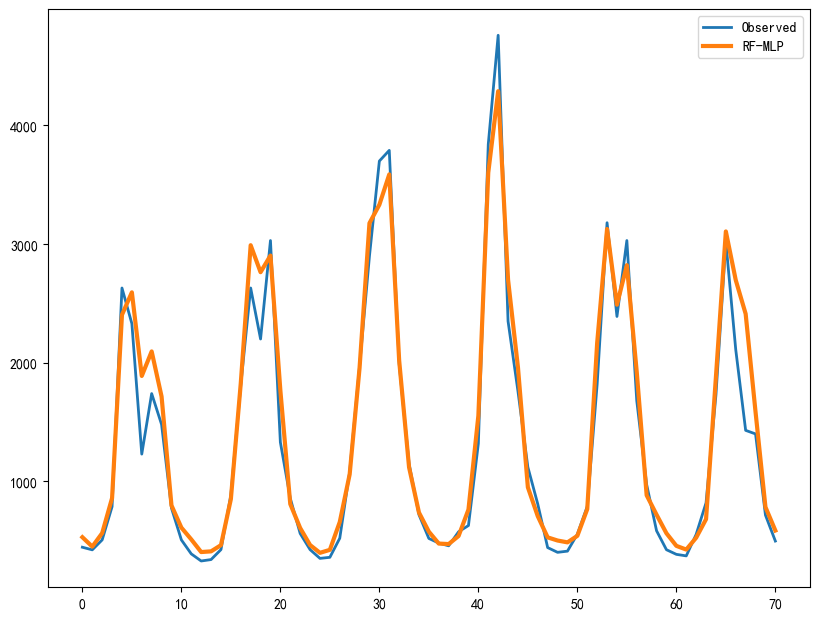

In [196]:
'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx110=range(0,71)
plt.figure(figsize=(8,6))
# plt.scatter(xx110,df_y30.iloc[-71:,0],color="red",label="Observed",linewidth=3) 
# plt.plot(xx110,df_y30.iloc[-71:,1],color="orange",label="RF-MLP",linewidth=2)
plt.plot(xx110,df_y30.iloc[-71:,0],label="Observed",linewidth=2) 
plt.plot(xx110,df_y30.iloc[-71:,1],label="RF-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y111test.tif', dpi=200,transparent=True)#transparent=True来指定透明度。

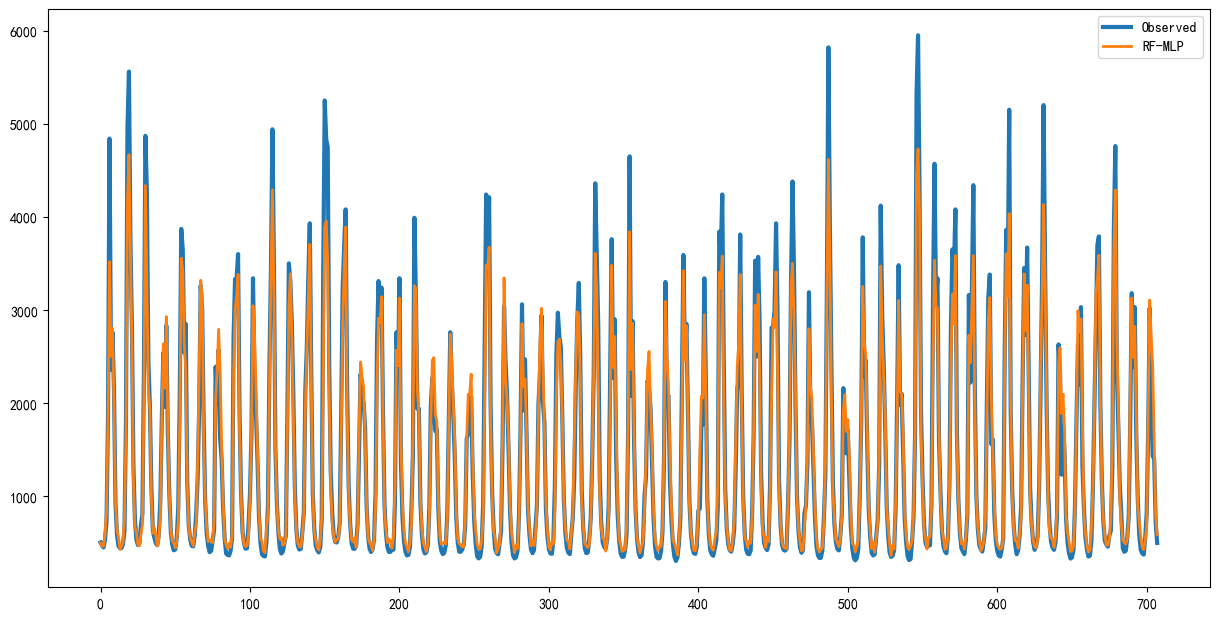

In [197]:
#全部数据画图
xx111=range(0,len(df_y30.iloc[:,0]))
plt.figure(figsize=(12,6))
# plt.scatter(xx111,df_y30.iloc[:,0],color="red",label="Observed",linewidth=3) 
# plt.plot(xx111,df_y30.iloc[:,1],color="orange",label="RF-MLP",linewidth=2)
plt.plot(xx111,df_y30.iloc[:,0],label="Observed",linewidth=3) 
plt.plot(xx111,df_y30.iloc[:,1],label="RF-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y111full.tif', dpi=200,transparent=True)#transparent=True来指定透明度。
plt.show()

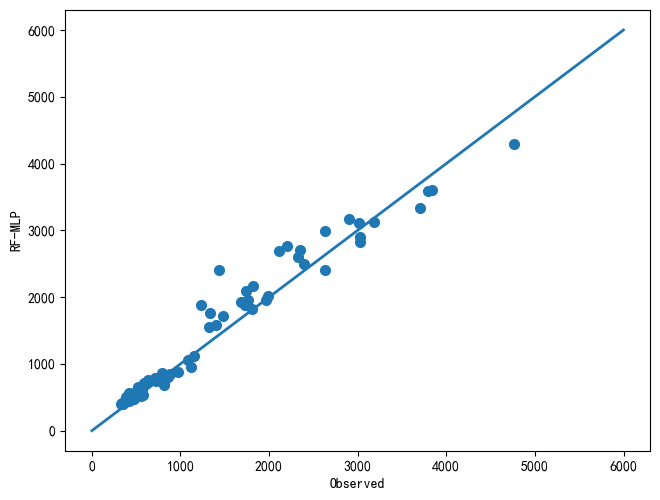

In [256]:
#测试集数据画回归图
a110=np.arange(6000)
a111=a110
# plt.scatter(df_y30.iloc[-71:,0],df_y30.iloc[-71:,1],label="Observed",linewidth=2) 
plt.scatter(df_y30.iloc[-71:,0],df_y30.iloc[-71:,1],linewidth=2) 
plt.plot(a110,a111,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y30_test_Regre.tif', dpi=200,transparent=True)#transparent=True来指定透明度。
plt.show()

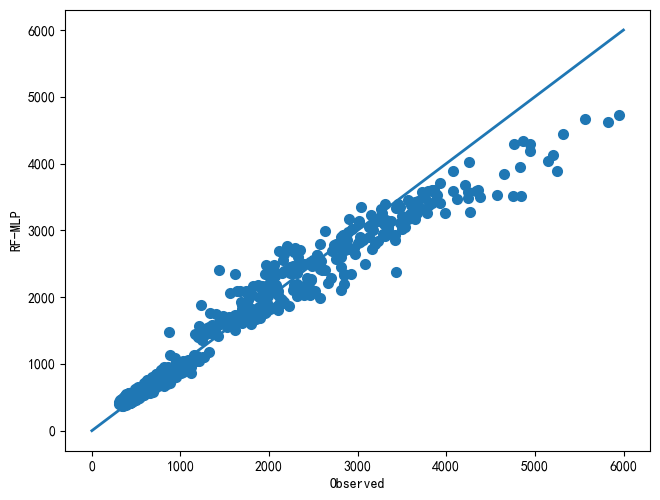

In [257]:
#所有数据画回归图
a112=np.arange(6000)
a113=a112
# plt.scatter(df_y30.iloc[:,0],df_y30.iloc[:,1],label="Observed",linewidth=2) 
plt.scatter(df_y30.iloc[:,0],df_y30.iloc[:,1],linewidth=2) 
plt.plot(a112,a113,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y30_full_Regre.tif', dpi=200,transparent=True)#transparent=True来指定透明度。
plt.show()

In [180]:
print(f'测试集mse: {mean_squared_error(df_y40.iloc[:,0],df_y40.iloc[:,1])},测试集r2_score: {r2_score(df_y40.iloc[:,0],df_y40.iloc[:,1])}')
print(f'测试集mae: {mean_absolute_error(df_y40.iloc[:,0],df_y40.iloc[:,1])},测试集mape: {mean_absolute_percentage_error(df_y40.iloc[:,0],df_y40.iloc[:,1])}')
print(f'测试集msle: {msle(df_y40.iloc[:,0],df_y40.iloc[:,1])}')

测试集mse: 78313.2752555238,测试集r2_score: 0.9599708108148574
测试集mae: 160.86584336129943,测试集mape: 0.09525463685047814
测试集msle: 0.013960185490737981


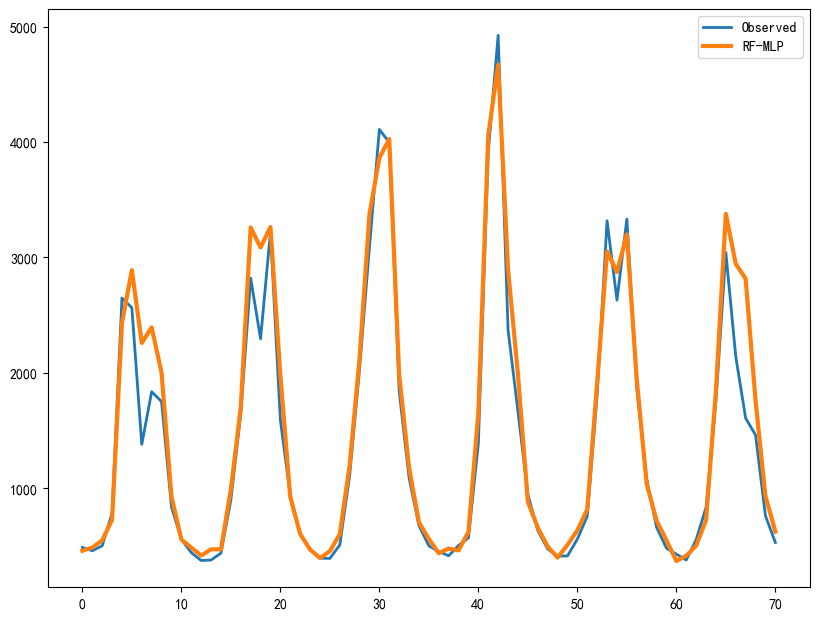

In [198]:
'''结果可视化'''
#测试集画图
import matplotlib.pyplot as plt
xx120=range(0,71)
plt.figure(figsize=(8,6))
# plt.scatter(xx120,df_y40.iloc[-71:,0],color="red",label="Observed",linewidth=3) 
# plt.plot(xx120,df_y40.iloc[-71:,1],color="orange",label="RF-MLP",linewidth=2)
plt.plot(xx120,df_y40.iloc[-71:,0],label="Observed",linewidth=2) 
plt.plot(xx120,df_y40.iloc[-71:,1],label="RF-MLPR",linewidth=3)
plt.legend()
# plt.show()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y121test.tif', dpi=200,transparent=True)#transparent=True来指定透明度。

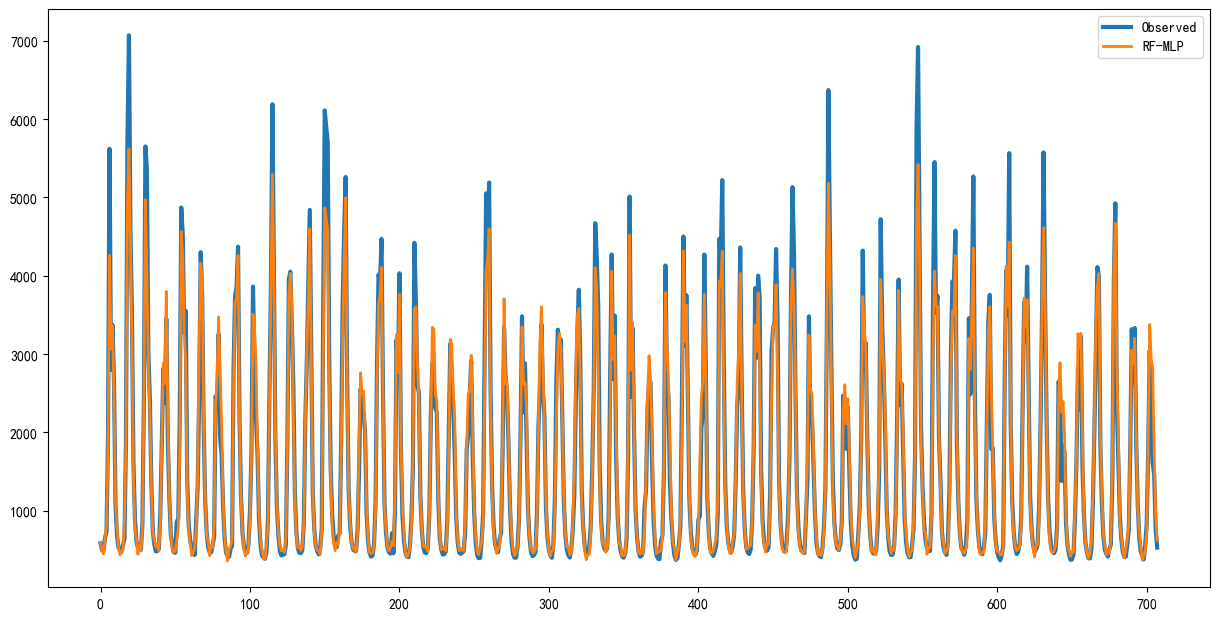

In [199]:
#全部数据画图
xx121=range(0,len(df_y40.iloc[:,0]))
plt.figure(figsize=(12,6))
# plt.scatter(xx121,df_y40.iloc[:,0],color="red",label="Observed",linewidth=3) 
# plt.plot(xx121,df_y40.iloc[:,1],color="orange",label="RF-MLP",linewidth=2)
plt.plot(xx121,df_y40.iloc[:,0],label="Observed",linewidth=3) 
plt.plot(xx121,df_y40.iloc[:,1],label="RF-MLPR",linewidth=2)
plt.legend()
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y121full.tif', dpi=200,transparent=True)#transparent=True来指定透明度。
plt.show()

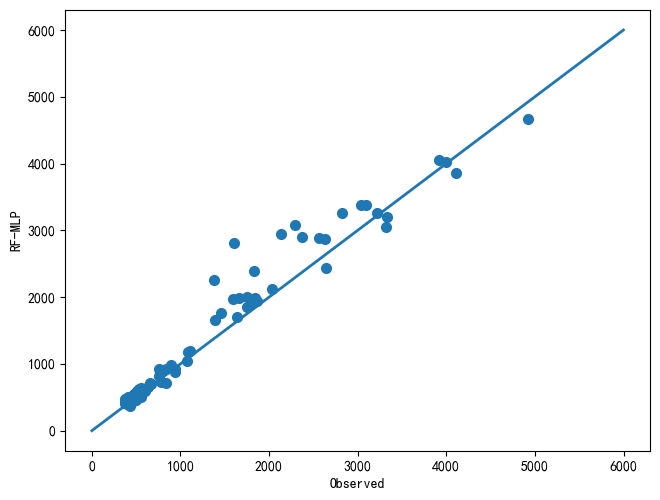

In [259]:
#测试集数据画回归图
a120=np.arange(6000)
a121=a120
# plt.scatter(df_y40.iloc[-71:,0],df_y40.iloc[-71:,1],label="Observed",linewidth=2) 
plt.scatter(df_y40.iloc[-71:,0],df_y40.iloc[-71:,1],linewidth=2) 
plt.plot(a120,a121,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y40_test_Regre.tif', dpi=200,transparent=True)#transparent=True来指定透明度。
plt.show()

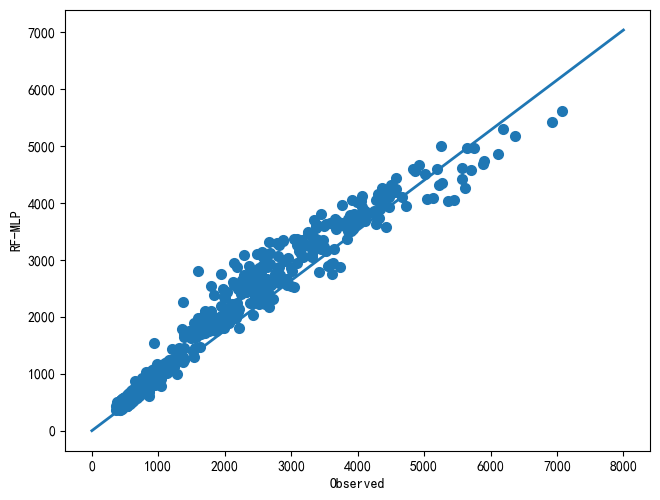

In [263]:
#所有数据画回归图
a122=np.arange(8000)
a123=a122*0.88
# plt.scatter(df_y40.iloc[:,0],df_y40.iloc[:,1],label="Observed",linewidth=2) 
plt.scatter(df_y40.iloc[:,0],df_y40.iloc[:,1],linewidth=2) 
plt.plot(a122,a123,linewidth=2)
plt.xlabel('Observed')
plt.ylabel('RF-MLPR')
plt.tight_layout(pad=0)#调整plt.tight_layout函数的参数来去除边缘空白。参考https://www.fke6.com/html/106130.html
plt.savefig(r'E:\BaiduSyncdisk\投稿计科-水文\论文用图\第一图\MLP_y40_full_Regre.tif', dpi=200,transparent=True)#transparent=True来指定透明度。
plt.show()